In [1]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ullv-rqbUH1YzCCGaIa4mT9Z30_dnweD' -O downloaded_file.csv


--2024-08-12 06:59:15--  https://docs.google.com/uc?export=download&id=1Ullv-rqbUH1YzCCGaIa4mT9Z30_dnweD
Resolving docs.google.com (docs.google.com)... 64.233.180.113, 64.233.180.139, 64.233.180.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.180.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ullv-rqbUH1YzCCGaIa4mT9Z30_dnweD&export=download [following]
--2024-08-12 06:59:16--  https://drive.usercontent.google.com/download?id=1Ullv-rqbUH1YzCCGaIa4mT9Z30_dnweD&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [application/octet-stream]
Saving to: ‘downloaded_file.csv’

downloaded_file.csv 100%[===================>]  53.04M  44.8MB/s

In [3]:
#reading the data
data_original = pd.read_csv('/content/downloaded_file.csv')

In [4]:
dd = data_original.copy()

In [5]:
# setting the option of displaying all the columns
pd.set_option('display.max_columns', 50)

**Exploring the Data**

In [6]:
dd.shape

(144867, 24)

In [7]:
dd.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
#Statistical summary
dd.describe().T

count        mean          std         min  \
start_scan_to_end_scan          144867.0  961.262986  1037.012769   20.000000   
cutoff_factor                   144867.0  232.926567   344.755577    9.000000   
actual_distance_to_destination  144867.0  234.073372   344.990009    9.000045   
actual_time                     144867.0  416.927527   598.103621    9.000000   
osrm_time                       144867.0  213.868272   308.011085    6.000000   
osrm_distance                   144867.0  284.771297   421.119294    9.008200   
factor                          144867.0    2.120107     1.715421    0.144000   
segment_actual_time             144867.0   36.196111    53.571158 -244.000000   
segment_osrm_time               144867.0   18.507548    14.775960    0.000000   
segment_osrm_distance           144867.0   22.829020    17.860660    0.000000   
segment_factor                  144867.0    2.218368     4.847530  -23.444444   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  449.000000  1634.000000   
cutoff_factor                    22.000000   66.000000   286.000000   
actual_distance_to_destination   23.355874   66.126571   286.708875   
actual_time                      51.000000  132.000000   513.000000   
osrm_time                        27.000000   64.000000   257.000000   
osrm_distance                    29.914700   78.525800   343.193250   
factor                            1.604264    1.857143     2.213483   
segment_actual_time              20.000000   29.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.070100   23.513000    27.813250   
segment_factor                    1.347826    1.684211     2.250000   

                                        max  
start_scan_to_end_scan          7898.000000  
cutoff_factor                   1927.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
factor                            77.387097  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700  
segment_factor                   574.250000

In [10]:
dd.describe(include=object).T

count unique  \
data                 144867      2   
trip_creation_time   144867  14817   
route_schedule_uuid  144867   1504   
route_type           144867      2   
trip_uuid            144867  14817   
source_center        144867   1508   
source_name          144574   1498   
destination_center   144867   1481   
destination_name     144606   1468   
od_start_time        144867  26369   
od_end_time          144867  26369   
cutoff_timestamp     144867  93180   

                                                                   top    freq  
data                                                          training  104858  
trip_creation_time                          2018-09-28 05:23:15.359220     101  
route_schedule_uuid  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...    1812  
route_type                                                         FTL   99660  
trip_uuid                                      trip-153811219535896559     101  
source_center                                             IND000000ACB   23347  
source_name                              Gurgaon_Bilaspur_HB (Haryana)   23347  
destination_center                                        IND000000ACB   15192  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)   15192  
od_start_time                               2018-09-21 18:37:09.322207      81  
od_end_time                                 2018-09-24 09:59:15.691618      81  
cutoff_timestamp                                   2018-09-24 05:19:20      40

In [11]:
#Checking for duplicates
dd[dd.duplicated()]

Empty DataFrame
Columns: [data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, is_cutoff, cutoff_factor, cutoff_timestamp, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor]
Index: []

The data doesnt contain any duplicates

**Null detection**

In [12]:
dd.isna().any()

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                        True
destination_center                False
destination_name                   True
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

In [13]:
dd.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [14]:
def missing_data(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False) # ----> /len(dd)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

missing_pct = missing_data(dd)
missing_pct[missing_pct['Total']>0]

Total   Percent
source_name         293  0.202254
destination_name    261  0.180165

In [15]:
# Dropping unknown fields

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
dd = dd.drop(columns = unknown_fields)

In [16]:
dd

data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
...                                                   ...        ...   
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
0       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
...                         ...           ...                         ...   
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
0            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
...                   ...                            ...   
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time                 od_end_time  \
0       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
...                            ...                         ...   
144862  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144863  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144864  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144865  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144866  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   

        start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                         86.0                      

In [17]:
#checking the unique values for columns
for _ in dd.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {dd[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {dd[_].unique()}')
    print()
    print('-'*120)


Total Unique Values in data column are :- 2
Unique Values in data column are :-
 ['training' 'test']

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in trip_creation_time column are :- 14817
Unique Values in trip_creation_time column are :-
 ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in route_schedule_uuid column are :- 1504
Unique Values in route_schedule_uuid column are :-
 ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e

**Changing Data type of columns**

In [18]:
dd.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
dtype: object

In [19]:
# Converting the datatypes to category for columns like data and route_type as they only have 2 values.
dd['data'] = dd['data'].astype('category')
dd['route_type'] = dd['route_type'].astype('category')

# Converting time columns to datetime format
datetime_cols = ['trip_creation_time', 'od_start_time', 'od_end_time']
for _ in datetime_cols:
    dd[_] = pd.to_datetime(dd[_])

In [20]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [21]:
float_cols = []
for _ in dd.columns:
    if dd[_].dtype=='float64':
        float_cols.append(_)
float_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [22]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [23]:
# Time period of data
dd['trip_creation_time'].max(), dd['trip_creation_time'].min() , dd['trip_creation_time'].max()-dd['trip_creation_time'].min()

(Timestamp('2018-10-03 23:59:42.701692'),
 Timestamp('2018-09-12 00:00:16.535741'),
 Timedelta('21 days 23:59:26.165951'))

In [24]:
# Time period of data
dd['od_start_time'].max(), dd['od_start_time'].min(), dd['od_start_time'].max() - dd['od_start_time'].min()

(Timestamp('2018-10-06 04:27:23.392375'),
 Timestamp('2018-09-12 00:00:16.535741'),
 Timedelta('24 days 04:27:06.856634'))

In [25]:
# Time period of data
dd['od_end_time'].max(), dd['od_end_time'].min(), dd['od_end_time'].max() - dd['od_end_time'].min()

(Timestamp('2018-10-08 03:00:24.353479'),
 Timestamp('2018-09-12 00:50:10.814399'),
 Timedelta('26 days 02:10:13.539080'))

In [26]:
data_time_frame =  dd['od_end_time'].max() - dd['trip_creation_time'].min()
data_time_frame

Timedelta('26 days 03:00:07.817738')

**Null Treatment**

In [27]:
dd[(dd.source_name.isna())&(dd.destination_name.isna())]

data         trip_creation_time  \
68006  training 2018-09-26 22:21:56.619259   
68007  training 2018-09-26 22:21:56.619259   
68008  training 2018-09-26 22:21:56.619259   

                                     route_schedule_uuid route_type  \
68006  thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...        FTL   
68007  thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...        FTL   
68008  thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...        FTL   

                     trip_uuid source_center source_name destination_center  \
68006  trip-153800051661903546  IND331022A1B         NaN       IND331001A1C   
68007  trip-153800051661903546  IND331022A1B         NaN       IND331001A1C   
68008  trip-153800051661903546  IND331022A1B         NaN       IND331001A1C   

      destination_name              od_start_time                od_end_time  \
68006              NaN 2018-09-27 03:19:14.797080 2018-09-27 05:28:00.922915   
68007              NaN 2018-09-27 03:19:14.797080 2018-09-27 05:28:00.922915   
68008              NaN 2018-09-27 03:19:14.797080 2018-09-27 05:28:00.922915   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
68006                   128.0                       25.178605         26.0   
68007                   128.0                       45.101167        114.0   
68008                   128.0                       50.844665        128.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
68006       23.0        25.7246                 26.0               23.0   
68007       44.0        54.6110                 88.0               21.0   
68008       49.0        60.9205                 13.0                4.0   

       segment_osrm_distance  
68006                25.7246  
68007                28.8863  
68008                 6.3096

In [28]:
dd[dd.source_name.isna()]

data         trip_creation_time  \
112     training 2018-09-25 08:53:04.377810   
113     training 2018-09-25 08:53:04.377810   
114     training 2018-09-25 08:53:04.377810   
115     training 2018-09-25 08:53:04.377810   
116     training 2018-09-25 08:53:04.377810   
...          ...                        ...   
144484      test 2018-10-03 09:06:06.690094   
144485      test 2018-10-03 09:06:06.690094   
144486      test 2018-10-03 09:06:06.690094   
144487      test 2018-10-03 09:06:06.690094   
144488      test 2018-10-03 09:06:06.690094   

                                      route_schedule_uuid route_type  \
112     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
113     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
114     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
115     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
116     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
...                                                   ...        ...   
144484  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144485  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144486  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144487  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144488  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   

                      trip_uuid source_center source_name destination_center  \
112     trip-153786558437756691  IND342902A1B         NaN       IND302014AAA   
113     trip-153786558437756691  IND342902A1B         NaN       IND302014AAA   
114     trip-153786558437756691  IND342902A1B         NaN       IND302014AAA   
115     trip-153786558437756691  IND342902A1B         NaN       IND302014AAA   
116     trip-153786558437756691  IND342902A1B         NaN       IND302014AAA   
...                         ...           ...         ...                ...   
144484  trip-153855756668984584  IND282002AAD         NaN       IND474003AAA   
144485  trip-153855756668984584  IND282002AAD         NaN       IND474003AAA   
144486  trip-153855756668984584  IND282002AAD         NaN       IND474003AAA   
144487  trip-153855756668984584  IND282002AAD         NaN       IND474003AAA   
144488  trip-153855756668984584  IND282002AAD         NaN       IND474003AAA   

                           destination_name              od_start_time  \
112                  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
113                  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
114                  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
115                  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
116                  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
...                                     ...                        ...   
144484  Gwalior_HrihrNgr_I (Madhya Pradesh) 2018-10-03 17:34:21.835475   
144485  Gwalior_HrihrNgr_I (Madhya Pradesh) 2018-10-03 17:34:21.835475   
144486  Gwalior_HrihrNgr_I (Madhya Pradesh) 2018-10-03 17:34:21.835475   
144487  Gwalior_HrihrNgr_I (Madhya Pradesh) 2018-10-03 17:34:21.835475   
144488  Gwalior_HrihrNgr_I (Madhya Pradesh) 2018-10-03 17:34:21.835475   

                      od_end_time  start_scan_to_end_scan  \
112    2018-09-26 15:54:14.280942                   536.0   
113    2018-09-26 15:54:14.280942                   536.0   
114    2018-09-26 15:54:14.280942                   536.0   
115    2018-09-26 15:54:14.280942                   536.0   
116    2018-09-26 15:54:14.280942                   536.0   
...                           ...                     ...   
144484 2018-10-03 22:10:43.366324                   276.0   
144485 2018-10-03 22:10:43.366324                   276.0   
144486 2018-10-03 22:10:43.366324                   276.0   
144487 2018-10-03 22:10:43.366324                   276.0   
144488 2018-10-03 22:10:43.366324                   276.0   


In [29]:
dd[dd.destination_name.isna()]

data         trip_creation_time  \
110     training 2018-09-25 08:53:04.377810   
111     training 2018-09-25 08:53:04.377810   
982         test 2018-10-01 20:56:18.155260   
983         test 2018-10-01 20:56:18.155260   
4882    training 2018-09-24 07:18:06.087341   
...          ...                        ...   
144478      test 2018-10-03 09:06:06.690094   
144479      test 2018-10-03 09:06:06.690094   
144480      test 2018-10-03 09:06:06.690094   
144481      test 2018-10-03 09:06:06.690094   
144482      test 2018-10-03 09:06:06.690094   

                                      route_schedule_uuid route_type  \
110     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
111     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
982     thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...        FTL   
983     thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...        FTL   
4882    thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...        FTL   
...                                                   ...        ...   
144478  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144479  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144480  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144481  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   
144482  thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...        FTL   

                      trip_uuid source_center  \
110     trip-153786558437756691  IND342601AAA   
111     trip-153786558437756691  IND342601AAA   
982     trip-153842737815495661  IND573103AAA   
983     trip-153842737815495661  IND573103AAA   
4882    trip-153777348608709328  IND202001AAB   
...                         ...           ...   
144478  trip-153855756668984584  IND000000ACB   
144479  trip-153855756668984584  IND000000ACB   
144480  trip-153855756668984584  IND000000ACB   
144481  trip-153855756668984584  IND000000ACB   
144482  trip-153855756668984584  IND000000ACB   

                               source_name destination_center  \
110       Piparcity_BsstdDPP_D (Rajasthan)       IND342902A1B   
111       Piparcity_BsstdDPP_D (Rajasthan)       IND342902A1B   
982        Arsikere_HsnRdDPP_D (Karnataka)       IND577116AAA   
983        Arsikere_HsnRdDPP_D (Karnataka)       IND577116AAA   
4882    Aligarh_KhirByps_I (Uttar Pradesh)       IND282002AAD   
...                                    ...                ...   
144478       Gurgaon_Bilaspur_HB (Haryana)       IND282002AAD   
144479       Gurgaon_Bilaspur_HB (Haryana)       IND282002AAD   
144480       Gurgaon_Bilaspur_HB (Haryana)       IND282002AAD   
144481       Gurgaon_Bilaspur_HB (Haryana)       IND282002AAD   
144482       Gurgaon_Bilaspur_HB (Haryana)       IND282002AAD   

       destination_name              od_start_time                od_end_time  \
110                 NaN 2018-09-26 05:04:49.254901 2018-09-26 06:58:08.054001   
111                 NaN 2018-09-26 05:04:49.254901 2018-09-26 06:58:08.054001   
982                 NaN 2018-10-02 01:22:21.450243 2018-10-02 02:07:27.840862   
983                 NaN 2018-10-02 01:22:21.450243 2018-10-02 02:07:27.840862   
4882                NaN 2018-09-24 15:02:13.760270 2018-09-24 18:49:23.454535   
...                 ...                        ...                        ...   
144478              NaN 2018-10-03 09:06:06.690094 2018-10-03 17:34:21.835475   
144479              NaN 2018-10-03 09:06:06.690094 2018-10-03 17:34:21.835475   
144480              NaN 2018-10-03 09:06:06.690094 2018-10-03 17:34:21.835475   
144481              NaN 2018-10-03 09:06:06.690094 2018-10-03 17:34:21.835475   
144482              NaN 2018-10-03 09:06:06.690094 2018-10-03 17:34:21.835475   

        start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
110                      113.0                       24.538214         58.0   
111                      113.0                       34.657709        110.0   
98

In [30]:
ddd = dd.copy()

In [31]:
missing_source_name = ddd.loc[ddd['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [32]:
missing_destination_name = ddd.loc[ddd['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [33]:
# checking if element of one np.array isin another np.array

#np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

np.in1d(missing_source_name, missing_destination_name).all()

False

In [34]:
for _ in missing_source_name:
    unique_source_name = ddd.loc[ddd['source_center'] == _, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print("Source Center :", _, "-" * 5, "Source Name :", 'NA')
    else :
        print("Source Center :", _, "-" * 5, "Source Name :", unique_source_name)

Source Center : IND342902A1B ----- Source Name : NA
Source Center : IND577116AAA ----- Source Name : NA
Source Center : IND282002AAD ----- Source Name : NA
Source Center : IND465333A1B ----- Source Name : NA
Source Center : IND841301AAC ----- Source Name : NA
Source Center : IND509103AAC ----- Source Name : NA
Source Center : IND126116AAA ----- Source Name : NA
Source Center : IND331022A1B ----- Source Name : NA
Source Center : IND505326AAB ----- Source Name : NA
Source Center : IND852118A1B ----- Source Name : NA


In [35]:
for _ in missing_destination_name:
    unique_destination_name = ddd.loc[ddd['destination_center'] == _, 'destination_name'].unique()
    if pd.isna(unique_destination_name):
        print("Destination Center :", _, "-" * 5, "Destination Name :", 'NA')
    else :
        print("Destination Center :", _, "-" * 5, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ----- Destination Name : NA
Destination Center : IND577116AAA ----- Destination Name : NA
Destination Center : IND282002AAD ----- Destination Name : NA
Destination Center : IND465333A1B ----- Destination Name : NA
Destination Center : IND841301AAC ----- Destination Name : NA
Destination Center : IND505326AAB ----- Destination Name : NA
Destination Center : IND852118A1B ----- Destination Name : NA
Destination Center : IND126116AAA ----- Destination Name : NA
Destination Center : IND509103AAC ----- Destination Name : NA
Destination Center : IND221005A1A ----- Destination Name : NA
Destination Center : IND250002AAC ----- Destination Name : NA
Destination Center : IND331001A1C ----- Destination Name : NA
Destination Center : IND122015AAC ----- Destination Name : NA


In [36]:
count = 1
for i in missing_destination_name:
    ddd.loc[ddd['destination_center'] == i, 'destination_name'] = ddd.loc[ddd['destination_center'] == i,
                                     'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [37]:
d = {}
for i in missing_source_name:
    d[i] = ddd.loc[ddd['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [38]:
for i in missing_source_name:
    ddd.loc[ddd['source_center'] == i, 'source_name'] = ddd.loc[ddd['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [39]:
ddd.source_name.value_counts()

source_name
Gurgaon_Bilaspur_HB (Haryana)            23347
Bangalore_Nelmngla_H (Karnataka)          9975
Bhiwandi_Mankoli_HB (Maharashtra)         9088
Pune_Tathawde_H (Maharashtra)             4061
Hyderabad_Shamshbd_H (Telangana)          3340
                                         ...  
Badkulla_Central_DPP_1 (West Bengal)         1
Kasganj_BnkrGate_D (Uttar Pradesh)           1
Shahjhnpur_NavdaCln_D (Uttar Pradesh)        1
Jaunpur_Katghara_D (Uttar Pradesh)           1
Krishnanagar_AnadiDPP_D (West Bengal)        1
Name: count, Length: 1508, dtype: int64

In [40]:
ddd.destination_name.value_counts()

destination_name
Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
                                     ...  
Vijayawada (Andhra Pradesh)              1
Ranaghat_ArickDPP_D (West Bengal)        1
Mumbai_Sanpada_CP (Maharashtra)          1
Delhi_Lajwanti (Delhi)                   1
Luxettipet_ShivaDPP_D (Telangana)        1
Name: count, Length: 1481, dtype: int64

**Dropping nulls**

In [41]:
len(dd)

144867

In [42]:
df = dd.dropna()

In [43]:
df.isna().sum().any()

False

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

There are only two fields—less than 0.05% of the entire dataset—with a negligible percentage of missing values.

Rather than attempting to estimate the missing numbers using techniques like use the average or most frequent value, we've decided to simply eliminate them because we have an abundance of data at our disposal.

In order to keep things straightforward and preserve the layout of the features, I'm eliminating the missing values. However, alternative approaches such as inferring from available data or utilizing the most prevalent values might have been employed if a significant portion of the data was missing.


**Exploratory Data Analysis(EDA)**

In [45]:
cp = ['gray','red','dimgrey','tomato','dimgray','orangered','k','salmon','gray','red','dimgrey','tomato','dimgray','orangered','k','salmon']

In [46]:
df.sample()

data         trip_creation_time  \
63372  training 2018-09-15 04:47:08.659418   

                                     route_schedule_uuid route_type  \
63372  thanos::sroute:d980855a-7190-43a7-97b8-661ebf5...    Carting   

                     trip_uuid source_center  \
63372  trip-153698682865917127  IND248001AAD   

                              source_name destination_center  \
63372  Dehradun_Nirjanpur_L (Uttarakhand)       IND131028AAB   

                 destination_name              od_start_time  \
63372  Sonipat_Kundli_H (Haryana) 2018-09-15 04:47:08.659418   

                     od_end_time  start_scan_to_end_scan  \
63372 2018-09-16 00:18:31.127929                  1171.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
63372                       45.027197         97.0       56.0        56.5417   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  
63372                 17.0                8.0                 8.2061

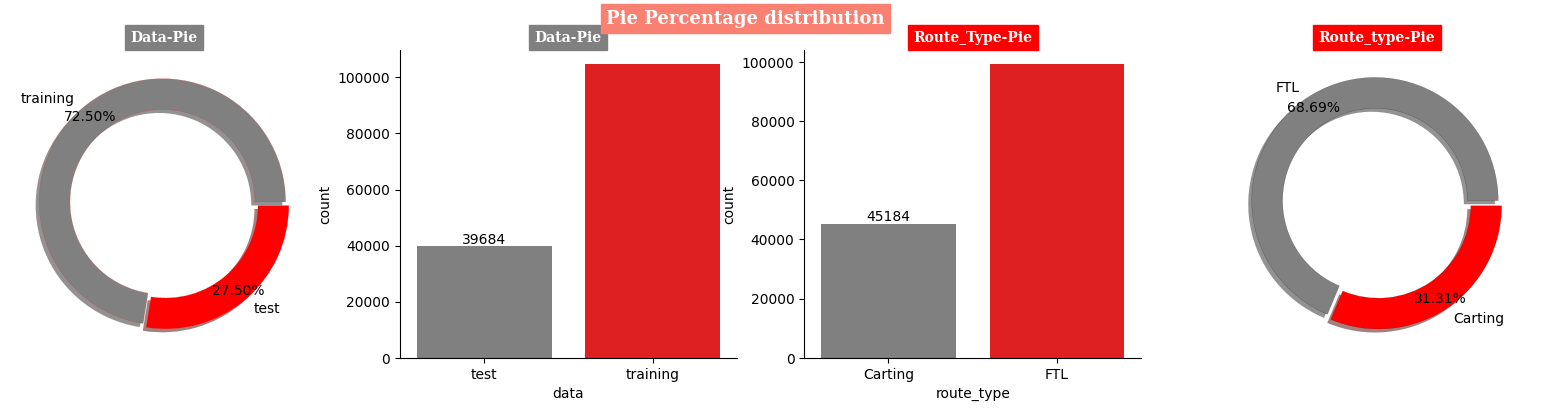

In [47]:
plt.figure(figsize=(20,4))
plt.suptitle('Pie Percentage distribution',fontsize=13,fontfamily='serif',fontweight='bold',backgroundcolor=cp[-1],color='w')

plt.subplot(141)
plt.pie(df['data'].value_counts(), labels=df['data'].value_counts().index, colors=cp,counterclock=True , explode=(0.02,0.02) , autopct='%.2f%%', pctdistance=0.905,
       textprops={'color':'k','fontsize':10} , shadow=True, radius=1,wedgeprops=dict(edgecolor='r',linewidth=0.1,width=0.25))
plt.title('Data-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(142)
a = sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts(), palette=cp)
a.bar_label(a.containers[0], label_type='edge',fmt='%d')
plt.title('Data-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(143)
b = sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts(), palette=cp)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Route_Type-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')

plt.subplot(144)
plt.pie(df['route_type'].value_counts(), labels=df['route_type'].value_counts().index, colors=cp,counterclock=True , explode=(0.03,0.02) , autopct='%.2f%%', pctdistance=0.905,
       textprops={'color':'k','fontsize':10} , shadow=True, radius=1,wedgeprops=dict(edgecolor='k',linewidth=0.1,width=0.25))
plt.title('Route_type-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')

sns.despine()
plt.show()

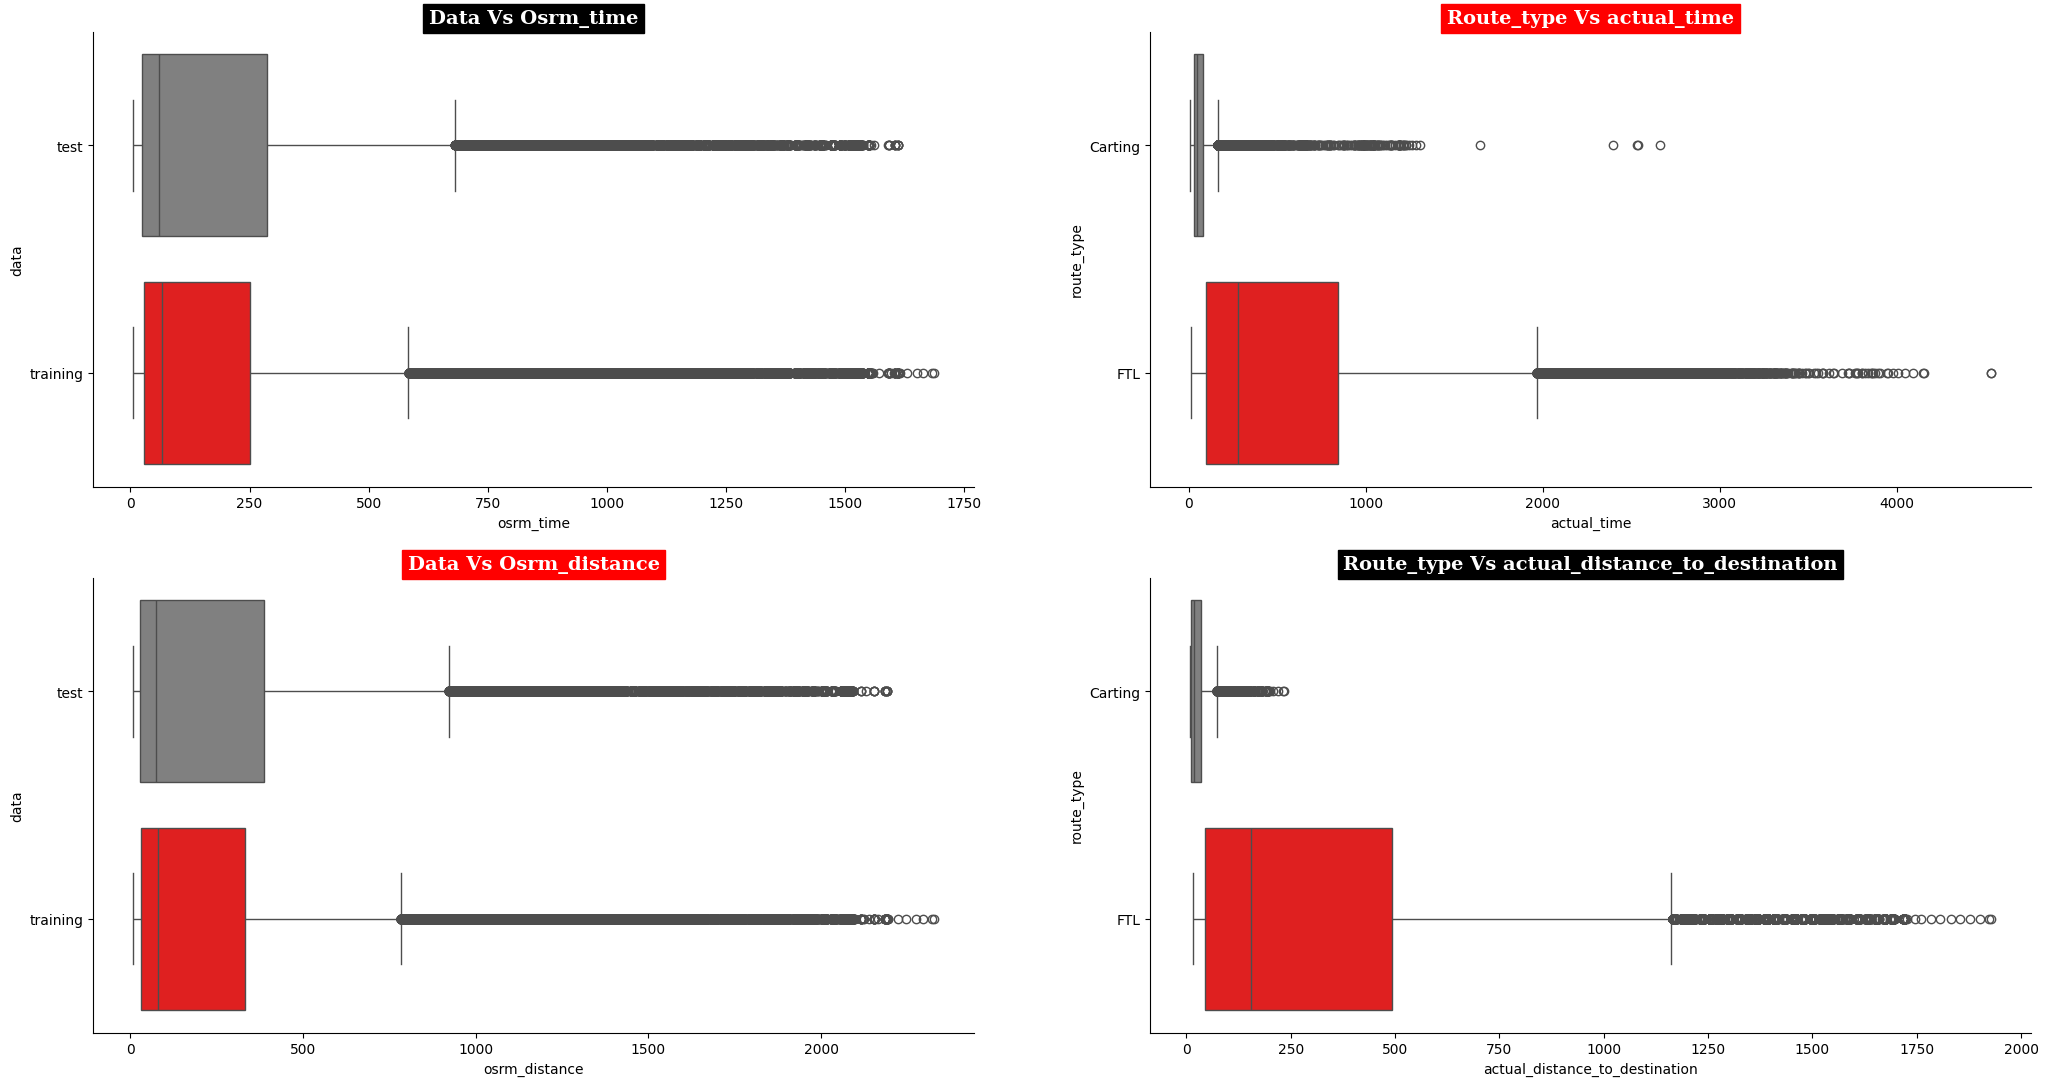

In [48]:
plt.figure(figsize=(25,13))
plt.style.use('default')
plt.style.use('seaborn-bright')

plt.subplot(221)
sns.boxplot(data=df,y='data',x='osrm_time',palette=cp)
plt.title('Data Vs Osrm_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')

plt.subplot(222)
sns.boxplot(data=df,y='route_type',x='actual_time',palette=cp)
plt.title('Route_type Vs actual_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(223)
sns.boxplot(data=df,y='data',x='osrm_distance',palette=cp)
plt.title('Data Vs Osrm_distance',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(224)
sns.boxplot(data=df,y='route_type',x='actual_distance_to_destination',palette=cp)
plt.title('Route_type Vs actual_distance_to_destination',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
sns.despine()
plt.show()

# **Observations**
The range of recorded osrm time is the same for training and test data.
When opposed to carting, the FTL route type has more actual time. This could possibly be because FTL is utilized for much more than just bringing in the data at our disposal.
The range of recorded osrm distance is the same for training and test data.
Compared to carting, the FTL route type has a greater real distance. This could possibly be because FTL is utilized for much more than just bringing in the data at our disposal.


**Merging of rows and aggregation of fields**

In [49]:
# Grouping by segment
# Creating a unique identifier for each segment of a trip

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

df['segment_key'] = df['trip_uuid'] + '+' + df['source_center'] + '+' + df['destination_center']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

segment_key  \
0       trip-153741093647649320+IND388121AAA+IND388620AAB   
1       trip-153741093647649320+IND388121AAA+IND388620AAB   
2       trip-153741093647649320+IND388121AAA+IND388620AAB   
3       trip-153741093647649320+IND388121AAA+IND388620AAB   
4       trip-153741093647649320+IND388121AAA+IND388620AAB   
...                                                   ...   
144862  trip-153746066843555182+IND131028AAB+IND000000ACB   
144863  trip-153746066843555182+IND131028AAB+IND000000ACB   
144864  trip-153746066843555182+IND131028AAB+IND000000ACB   
144865  trip-153746066843555182+IND131028AAB+IND000000ACB   
144866  trip-153746066843555182+IND131028AAB+IND000000ACB   

        segment_actual_time  segment_actual_time_sum  segment_osrm_distance  \
0                      14.0                     14.0                11.9653   
1                      10.0                     24.0                 9.7590   
2                      16.0                     40.0                10.8152   
3                      21.0                     61.0                13.0224   
4                       6.0                     67.0                 3.9153   
...                     ...                      ...                    ...   
144862                 12.0                     92.0                 8.1858   
144863                 26.0                    118.0                17.3725   
144864                 20.0                    138.0                20.7053   
144865                 17.0                    155.0                18.8885   
144866                268.0                    423.0                 8.8088   

        segment_osrm_distance_sum  segment_osrm_time  segment_osrm_time_sum  
0                         11.9653               11.0                   11.0  
1                         21.7243                9.0                   20.0  
2                         32.5395                7.0                   27.0  
3                         45.5619               12.0                   39.0  
4                         49.4772                5.0                   44.0  
...                           ...                ...                    ...  
144862                    65.3487               12.0                   94.0  
144863                    82.7212               21.0                  115.0  
144864                   103.4265               34.0                  149.0  
144865                   122.3150               27.0                  176.0  
144866                   131.1238                9.0                  185.0  

[144316 rows x 7 columns]

In [50]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
segment_agg_data = df.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26217 2018-10-04 03:31:11.183797                    62.0   
26218 2018-10-04 05:47:45.162682                    91.0   
26219 2018-10-04 02:29:04.272194                    44.0   
26220 2018-10-04 08:46:09.166940                   287.0   
26221 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759164        732.0      329.0       446.5496   
1               

# **Reasoning:**
Based on the unique segment_key—a combination of trip_uuid, source_center, and destination_center—the rows have been combined.

The overall values for each section of the journey are reflected in the aggregated dataset.


# **Feature Engineering**

In [51]:
# 1. Calculating time difference between od_start_time and od_end_time
segment_agg_data['od_total_time']=(segment_agg_data['od_end_time'] - segment_agg_data['od_start_time'])
segment_agg_data['od_time_diff_hour'] = (segment_agg_data['od_total_time']).dt.total_seconds()/3600
segment_agg_data

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26217 2018-10-04 03:31:11.183797                    62.0   
26218 2018-10-04 05:47:45.162682                    91.0   
26219 2018-10-04 02:29:04.272194                    44.0   
26220 2018-10-04 08:46:09.166940                   287.0   
26221 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759164        732.0      329.0       446.5496   
1               

In [52]:
de = segment_agg_data.copy()

In [53]:
# using regex pattern to seperate the city,place,state
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [54]:
de[['source_city', 'source_place', 'source_state']] = de['source_name'].apply(lambda x: pd.Series(extract_info(x)))

In [55]:
de[['destination_city', 'destination_place', 'destination_state']] = de['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [56]:
de

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26217 2018-10-04 03:31:11.183797                    62.0   
26218 2018-10-04 05:47:45.162682                    91.0   
26219 2018-10-04 02:29:04.272194                    44.0   
26220 2018-10-04 08:46:09.166940                   287.0   
26221 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759164        732.0      329.0       446.5496   
1               

In [57]:
de[(de['source_place']=='') | (de['destination_place']=='')]

segment_key  \
7      trip-153671052974046625+IND583101AAA+IND583201AAA   
9      trip-153671052974046625+IND583201AAA+IND583119AAA   
19     trip-153671110078355292+IND121004AAB+IND121001AAA   
33     trip-153671173668736946+IND110043AAA+IND110078AAA   
80     trip-153671320807895983+IND121004AAB+IND121102AAA   
...                                                  ...   
26118  trip-153860849934816308+IND110078AAA+IND110043AAA   
26153  trip-153860958923357924+IND842003AAB+IND482002AAA   
26180  trip-153861007249500192+IND842001AAA+IND846004AAA   
26181  trip-153861007249500192+IND846004AAA+IND847103AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
7      trip-153671052974046625  training        FTL   
9      trip-153671052974046625  training        FTL   
19     trip-153671110078355292  training    Carting   
33     trip-153671173668736946  training    Carting   
80     trip-153671320807895983  training    Carting   
...                        ...       ...        ...   
26118  trip-153860849934816308      test    Carting   
26153  trip-153860958923357924      test    Carting   
26180  trip-153861007249500192      test        FTL   
26181  trip-153861007249500192      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                            source_name  \
7     2018-09-12 00:02:09.740725                 Bellary_Dc (Karnataka)   
9     2018-09-12 00:02:09.740725                     Hospet (Karnataka)   
19    2018-09-12 00:11:40.783923           FBD_Balabhgarh_DPC (Haryana)   
33    2018-09-12 00:22:16.687619                Delhi_Nangli_IP (Delhi)   
80    2018-09-12 00:46:48.079257           FBD_Balabhgarh_DPC (Haryana)   
...                          ...                                    ...   
26118 2018-10-03 23:14:59.348414                      Janakpuri (Delhi)   
26153 2018-10-03 23:33:09.233829  Jabalpur_Adhartal_IP (Madhya Pradesh)   
26180 2018-10-03 23:41:12.495257            Muzaffrpur_Bbganj_I (Bihar)   
26181 2018-10-03 23:41:12.495257                      Darbhanga (Bihar)   
26221 2018-10-03 23:59:42.701692                     Hospet (Karnataka)   

                    destination_name              od_start_time  \
7                 Hospet (Karnataka) 2018-09-12 00:02:09.740725   
9      Sandur_WrdN1DPP_D (Karnataka) 2018-09-12 02:34:10.515593   
19               Faridabad (Haryana) 2018-09-12 00:11:40.783923   
33                 Janakpuri (Delhi) 2018-09-12 00:22:16.687619   
80                  Palwal (Haryana) 2018-09-12 00:46:48.079257   
...                              ...                        ...   
26118        Delhi_Nangli_IP (Delhi) 2018-10-04 01:32:14.530264   
26153      Jabalpur (Madhya Pradesh) 2018-10-03 23:33:09.233829   
26180              Darbhanga (Bihar) 2018-10-03 23:41:12.495257   
26181      Benipur_Javahar_D (Bihar) 2018-10-04 02:17:56.235080   
26221  Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
7     2018-09-12 02:34:10.515593                   152.0   
9     2018-09-12 03:54:43.114421                    80.0   
19    2018-09-12 00:50:10.814399                    38.0   
33    2018-09-12 01:29:19.277412                    67.0   
80    2018-09-12 01:53:32.471405                    66.0   
...                          ...                     ...   
26118 2018-10-04 03:05:32.479193                    93.0   
26153 2018-10-04 07:48:23.711056                   495.0   
26180 2018-10-04 02:17:56.235080                   156.0   
26181 2018-10-04 04:20:42.531207                   122.0   
26221 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
7                           59.530350        147.0       46.0        63.6461   
9                           26.600536         63.0       27.0        29.5696

In [58]:
de.loc[de['source_place']=='','source_place']=de['source_city']
de.loc[de['destination_place']=='','destination_place']=de['destination_city']

In [59]:
de[de.source_place.isna()]

Empty DataFrame
Columns: [segment_key, trip_uuid, data, route_type, trip_creation_time, source_name, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_actual_time_sum, segment_osrm_time_sum, segment_osrm_distance_sum, od_total_time, od_time_diff_hour, source_city, source_place, source_state, destination_city, destination_place, destination_state]
Index: []

In [60]:
de.isna().sum()

segment_key                       0
trip_uuid                         0
data                              0
route_type                        0
trip_creation_time                0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_actual_time_sum           0
segment_osrm_time_sum             0
segment_osrm_distance_sum         0
od_total_time                     0
od_time_diff_hour                 0
source_city                       0
source_place                      0
source_state                      0
destination_city                  0
destination_place                 0
destination_state                 0
dtype: int64

In [61]:
de.loc[de.source_city=='Bangalore','source_city']='Bengaluru'
de.loc[de.destination_city=='Bangalore','destination_city']='Bengaluru'

In [62]:
np.set_printoptions(threshold=np.inf)

In [63]:
de['source_city'].unique()

array(['Kanpur', 'Bhopal', 'Doddablpur', 'Tumkur', 'Gurgaon', 'Bengaluru',
       'Mumbai', 'Bellary', 'Sandur', 'Hospet', 'Chennai', 'HBR', 'Surat',
       'Delhi', 'Pune', 'FBD', 'Shirala', 'Ratnagiri', 'Kolhapur',
       'Hyderabad', 'Anantapur', 'Thirumalagiri', 'Gulbarga', 'Aland',
       'Sindagi', 'Indi', 'Jaipur', 'Allahabad', 'Guwahati', 'Unnao',
       'Narsinghpur', 'Gadarwara', 'Shrirampur', 'Nashik', 'Sinnar',
       'Sangamner', 'Shirdi', 'Kopargaon', 'Vaijiapur', 'Hoogly',
       'Hooghly', 'Kolkata', 'Madakasira', 'Pavagada', 'Sonari',
       'Medchal', 'Dindigul', 'Kodaikanal', 'Batlagundu', 'Palani',
       'Oddnchtram', 'Jalandhar', 'Nakodar', 'Kapurthala', 'Faridabad',
       'Chandigarh', 'Deoli', 'Pandharpur', 'Atapadi', 'CCU', 'Bhandara',
       'Kurnool', 'Palwal', 'Bhiwandi', 'Bhatinda', 'TalwandiSabo',
       'Mansa', 'Jhunir', 'RoopNagar', 'AnandprShb', 'Bantwal', 'Kadaba',
       'Sullia', 'Chittapur', 'Sedam', 'Chincholi', 'Lalru', 'Kadi',
       'Mehsana',

In [64]:
de['source_place'].unique()

array(['Central_H_6', 'Trnsport_H', 'ChikaDPP_D', 'Veersagr_I',
       'Bilaspur_HB', 'Nelmngla_H', 'Hub', 'Dc', 'WrdN1DPP_D', 'Hospet',
       'Poonamallee', 'Porur_DPC', 'Chrompet_DPC', 'Layout PC',
       'Bagaluru_D', 'Central_D_12', 'Central_I_4', 'Lajpat_IP',
       'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3', 'MjgaonRd_D',
       'Shivaji_I', 'Shamshbd_H', 'KamaStrt_I', 'Xroad_D', 'Nehrugnj_I',
       'RazaviRd_D', 'KalyanNg_D', 'SindgiRD_D', 'Central_I_7',
       'VarunCly_DC', 'Central_H_1', 'Nangli_IP', 'North', 'VikasRam_D',
       'KndliDPP_D', 'MPward_D', 'Central_D_9', 'DavkharRd_D',
       'TgrniaRD_I', 'Central_D_1', 'JawanChk_D', 'SaiBansi_D',
       'NkshtrPz_D', 'YeolaRD_D', 'Bandel_D', 'DC', 'North_I_4',
       'RTCStand_D', 'PnukndRD_D', 'Central_DPP_1', 'KGAirprt_HB',
       'North_D_2', 'MROoffce_D', 'Athithnr_DC', 'RTOofice_D',
       'RjndraRd_D', 'Palani_D', 'DPC', 'ChowkDPP_D', 'Mthurard_L',
       'Mullanpr_DC', 'Mehmdpur_H', 'Mohali', 'Central_DPP_2',
  

In [65]:
de['source_state'].value_counts().to_frame().style.background_gradient(cmap='Reds')

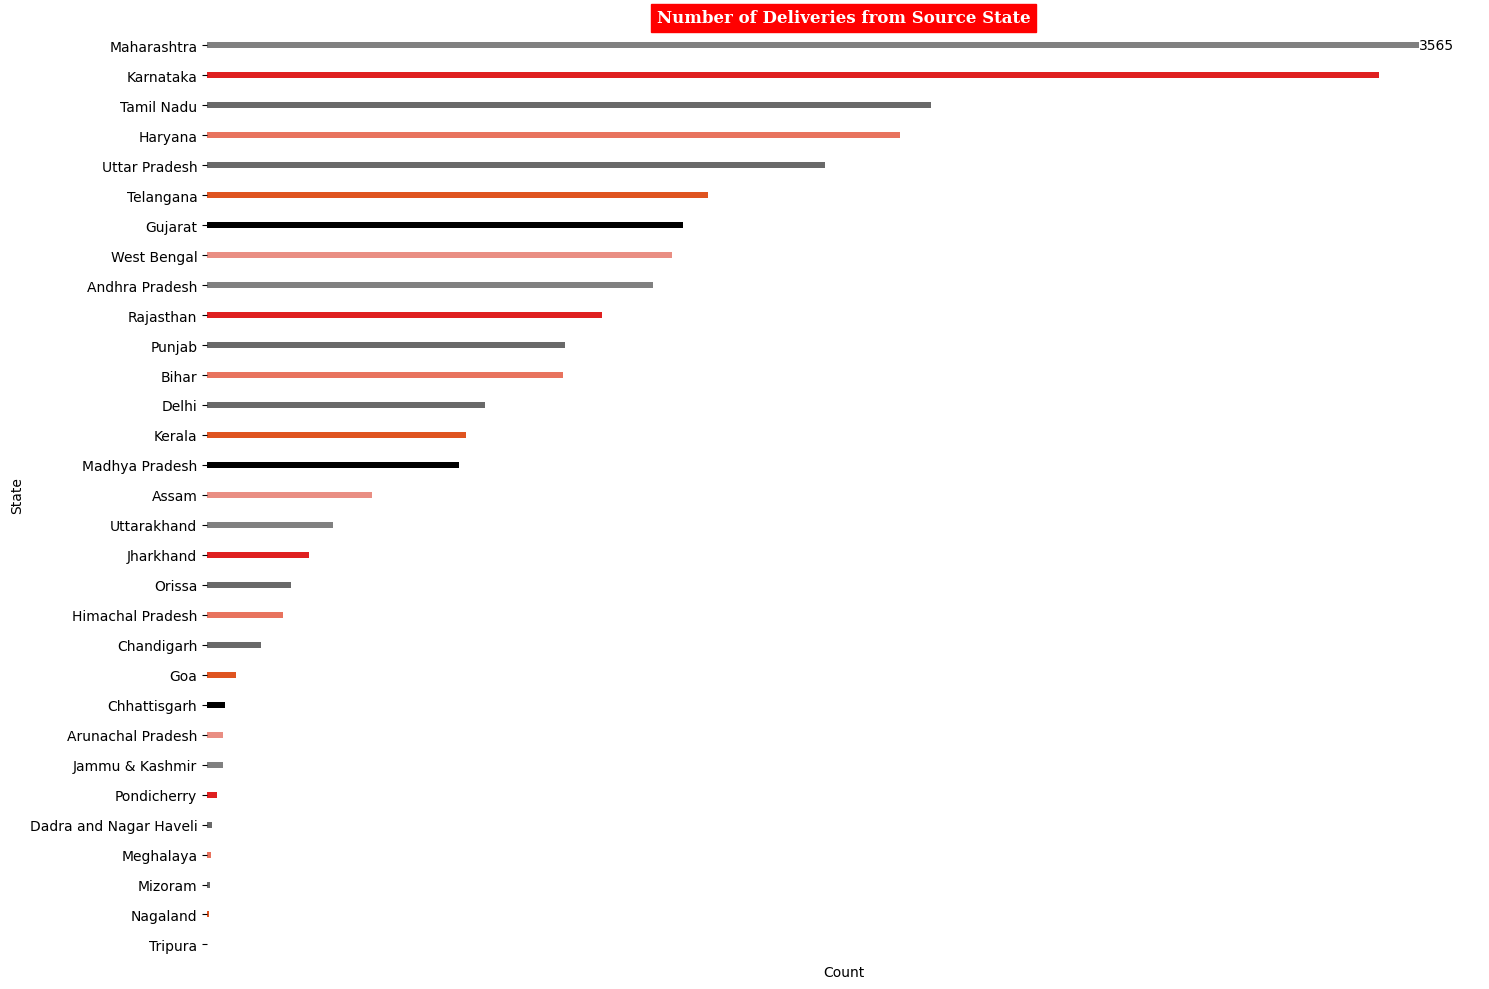

In [66]:
state_counts = de['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

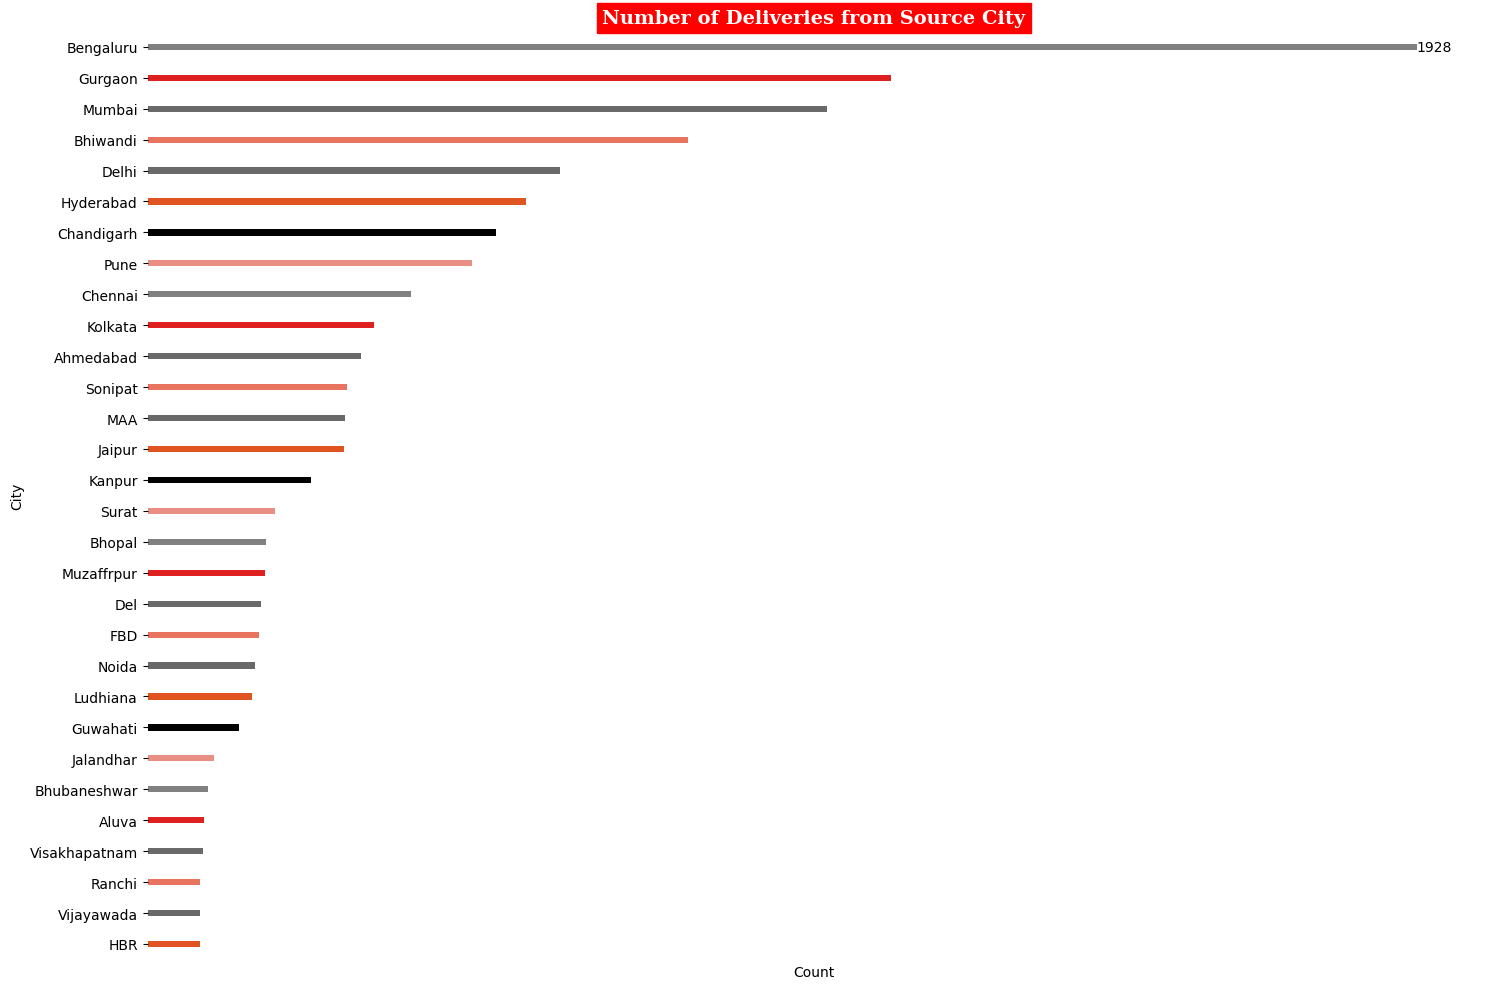

In [67]:
city_counts = de['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

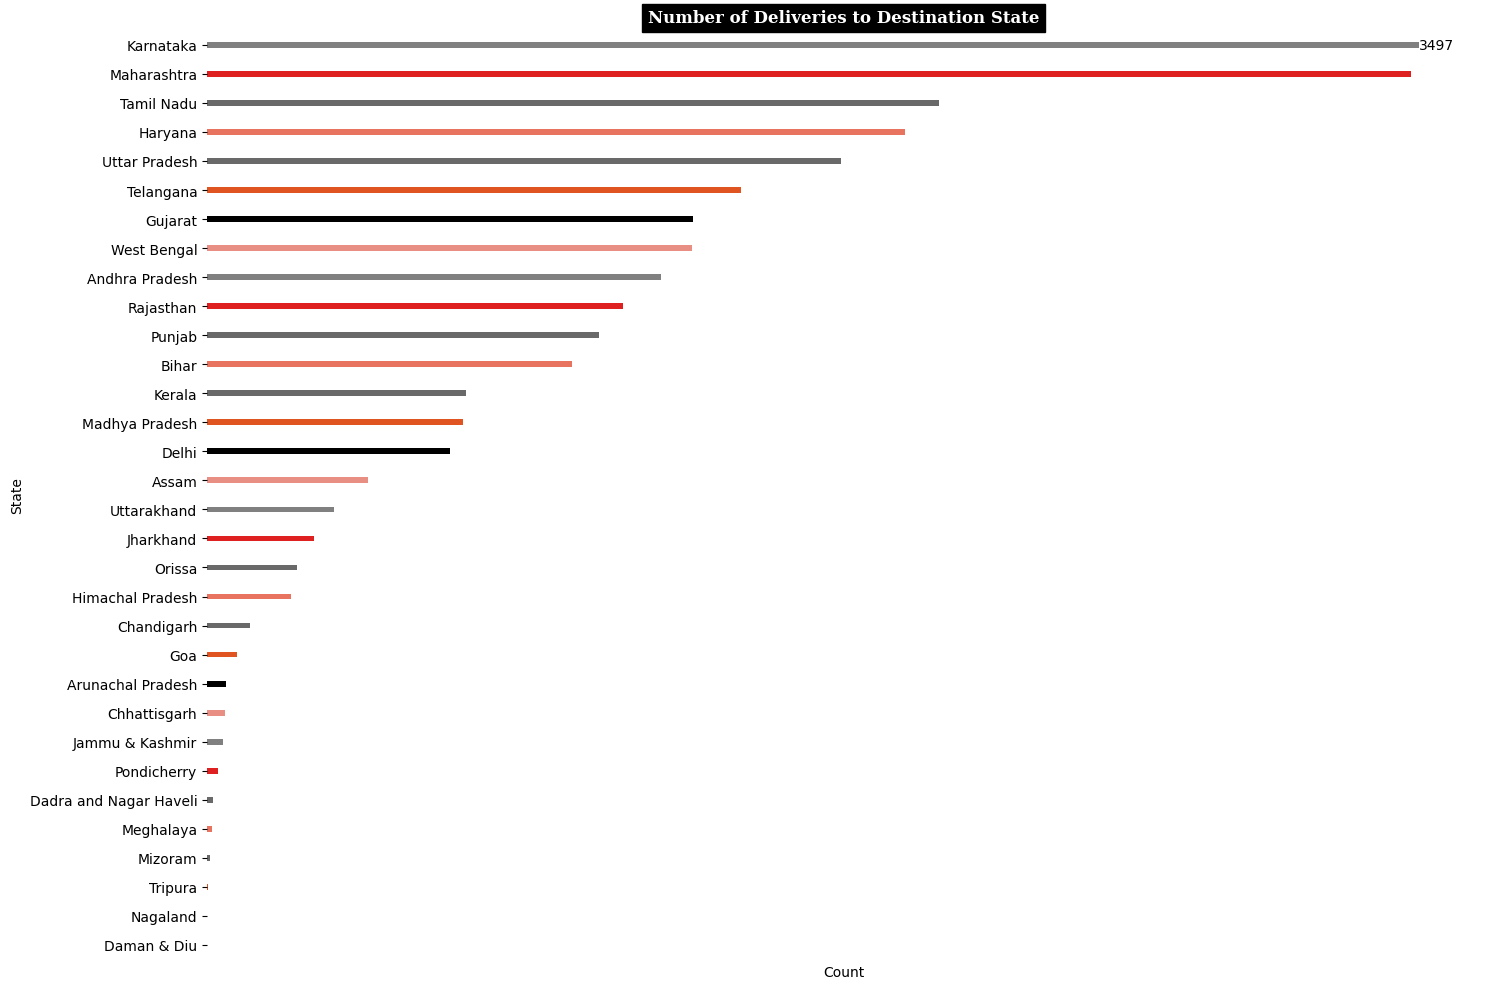

In [68]:
state_counts = de['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

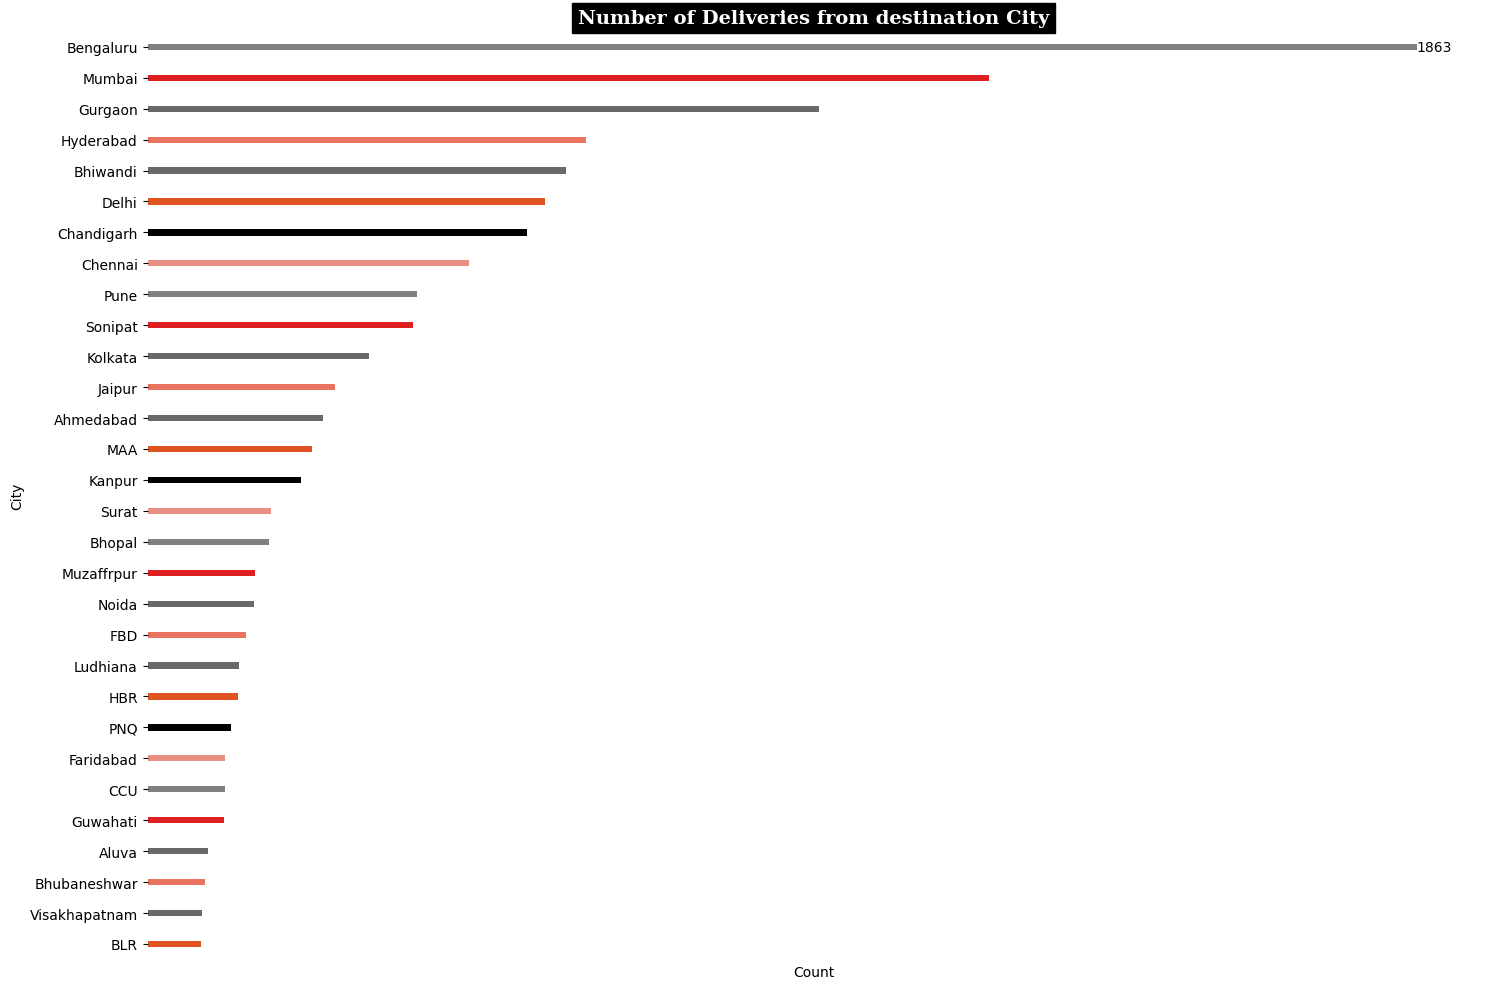

In [69]:
city_counts = de['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from destination City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Insights:**
**Contributors from Source State**

The main contributors are Maharashtra, Karnataka, Tamil Nadu, Haryana, and Uttar Pradesh, where the highest number of bookings this month indicates a high level of involvement.

**Contributors of Source City**

Cities with the highest number of bookings are Bengaluru, Gurgaon, Mumbai, Bhiwandi, Delhi, and Hyderabad.

**Destination State**

States like Karnataka, Maharashtra, Tamil Nadu, Haryana, and Uttar Pradesh where maximum packages are received in this month indicating significant engagement.

**Destination City**

Cities like Bengaluru, Mumbai, Gurgaon, Bhiwandi, Hyderabad, Delhi where the major no.of booking are received.


In [70]:
np.set_printoptions(threshold=np.inf)

In [71]:
de['corridor'] = de['source_name'] +' <---> '+ de['destination_name']
de['corridor'].value_counts()

corridor
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)            151
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_Bomsndra_HB (Karnataka)            127
Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)           121
Bengaluru_KGAirprt_HB (Karnataka) <---> Bangalore_Nelmngla_H (Karnataka)            108
Pune_Tathawde_H (Maharashtra) <---> Bhiwandi_Mankoli_HB (Maharashtra)               107
                                                                                   ... 
Ongole_SubhVRTL_I (Andhra Pradesh) <---> Kandukur_LICOffce_D (Andhra Pradesh)         1
Madnapalle_PngnrRd_D (Andhra Pradesh) <---> Palamaner_Lakshmi_D (Andhra Pradesh)      1
Dharmavram_SaiNgr_D (Andhra Pradesh) <---> Kadiri_GVManu_D (Andhra Pradesh)           1
Baharampur_Chuanpur_I (West Bengal) <---> Chapra_NagarDPP_D (West Bengal)             1
Jaipur_NgrNigam_DC (Rajasthan) <---> Jaipur_Central_D_1 (Rajasthan)                   1
Name: count, Length: 2741, dtype: int64

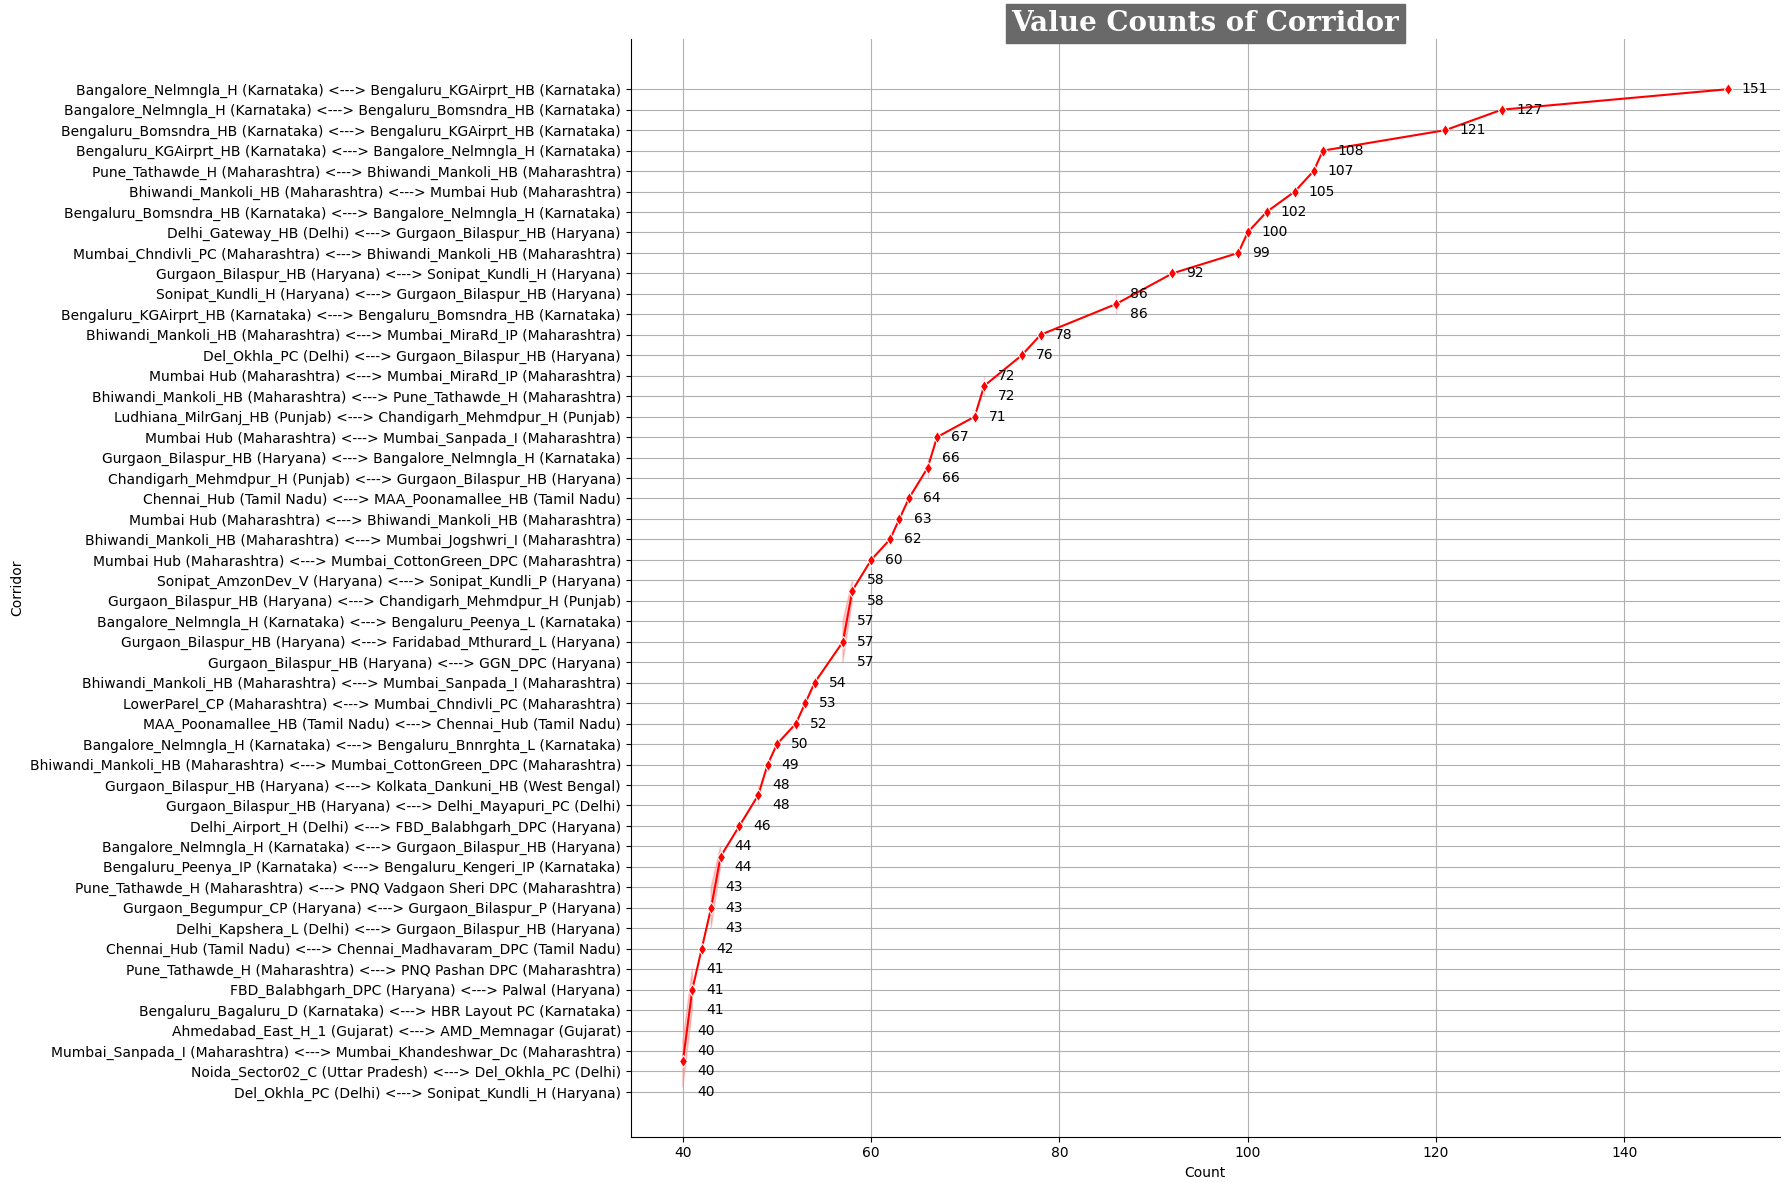

In [72]:
corridor_counts = de['corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))
#corridor_counts.plot(kind='line', marker='d', color='r')
sns.lineplot(y=corridor_counts.index, x=corridor_counts.values, marker='d', color='r')
plt.title('Value Counts of Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgrey',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

**Insights:**
With 151 and 127 items sent, respectively, the route Bangalore_Nelamangala_H to Bengaluru_KGAirport_HB,Bengaluru_Bomsndra_HB has the largest package volume.

With 121 items sent, Bengaluru_Bommasandra_HB to Bengaluru_KGAirport_HB is likewise a popular route.

With 108 shipments sent, Bengaluru_KGAirport_HB to Bangalore_Nelamangala_H has modest activity.

The information highlights Bengaluru's significance as a major package traffic hub and corridor within the state of Karnataka.

In [73]:
de['state_corridor'] = de['source_state']+'--'+de['source_city'] +' <---> '+ de['destination_state']+'--'+de['destination_city']
de['state_corridor'].value_counts()

state_corridor
Karnataka--Bengaluru <---> Karnataka--Bengaluru                   1413
Maharashtra--Mumbai <---> Maharashtra--Mumbai                      622
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai                    512
Maharashtra--Mumbai <---> Maharashtra--Bhiwandi                    345
Telangana--Hyderabad <---> Telangana--Hyderabad                    316
                                                                  ... 
Gujarat--Jetpur <---> Gujarat--Dhoraji                               1
Andhra Pradesh--Anakapalle <---> Andhra Pradesh--Visakhapatnam       1
Andhra Pradesh--Narsiptnm <---> Andhra Pradesh--Anakapalle           1
West Bengal--MirzapurWB <---> West Bengal--Kolkata                   1
Uttar Pradesh--Anandnagar <---> Uttar Pradesh--Gorakhpur             1
Name: count, Length: 2302, dtype: int64

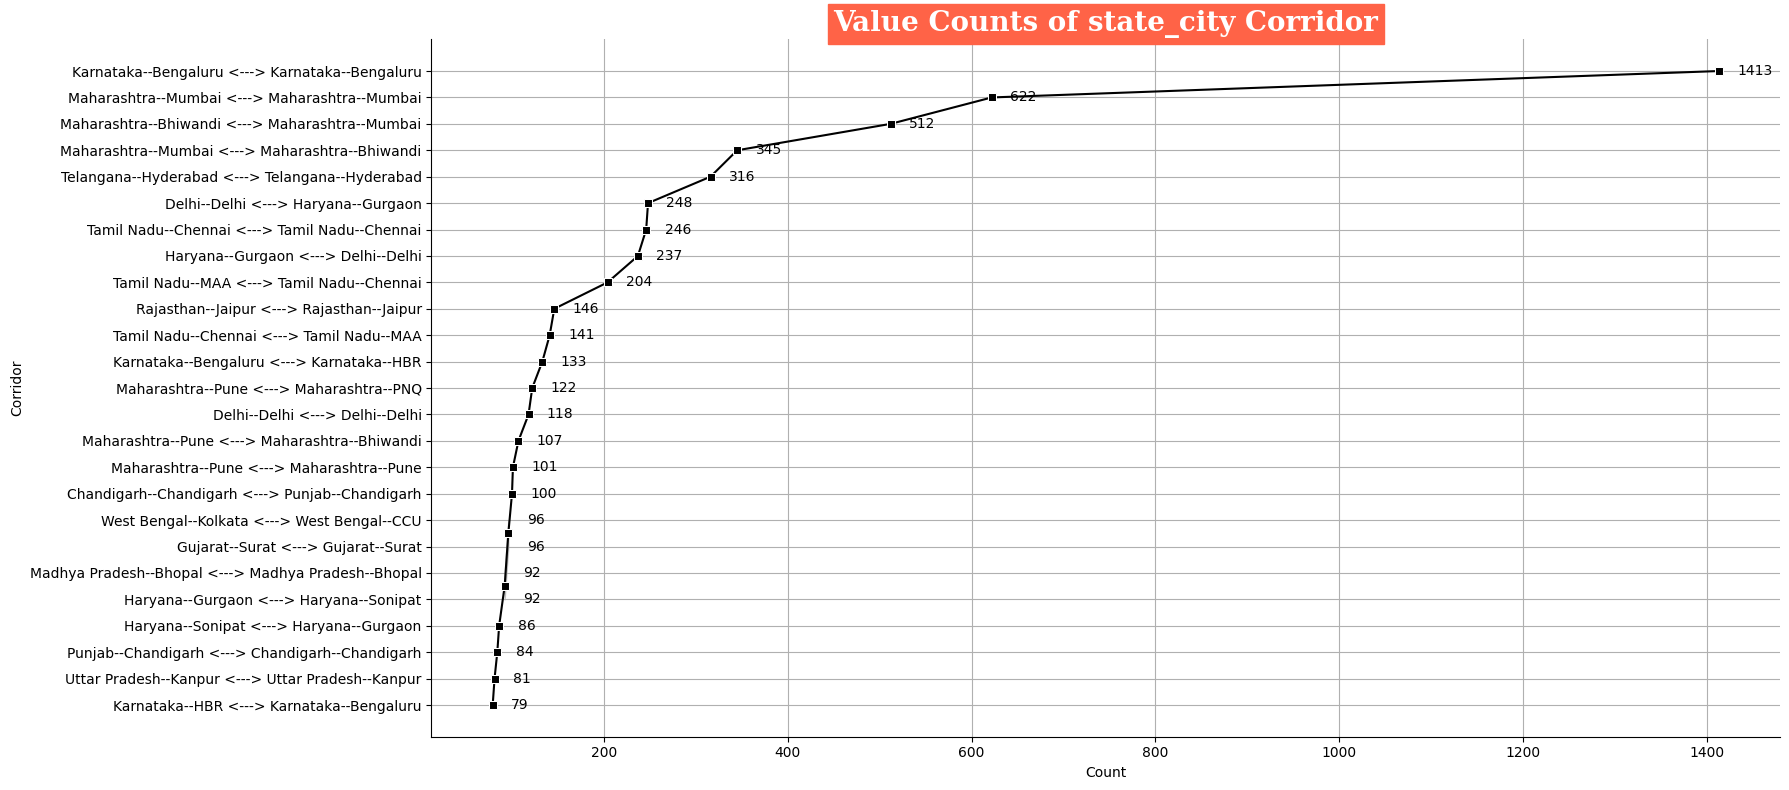

In [74]:
state_corridor_counts = de['state_corridor'].value_counts()[:25]

plt.figure(figsize=(18,8))
sns.lineplot(y=state_corridor_counts.index, x=state_corridor_counts.values, marker='s', color='k')
plt.title('Value Counts of state_city Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='tomato',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(state_corridor_counts.values):
    plt.text(count+20, state_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

In [75]:
de['city_corridor'] = de['source_city']+'--'+de['source_place'] +' <---> '+ de['destination_city']+'--'+de['destination_place']
display(de['city_corridor'].value_counts())

city_corridor
Bengaluru--Nelmngla_H <---> Bengaluru--KGAirprt_HB     151
Bengaluru--Nelmngla_H <---> Bengaluru--Bomsndra_HB     127
Bengaluru--Bomsndra_HB <---> Bengaluru--KGAirprt_HB    121
Bengaluru--KGAirprt_HB <---> Bengaluru--Nelmngla_H     108
Pune--Tathawde_H <---> Bhiwandi--Mankoli_HB            107
                                                      ... 
Ongole--SubhVRTL_I <---> Kandukur--LICOffce_D            1
Madnapalle--PngnrRd_D <---> Palamaner--Lakshmi_D         1
Dharmavram--SaiNgr_D <---> Kadiri--GVManu_D              1
Baharampur--Chuanpur_I <---> Chapra--NagarDPP_D          1
Jaipur--NgrNigam_DC <---> Jaipur--Central_D_1            1
Name: count, Length: 2741, dtype: int64

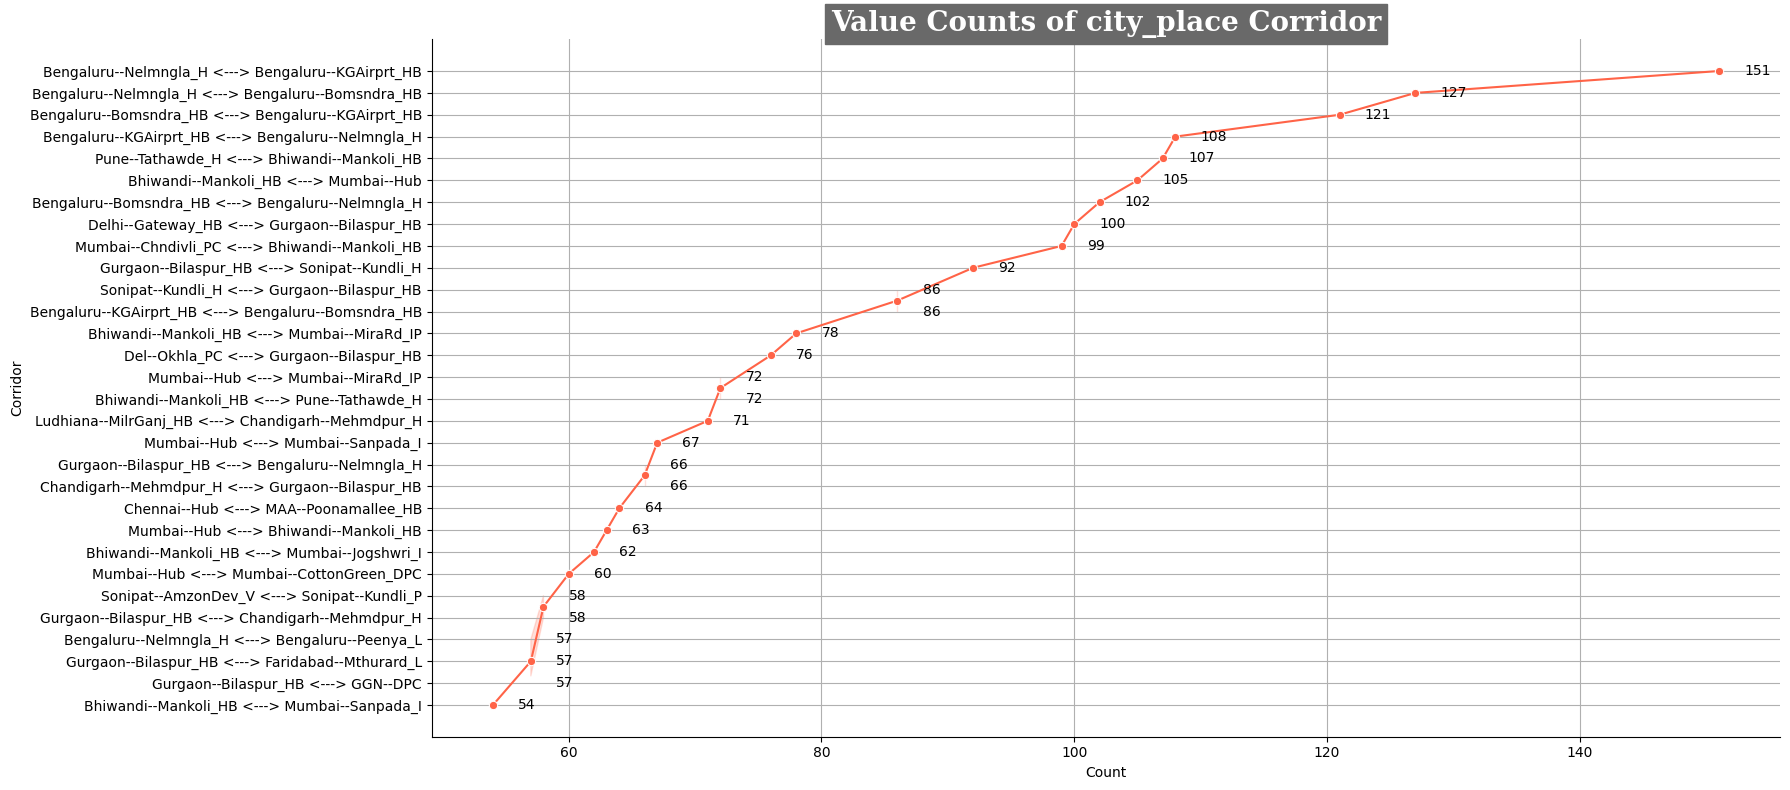

In [76]:
city_corridor_counts = de['city_corridor'].value_counts()[:30]

plt.figure(figsize=(18,8))
sns.lineplot(y=city_corridor_counts.index, x=city_corridor_counts.values, marker='o', color='tomato')
plt.title('Value Counts of city_place Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgray',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(city_corridor_counts.values):
    plt.text(count+2, city_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

# **Insights:**

Maharashtra, Karnataka, Haryana, and Tamil Nadu serve as key starting and ending locations for delivery services.

Mumbai, Gurgaon, Delhi, and Bengaluru are major metropolitan centers from where many deliveries originate.

A large proportion of nationwide deliveries are destined for Mumbai, Bengaluru, Gurgaon, and Delhi.

In [77]:
 #Extracting features like month, year, day, etc. from Trip_creation_time
de['trip_creation_month'] = de['trip_creation_time'].dt.month
de['trip_creation_year'] = de['trip_creation_time'].dt.year
de['trip_creation_day'] = de['trip_creation_time'].dt.day
de['trip_creation_hour'] = de['trip_creation_time'].dt.hour
de['trip_creation_weekday'] = de['trip_creation_time'].dt.weekday
de['trip_creation_week'] = de['trip_creation_time'].dt.isocalendar().week
de

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26217 2018-10-04 03:31:11.183797                    62.0   
26218 2018-10-04 05:47:45.162682                    91.0   
26219 2018-10-04 02:29:04.272194                    44.0   
26220 2018-10-04 08:46:09.166940                   287.0   
26221 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759164        732.0      329.0       446.5496   
1               

In [79]:
new_df = de.copy()

In [80]:
new_df.sample(4)

segment_key  \
22976  trip-153835019011713845+IND424006AAA+IND424304AAC   
9386   trip-153735972730081305+IND231225AAB+IND486886AAA   
8250   trip-153728267359147312+IND000000ACB+IND110064AAA   
5751   trip-153711794150895548+IND382430AAB+IND388320AAA   

                     trip_uuid      data route_type  \
22976  trip-153835019011713845      test        FTL   
9386   trip-153735972730081305  training        FTL   
8250   trip-153728267359147312  training    Carting   
5751   trip-153711794150895548  training        FTL   

              trip_creation_time                      source_name  \
22976 2018-09-30 23:29:50.117372   Dhule_MIDCAvdn_I (Maharashtra)   
9386  2018-09-19 12:22:07.301055  Anpara_Parasi_D (Uttar Pradesh)   
8250  2018-09-18 14:57:53.591711    Gurgaon_Bilaspur_HB (Haryana)   
5751  2018-09-16 17:12:21.509224     Ahmedabad_East_H_1 (Gujarat)   

                           destination_name              od_start_time  \
22976       Sakri_DhuleRoad_D (Maharashtra) 2018-09-30 23:29:50.117372   
9386   Singrauli_Waidhan_D (Madhya Pradesh) 2018-09-20 02:34:54.660986   
8250              Delhi_Mayapuri_PC (Delhi) 2018-09-18 14:57:53.591711   
5751             Anand_Vaghasi_IP (Gujarat) 2018-09-16 17:12:21.509224   

                     od_end_time  start_scan_to_end_scan  \
22976 2018-10-01 01:19:55.776404                   110.0   
9386  2018-09-20 03:43:46.843266                    68.0   
8250  2018-09-18 18:18:10.705532                   200.0   
5751  2018-09-16 21:04:56.061290                   232.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
22976                       48.664636         94.0       41.0        55.4916   
9386                        18.219589         38.0       25.0        22.4632   
8250                        45.368094         88.0       58.0        55.8946   
5751                        56.668264         79.0       63.0        79.8578   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
22976                 93.0               40.0                55.4916   
9386                  38.0               25.0                22.4632   
8250                  85.0               72.0                70.6563   
5751                  78.0              110.0               122.6482   

       segment_actual_time_sum  segment_osrm_time_sum  \
22976                     93.0                   40.0   
9386                      38.0                   25.0   
8250                      85.0                   72.0   
5751                      78.0                  110.0   

       segment_osrm_distance_sum          od_total_time  od_time_diff_hour  \
22976                    55.4916 0 days 01:50:05.659032           1.834905   
9386                     22.4632 0 days 01:08:52.182280           1.147828   
8250                     70.6563 0 days 03:20:17.113821           3.338087   
5751                    122.6482 0 days 03:52:34.552066           3.876264   

      source_city source_place   source_state destination_city  \
22976       Dhule   MIDCAvdn_I    Maharashtra            Sakri   
9386       Anpara     Parasi_D  Uttar Pradesh        Singrauli   
8250      Gurgaon  Bilaspur_HB        Haryana            Delhi   
5751    Ahmedabad     East_H_1        Gujarat            Anand   

      destination_place destination_state  \
22976       DhuleRoad_D       Maharashtra   
9386          Waidhan_D    Madhya Pradesh   
8250        Mayapuri_PC             Delhi   
5751         Vaghasi_IP           Gujarat   

                                                corridor  \
22976  Dhule_MIDCAvdn_I (Maharashtra) <---> Sakri_Dhu...   
9386   Anpara_Parasi_D (Uttar Pradesh) <---> Singraul...   
8250   Gurgaon_Bilaspur_HB (Haryana) <---> Delhi_Maya...   
5751   Ahmedabad_East_H_1 (Gujarat) <---> Anand_Vagha...   

                                          state_corridor  \
22976        Maharashtra--Dhule <---> Maharashtra--Sakri   
9386   Uttar Pradesh--Anpara <---

In [81]:
create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'trip_creation_month' : 'first',
  'trip_creation_year' : 'first',
  'trip_creation_day' : 'first',
  'trip_creation_hour' : 'first',
  'trip_creation_weekday' : 'first',
  'trip_creation_week' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'source_name': 'first',
  'source_city':'first',
  'source_state':'first',
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first',
  'corridor':'first',
  'state_corridor':'first',
  'city_corridor':'first'
  }

trip_agg_df = new_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_agg_df

trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671042288605164  training    Carting   
2      trip-153671043369099517  training        FTL   
3      trip-153671046011330457  training    Carting   
4      trip-153671052974046625  training        FTL   
...                        ...       ...        ...   
14782  trip-153861095625827784      test    Carting   
14783  trip-153861104386292051      test    Carting   
14784  trip-153861106442901555      test    Carting   
14785  trip-153861115439069069      test    Carting   
14786  trip-153861118270144424      test        FTL   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-12 16:39:46.858469   
1     2018-09-12 02:03:09.655591 2018-09-12 02:03:09.655591   
2     2018-09-14 03:40:17.106733 2018-09-14 03:40:17.106733   
3     2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4     2018-09-12 00:02:09.740725 2018-09-12 03:54:43.114421   
...                          ...                        ...   
14782 2018-10-03 23:55:56.258533 2018-10-04 06:41:25.409035   
14783 2018-10-03 23:57:23.863155 2018-10-04 00:57:59.294434   
14784 2018-10-04 02:51:27.075797 2018-10-04 02:51:27.075797   
14785 2018-10-03 23:59:14.390954 2018-10-04 02:29:04.272194   
14786 2018-10-04 03:58:40.726547 2018-10-04 03:58:40.726547   

       od_time_diff_hour         trip_creation_time  trip_creation_month  \
0              37.668497 2018-09-12 00:00:16.535741                    9   
1               3.026865 2018-09-12 00:00:22.886430                    9   
2              65.572709 2018-09-12 00:00:33.691250                    9   
3               1.674916 2018-09-12 00:01:00.113710                    9   
4              11.972484 2018-09-12 00:02:09.740725                    9   
...                  ...                        ...                  ...   
14782           4.300482 2018-10-03 23:55:56.258533                   10   
14783           1.009842 2018-10-03 23:57:23.863155                   10   
14784           7.035331 2018-10-03 23:57:44.429324                   10   
14785           5.808548 2018-10-03 23:59:14.390954                   10   
14786           5.906793 2018-10-03 23:59:42.701692                   10   

       trip_creation_year  trip_creation_day  trip_creation_hour  \
0                    2018                 12                   0   
1                    2018                 12                   0   
2                    2018                 12                   0   
3                    2018                 12                   0   
4                    2018                 12                   0   
...                   ...                ...                 ...   
14782                2018                  3                  23   
14783                2018                  3                  23   
14784                2018                  3                  23   
14785                2018                  3                  23   
14786                2018                  3                  23   

       trip_creation_weekday  trip_creation_week  start_scan_to_end_scan  \
0                          2                  37                  2259.0   
1                          2                  37                   180.0   
2                          2                  37                  3933.0   
3                          2                  37                   100.0   
4                          2                  37                   717.0   
...                      ...                 ...                     ...   
14782                      2                  40                   257.0   
14783                      2                  40                    60.0   
14784                      2                  40                   421.0   
14785                      2                  40                   347.0   
14786                      2         

In [82]:
numerical_columns = trip_agg_df.select_dtypes(include=[np.float32, np.float64])
numerical_columns

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

In [83]:
numerical_columns.describe().T

count        mean         std        min  \
od_time_diff_hour               14787.0    8.840187   10.978880   0.391024   
start_scan_to_end_scan          14787.0  529.429025  658.254936  23.000000   
actual_distance_to_destination  14787.0  164.090196  305.502982   9.002461   
actual_time                     14787.0  356.306012  561.517936   9.000000   
osrm_time                       14787.0  160.990938  271.459495   6.000000   
osrm_distance                   14787.0  203.887411  370.565564   9.072900   
segment_actual_time             14787.0  353.059174  556.365911   9.000000   
segment_osrm_time               14787.0  180.511598  314.679279   6.000000   
segment_osrm_distance           14787.0  222.705466  416.846279   9.072900   
segment_actual_time_sum         14787.0  353.059174  556.365911   9.000000   
segment_osrm_time_sum           14787.0  180.511598  314.679279   6.000000   
segment_osrm_distance_sum       14787.0  222.705466  416.846279   9.072900   

                                       25%         50%         75%  \
od_time_diff_hour                 2.494975    4.661846   10.558962   
start_scan_to_end_scan          149.000000  279.000000  632.000000   
actual_distance_to_destination   22.777099   48.287894  163.591258   
actual_time                      67.000000  148.000000  367.000000   
osrm_time                        29.000000   60.000000  168.000000   
osrm_distance                    30.756900   65.302800  206.644200   
segment_actual_time              66.000000  147.000000  364.000000   
segment_osrm_time                30.000000   65.000000  184.000000   
segment_osrm_distance            32.578850   69.784200  216.560600   
segment_actual_time_sum          66.000000  147.000000  364.000000   
segment_osrm_time_sum            30.000000   65.000000  184.000000   
segment_osrm_distance_sum        32.578850   69.784200  216.560600   

                                        max  
od_time_diff_hour                131.642533  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  2186.531787  
actual_time                     6265.000000  
osrm_time                       2032.000000  
osrm_distance                   2840.081000  
segment_actual_time             6230.000000  
segment_osrm_time               2564.000000  
segment_osrm_distance           3523.632400  
segment_actual_time_sum         6230.000000  
segment_osrm_time_sum           2564.000000  
segment_osrm_distance_sum       3523.632400

In [84]:
trip_agg_df.describe(include = object).T

count unique  \
trip_uuid          14787  14787   
source_name        14787    930   
source_city        14787    713   
source_state       14787     29   
source_place       14787    788   
destination_name   14787   1042   
destination_city   14787    851   
destination_state  14787     32   
destination_place  14787    866   
corridor           14787   1737   
state_corridor     14787   1366   
city_corridor      14787   1737   

                                                                 top  freq  
trip_uuid                                    trip-153671041653548748     1  
source_name                            Gurgaon_Bilaspur_HB (Haryana)  1052  
source_city                                                Bengaluru  1700  
source_state                                             Maharashtra  2714  
source_place                                             Bilaspur_HB  1052  
destination_name                       Gurgaon_Bilaspur_HB (Haryana)   745  
destination_city                                           Bengaluru  1633  
destination_state                                        Maharashtra  2569  
destination_place                                        Bilaspur_HB   745  
corridor           Bangalore_Nelmngla_H (Karnataka) <---> Bengalu...   151  
state_corridor       Karnataka--Bengaluru <---> Karnataka--Bengaluru  1333  
city_corridor      Bengaluru--Nelmngla_H <---> Bengaluru--KGAirpr...   151

In [85]:
trip_df = trip_agg_df.copy()

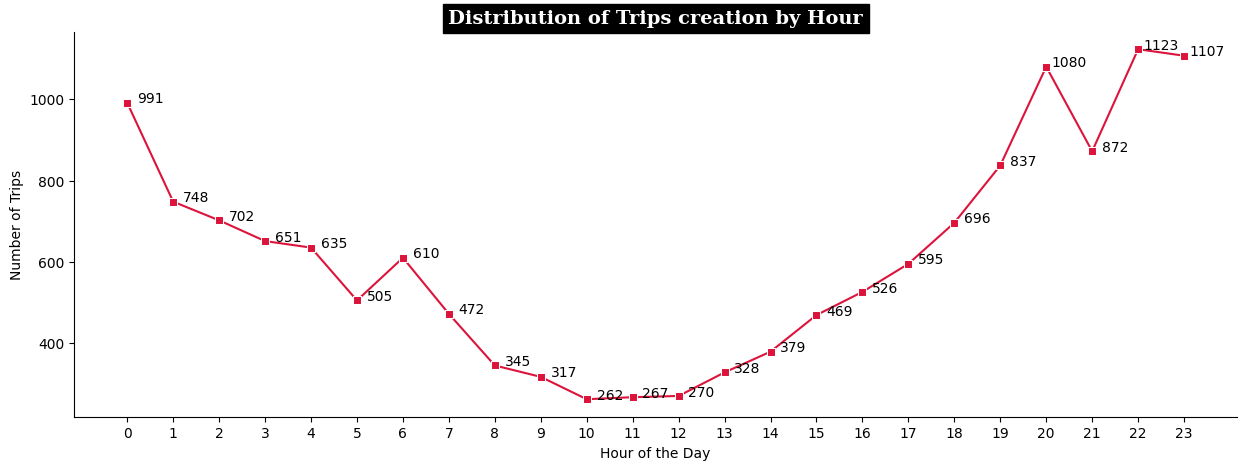

In [86]:
trip_creation_by_hour = trip_df.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s', color='crimson')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
    plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

In [87]:
trip_df.trip_creation_year.value_counts()

trip_creation_year
2018    14787
Name: count, dtype: int64

In [88]:
trip_df.trip_creation_month.value_counts()

trip_creation_month
9     13011
10     1776
Name: count, dtype: int64

In [89]:
trip_df['trip_creation_month'].value_counts(normalize = True) * 100

trip_creation_month
9     87.98945
10    12.01055
Name: proportion, dtype: float64

In [90]:
trip_df.trip_creation_week.value_counts()

trip_creation_week
38    5001
39    4402
37    3608
40    1776
Name: count, dtype: Int64

In [91]:
trip_df.trip_creation_weekday.value_counts(ascending=True)

trip_creation_weekday
6    1753
0    1980
1    2035
4    2057
3    2103
5    2128
2    2731
Name: count, dtype: int64

In [92]:
trip_df['trip_creation_day_week'] = trip_df['trip_creation_time'].dt.day_name()

In [93]:
trip_df.trip_creation_day.value_counts()

trip_creation_day
18    791
15    783
13    750
12    747
21    740
22    740
17    722
14    712
20    703
25    695
26    683
19    674
24    658
27    650
23    631
3     627
16    616
28    605
29    605
1     600
2     549
30    506
Name: count, dtype: int64

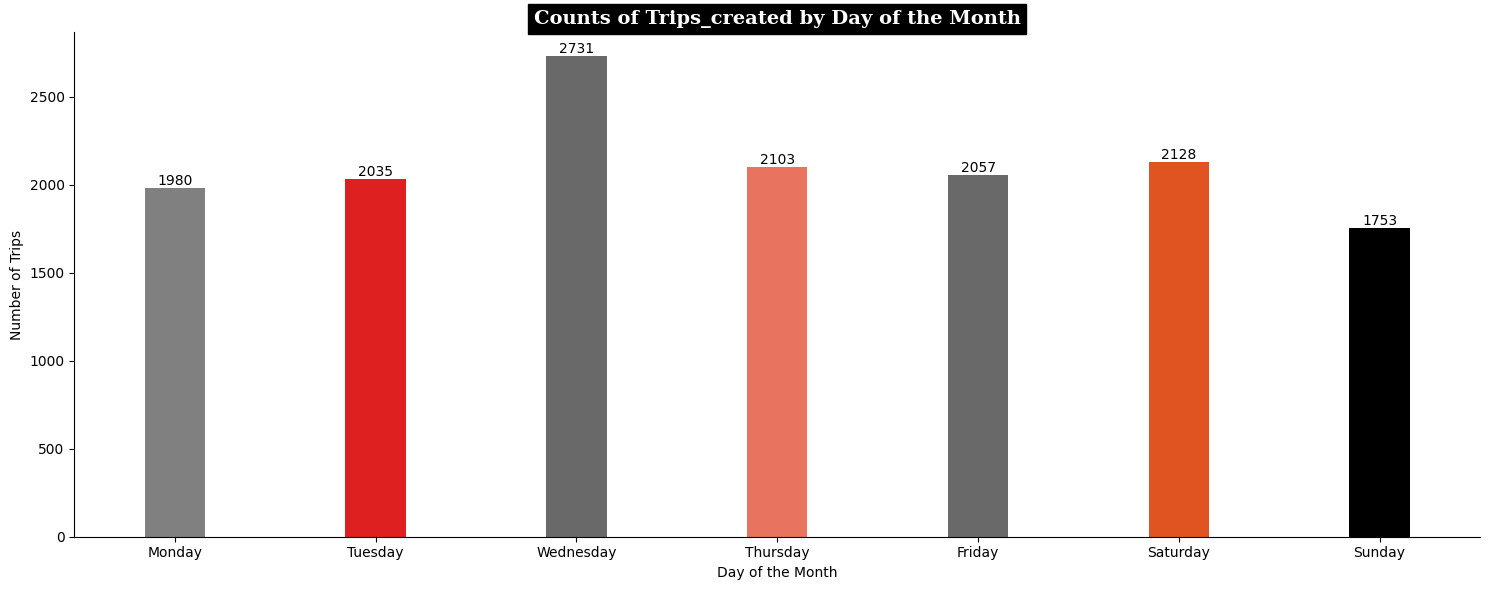

In [94]:
plt.figure(figsize=(15,6))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = trip_df['trip_creation_day_week'].value_counts().reindex(weekday_order)

sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
for i, count in enumerate(day_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Counts of Trips_created by Day of the Month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
sns.despine()
plt.show()

In [95]:
trip_df['trip_creation_dayofdate'] = trip_df['trip_creation_time'].dt.day

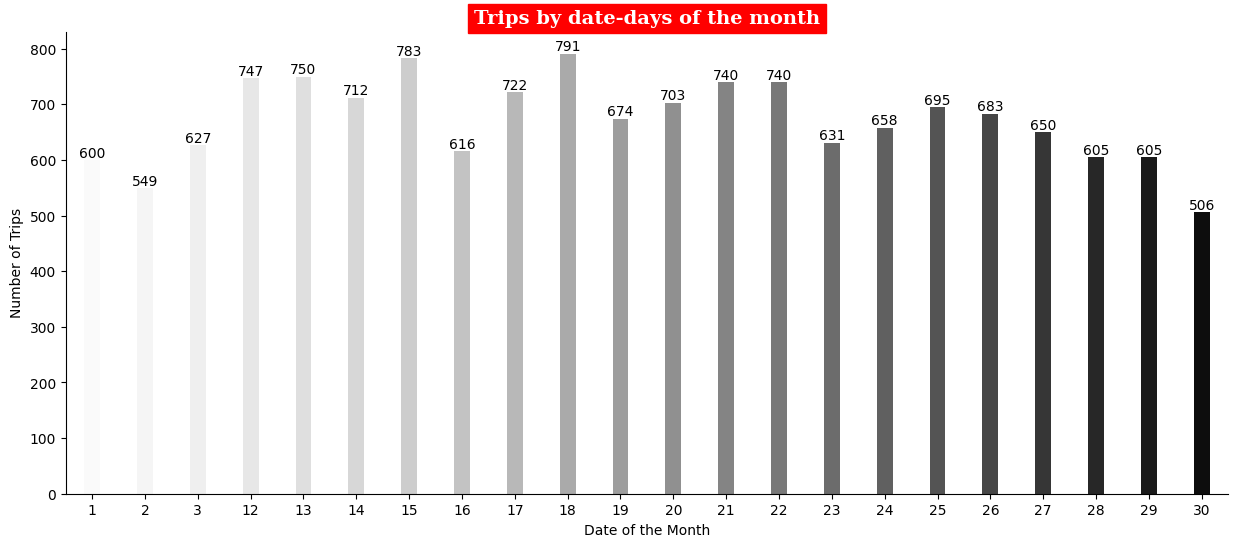

In [96]:
trips_by_dateday = trip_df.groupby(by = 'trip_creation_dayofdate')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.barplot(data =trip_df,x = trips_by_dateday['trip_creation_dayofdate'],y = trips_by_dateday['trip_uuid'], palette='Greys',width=0.3)
for i, count in enumerate(trips_by_dateday['trip_uuid']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Trips by date-days of the month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

# **Treating Outliers**

In [97]:
numerical_columns

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

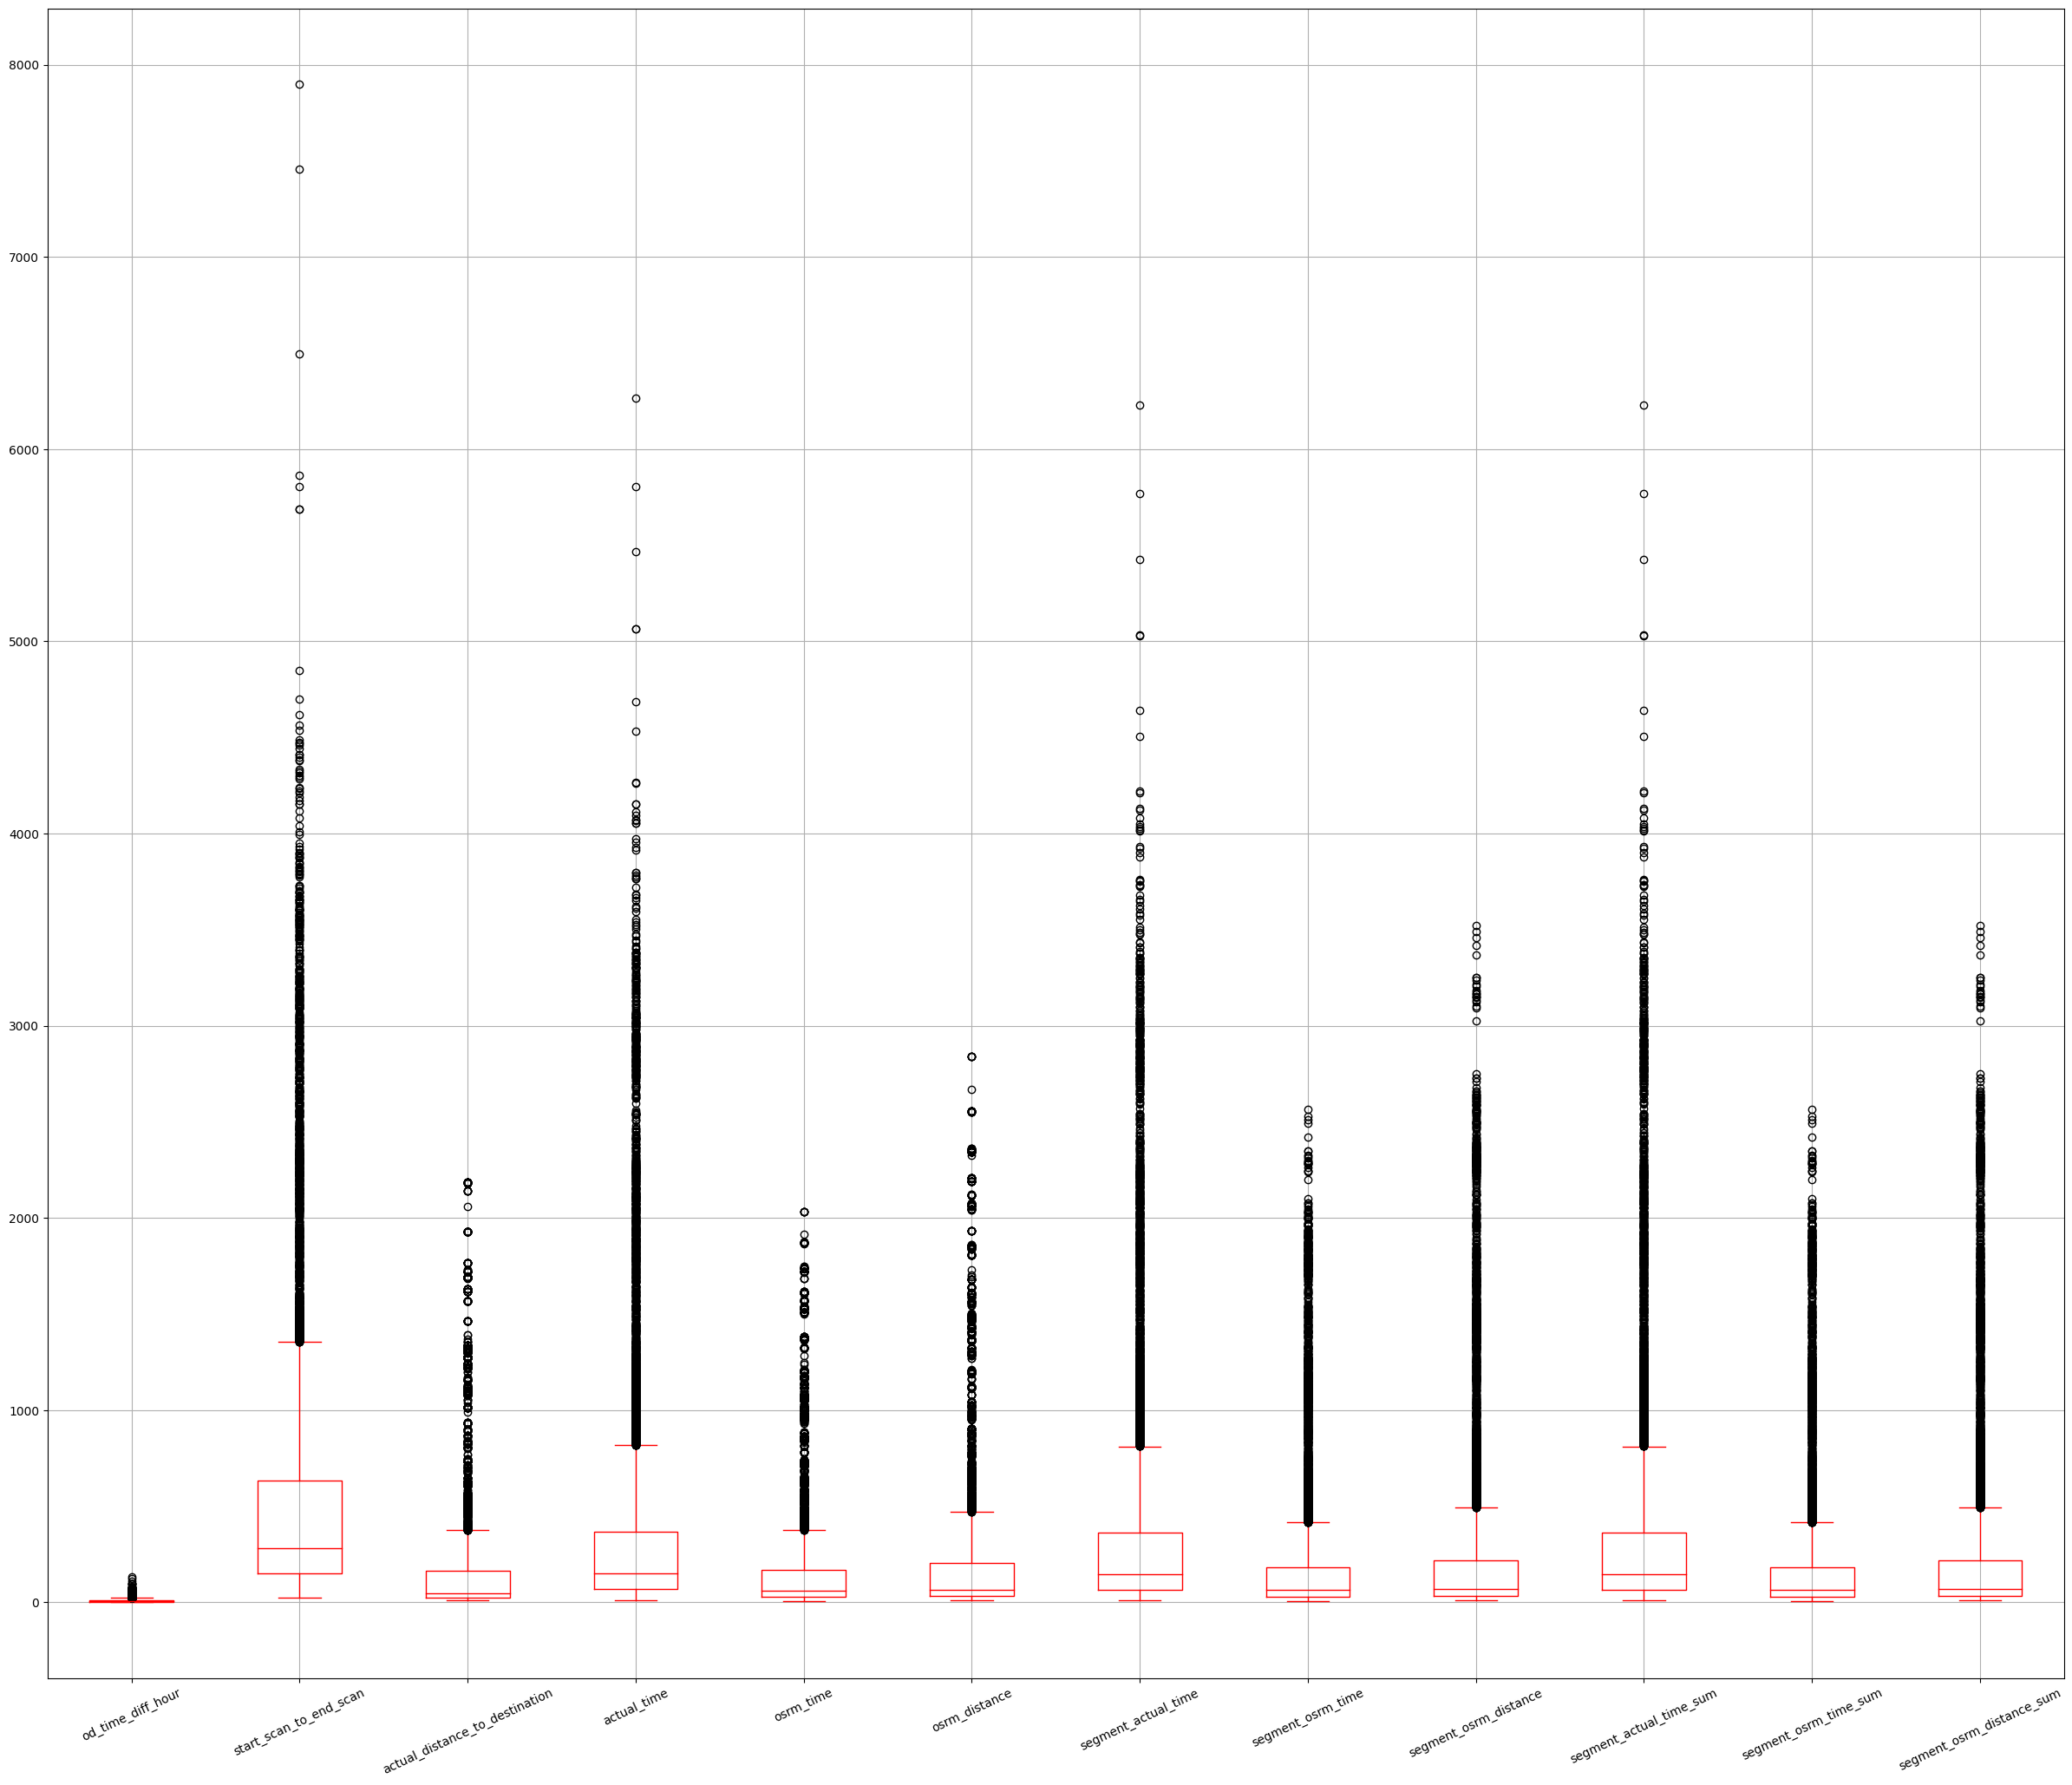

In [98]:
plt.figure(figsize=(30, 25))
numerical_columns.boxplot(rot=25, figsize=(35,20), color = 'r')
plt.grid('off')
plt.show()

In [99]:
num_cols = numerical_columns.columns.tolist()
num_cols

['od_time_diff_hour',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum']

In [100]:
# obtain the first quartile
Q1 = numerical_columns.quantile(0.25)

# obtain the third quartile
Q3 = numerical_columns.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


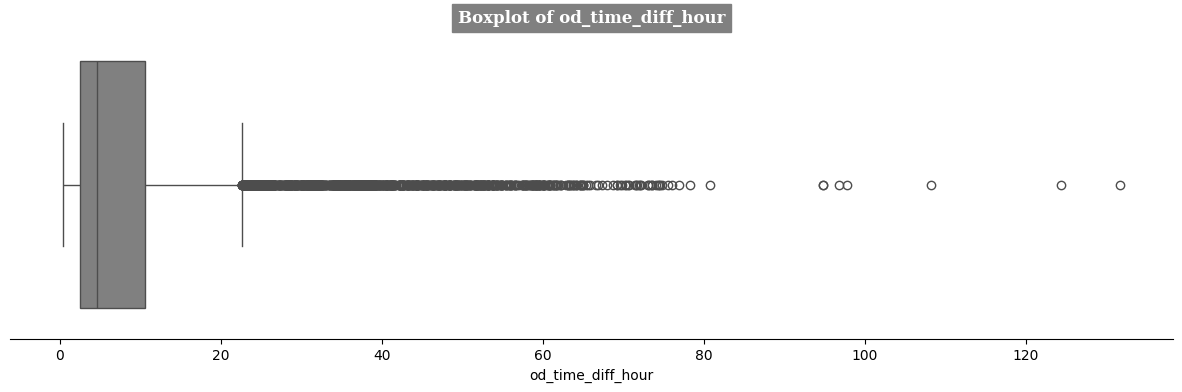

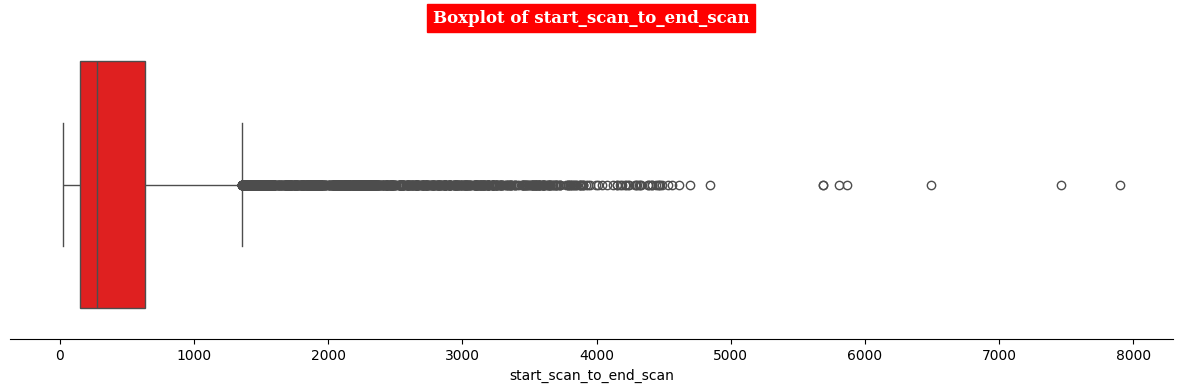

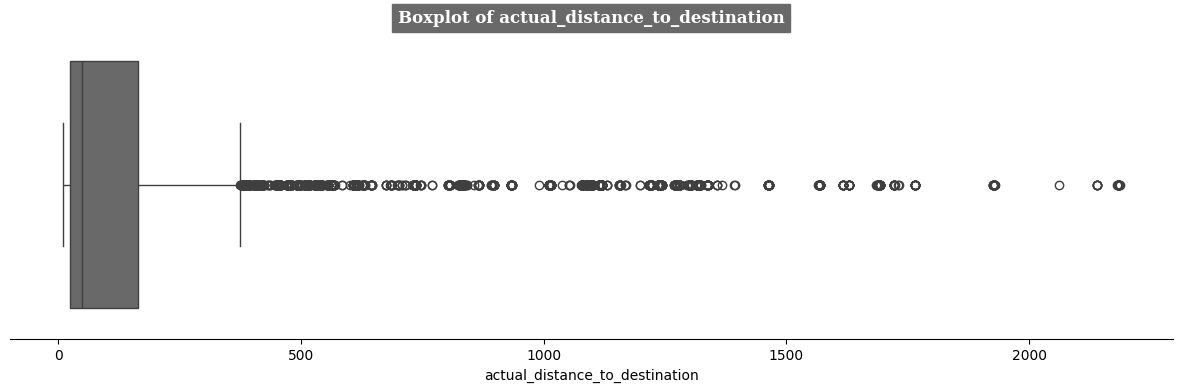

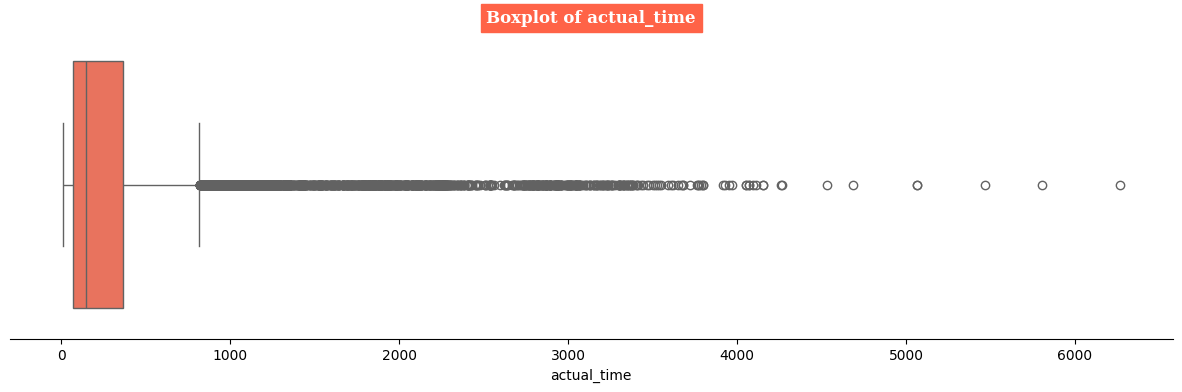

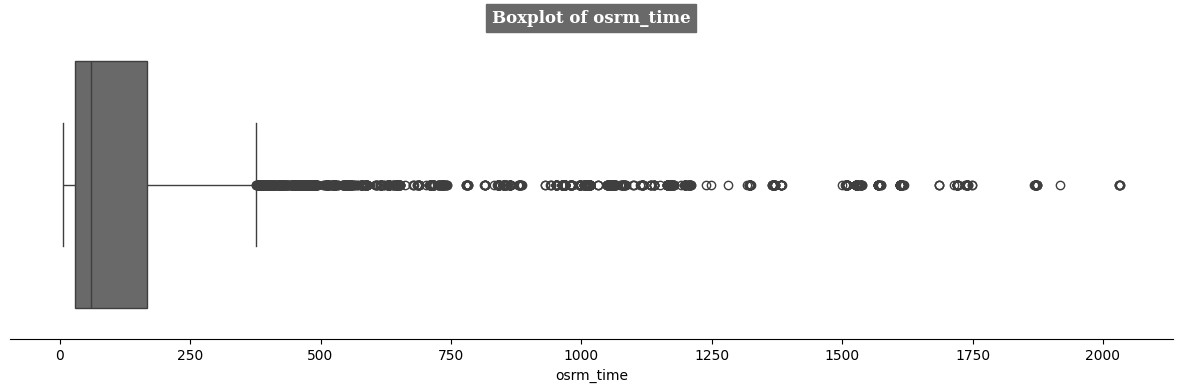

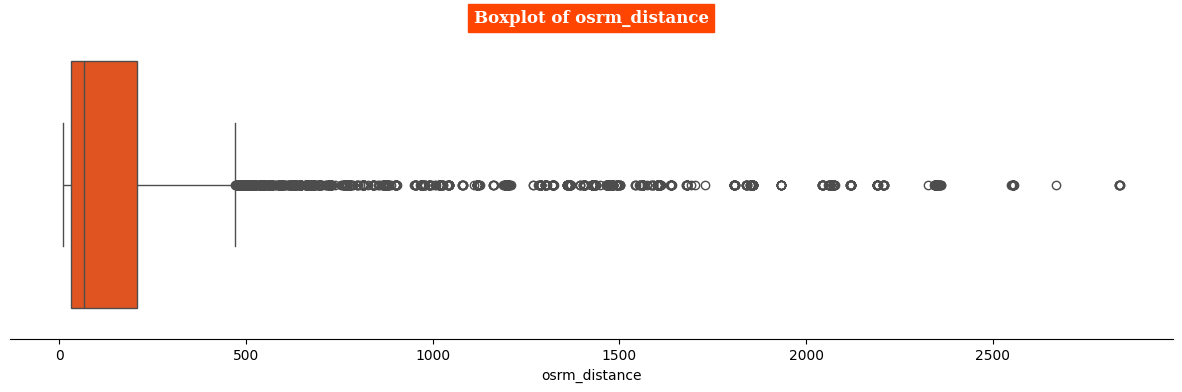

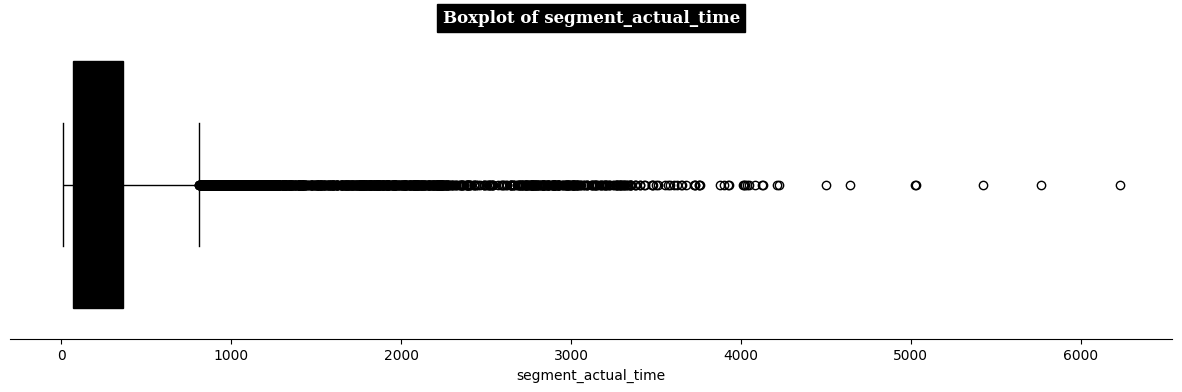

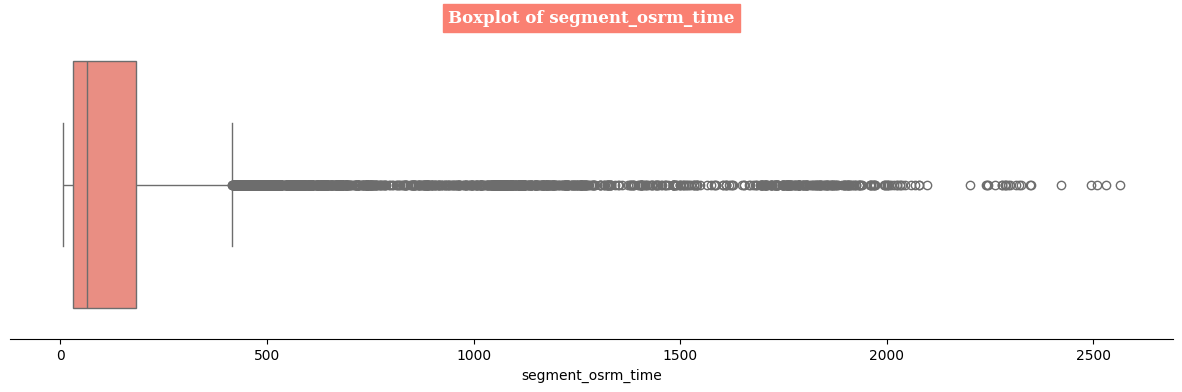

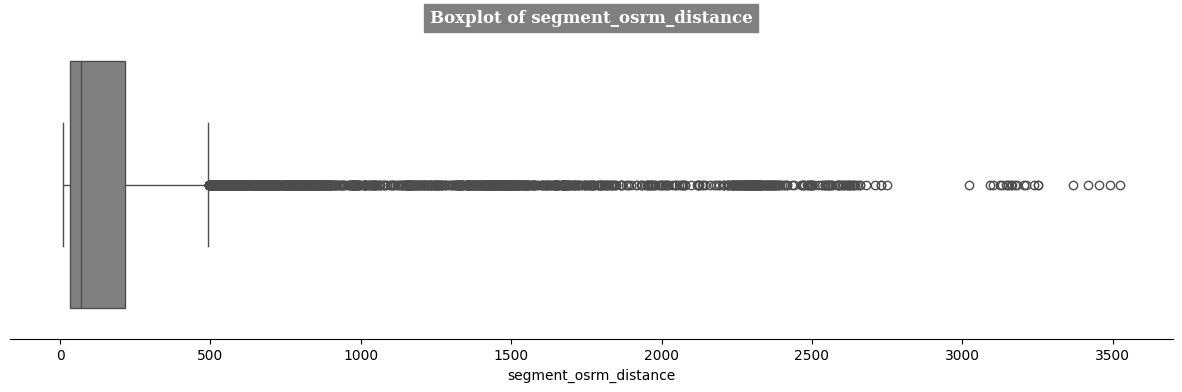

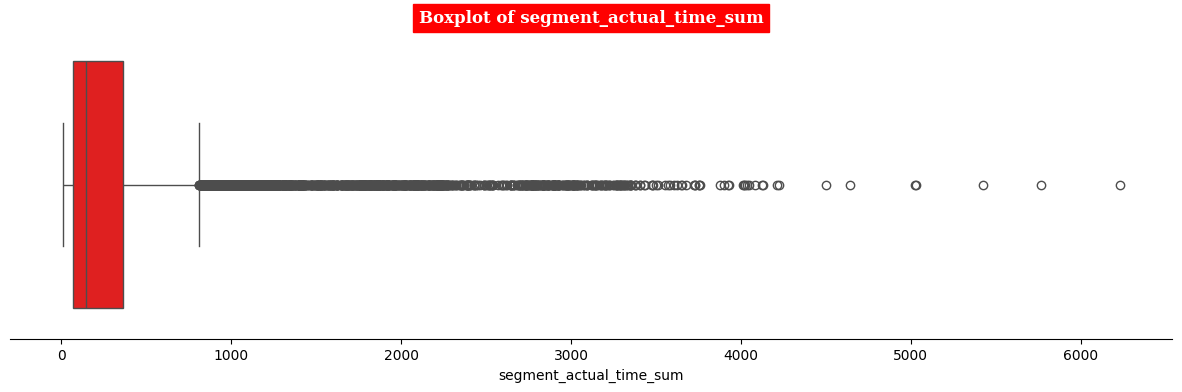

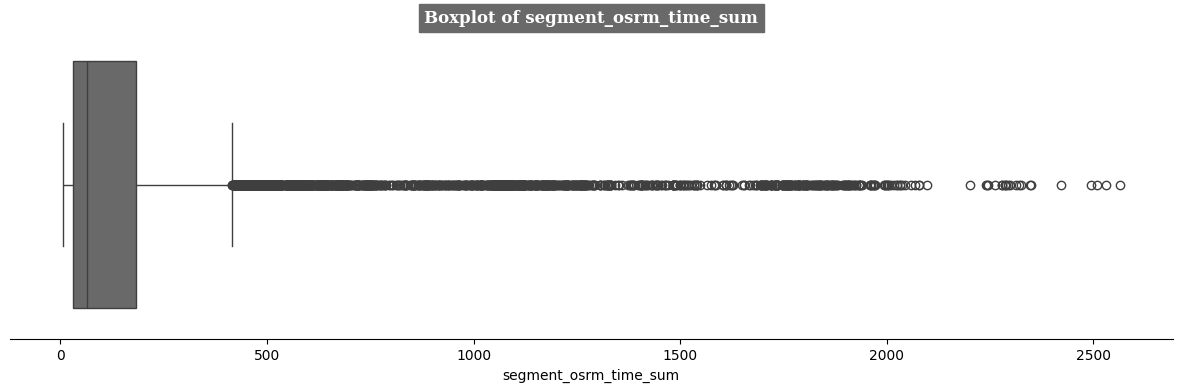

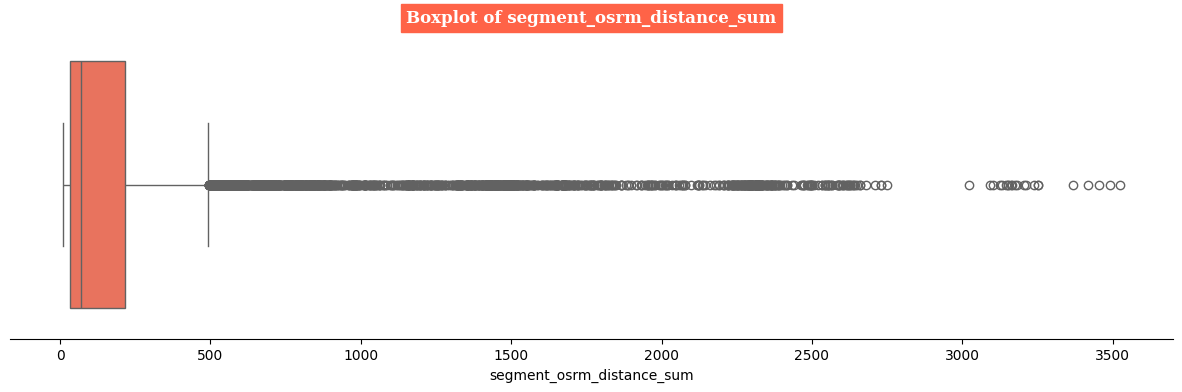

In [101]:
for i,col in enumerate(numerical_columns):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=col, data=numerical_columns,color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of {col}',fontfamily='serif',fontweight='bold',fontsize=12,backgroundcolor=cp[i],color='w')
    plt.show()

od_time_diff_hour
0              37.668497
1               3.026865
2              65.572709
3               1.674916
4              11.972484
...                  ...
14782           4.300482
14783           1.009842
14784           7.035331
14785           5.808548
14786           5.906793

[14787 rows x 1 columns]

Clipped data of od_time_diff_hour


od_time_diff_hour
0              22.654942
1               3.026865
2              22.654942
3               1.674916
4              11.972484
...                  ...
14782           4.300482
14783           1.009842
14784           7.035331
14785           5.808548
14786           5.906793

[14787 rows x 1 columns]


Filtered data of od_time_diff_hour


od_time_diff_hour
0              37.668497
1               3.026865
2              65.572709
3               1.674916
4              11.972484
...                  ...
14782           4.300482
14783           1.009842
14784           7.035331
14785           5.808548
14786           5.906793

[14787 rows x 1 columns]

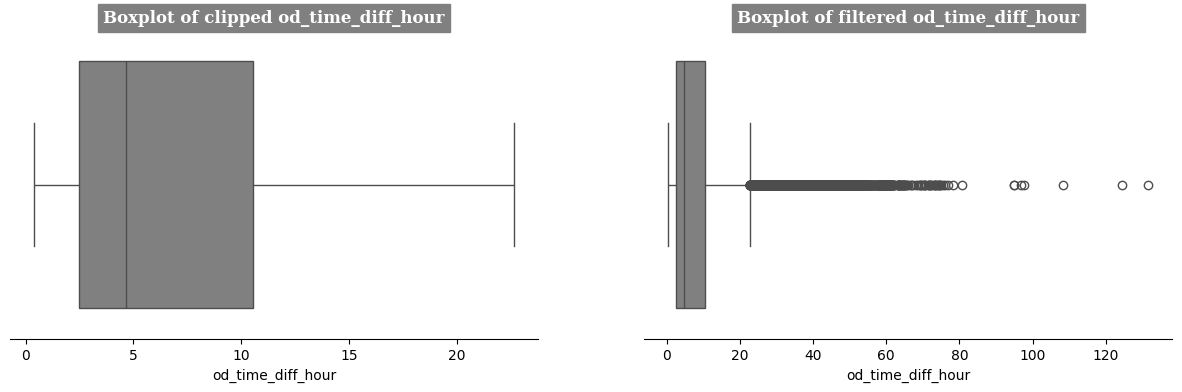

start_scan_to_end_scan
0                      2259.0
1                       180.0
2                      3933.0
3                       100.0
4                       717.0
...                       ...
14782                   257.0
14783                    60.0
14784                   421.0
14785                   347.0
14786                   353.0

[14787 rows x 1 columns]

Clipped data of start_scan_to_end_scan


start_scan_to_end_scan
0                      1356.5
1                       180.0
2                      1356.5
3                       100.0
4                       717.0
...                       ...
14782                   257.0
14783                    60.0
14784                   421.0
14785                   347.0
14786                   353.0

[14787 rows x 1 columns]


Filtered data of start_scan_to_end_scan


start_scan_to_end_scan
0                      2259.0
1                       180.0
2                      3933.0
3                       100.0
4                       717.0
...                       ...
14782                   257.0
14783                    60.0
14784                   421.0
14785                   347.0
14786                   353.0

[14787 rows x 1 columns]

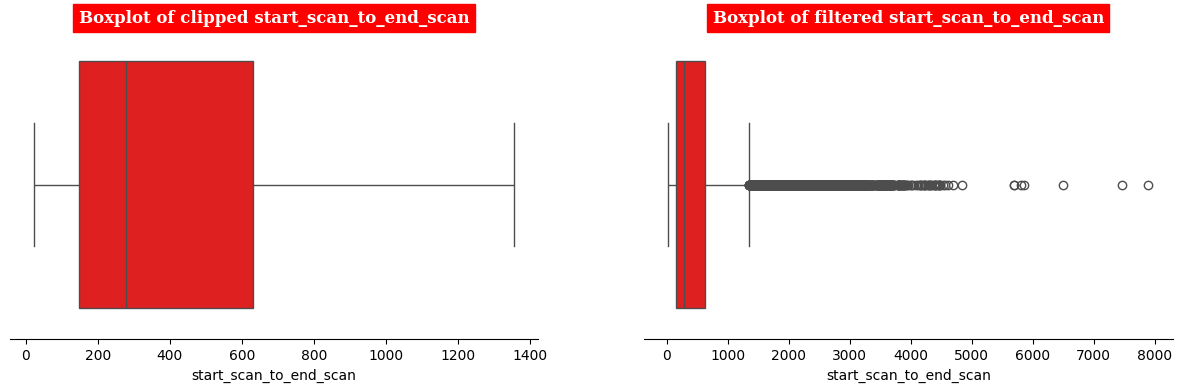

actual_distance_to_destination
0                          824.732854
1                           73.186911
2                         1927.404273
3                           17.175274
4                          127.448500
...                               ...
14782                       57.762332
14783                       15.513784
14784                       38.684839
14785                      134.723836
14786                       66.081533

[14787 rows x 1 columns]

Clipped data of actual_distance_to_destination


actual_distance_to_destination
0                          374.812497
1                           73.186911
2                          374.812497
3                           17.175274
4                          127.448500
...                               ...
14782                       57.762332
14783                       15.513784
14784                       38.684839
14785                      134.723836
14786                       66.081533

[14787 rows x 1 columns]


Filtered data of actual_distance_to_destination


actual_distance_to_destination
0                          824.732854
1                           73.186911
2                         1927.404273
3                           17.175274
4                          127.448500
...                               ...
14782                       57.762332
14783                       15.513784
14784                       38.684839
14785                      134.723836
14786                       66.081533

[14787 rows x 1 columns]

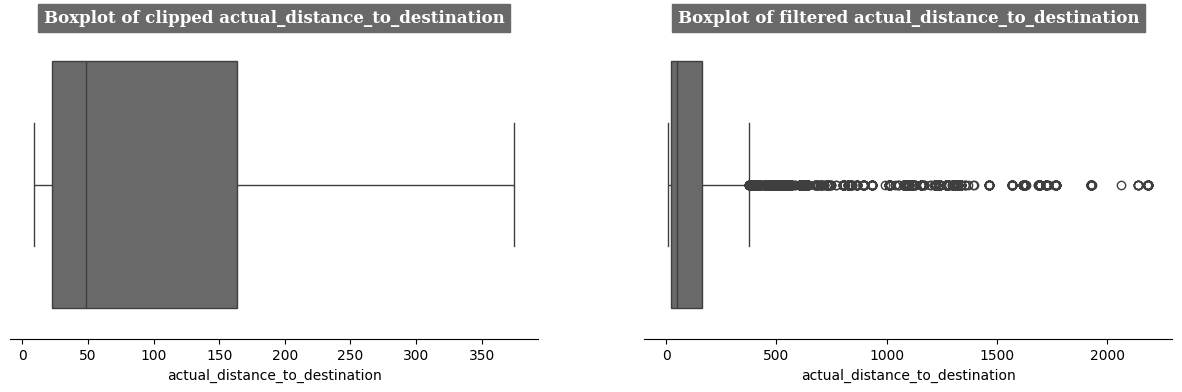

actual_time
0           1562.0
1            143.0
2           3347.0
3             59.0
4            341.0
...            ...
14782         83.0
14783         21.0
14784        282.0
14785        264.0
14786        275.0

[14787 rows x 1 columns]

Clipped data of actual_time


actual_time
0            817.0
1            143.0
2            817.0
3             59.0
4            341.0
...            ...
14782         83.0
14783         21.0
14784        282.0
14785        264.0
14786        275.0

[14787 rows x 1 columns]


Filtered data of actual_time


actual_time
0           1562.0
1            143.0
2           3347.0
3             59.0
4            341.0
...            ...
14782         83.0
14783         21.0
14784        282.0
14785        264.0
14786        275.0

[14787 rows x 1 columns]

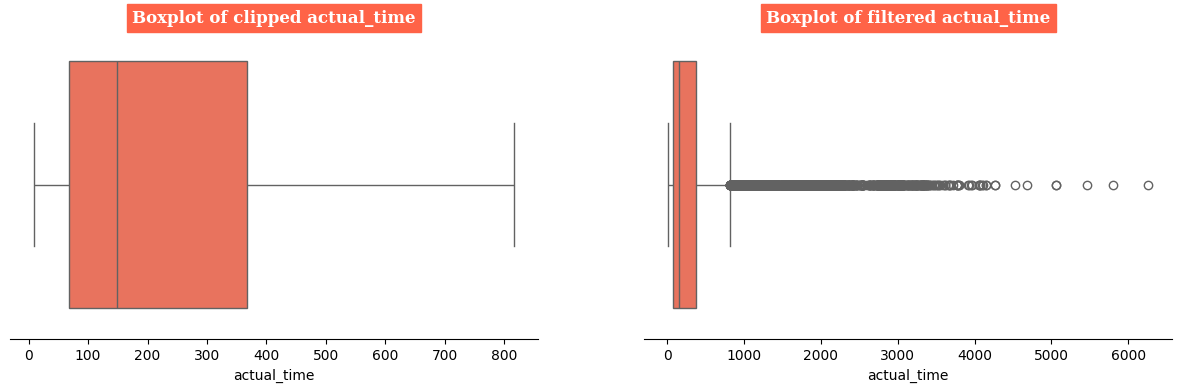

osrm_time
0          717.0
1           68.0
2         1740.0
3           15.0
4          117.0
...          ...
14782       62.0
14783       12.0
14784       48.0
14785      179.0
14786       68.0

[14787 rows x 1 columns]

Clipped data of osrm_time


osrm_time
0          376.5
1           68.0
2          376.5
3           15.0
4          117.0
...          ...
14782       62.0
14783       12.0
14784       48.0
14785      179.0
14786       68.0

[14787 rows x 1 columns]


Filtered data of osrm_time


osrm_time
0          717.0
1           68.0
2         1740.0
3           15.0
4          117.0
...          ...
14782       62.0
14783       12.0
14784       48.0
14785      179.0
14786       68.0

[14787 rows x 1 columns]

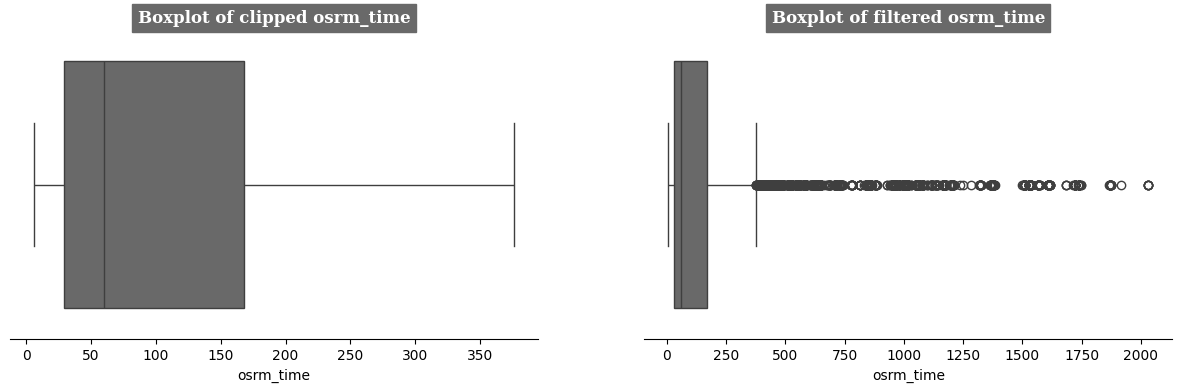

osrm_distance
0           991.3523
1            85.1110
2          2354.0665
3            19.6800
4           146.7918
...              ...
14782        73.4630
14783        16.0882
14784        58.9037
14785       171.1103
14786        80.5787

[14787 rows x 1 columns]

Clipped data of osrm_distance


osrm_distance
0          470.47515
1           85.11100
2          470.47515
3           19.68000
4          146.79180
...              ...
14782       73.46300
14783       16.08820
14784       58.90370
14785      171.11030
14786       80.57870

[14787 rows x 1 columns]


Filtered data of osrm_distance


osrm_distance
0           991.3523
1            85.1110
2          2354.0665
3            19.6800
4           146.7918
...              ...
14782        73.4630
14783        16.0882
14784        58.9037
14785       171.1103
14786        80.5787

[14787 rows x 1 columns]

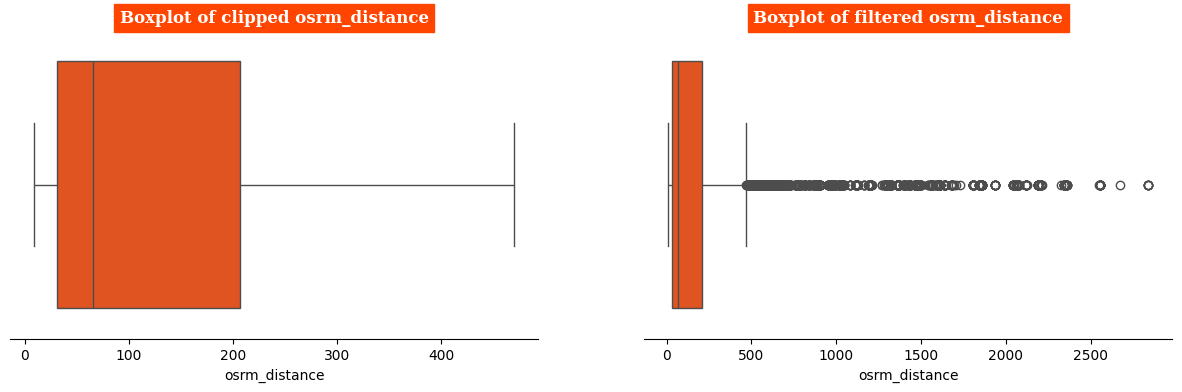

segment_actual_time
0                   1548.0
1                    141.0
2                   3308.0
3                     59.0
4                    340.0
...                    ...
14782                 82.0
14783                 21.0
14784                281.0
14785                258.0
14786                274.0

[14787 rows x 1 columns]

Clipped data of segment_actual_time


segment_actual_time
0                    811.0
1                    141.0
2                    811.0
3                     59.0
4                    340.0
...                    ...
14782                 82.0
14783                 21.0
14784                281.0
14785                258.0
14786                274.0

[14787 rows x 1 columns]


Filtered data of segment_actual_time


segment_actual_time
0                   1548.0
1                    141.0
2                   3308.0
3                     59.0
4                    340.0
...                    ...
14782                 82.0
14783                 21.0
14784                281.0
14785                258.0
14786                274.0

[14787 rows x 1 columns]

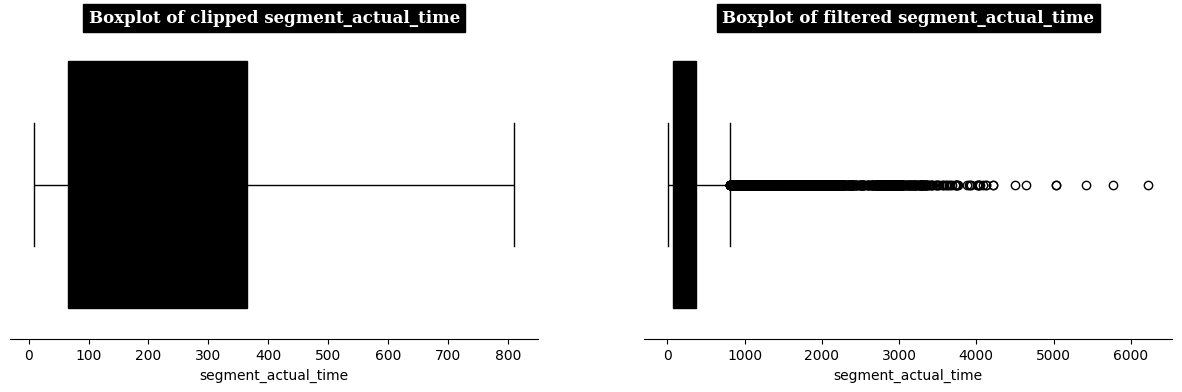

segment_osrm_time
0                 1008.0
1                   65.0
2                 1941.0
3                   16.0
4                  115.0
...                  ...
14782               62.0
14783               11.0
14784               88.0
14785              221.0
14786               67.0

[14787 rows x 1 columns]

Clipped data of segment_osrm_time


segment_osrm_time
0                  415.0
1                   65.0
2                  415.0
3                   16.0
4                  115.0
...                  ...
14782               62.0
14783               11.0
14784               88.0
14785              221.0
14786               67.0

[14787 rows x 1 columns]


Filtered data of segment_osrm_time


segment_osrm_time
0                 1008.0
1                   65.0
2                 1941.0
3                   16.0
4                  115.0
...                  ...
14782               62.0
14783               11.0
14784               88.0
14785              221.0
14786               67.0

[14787 rows x 1 columns]

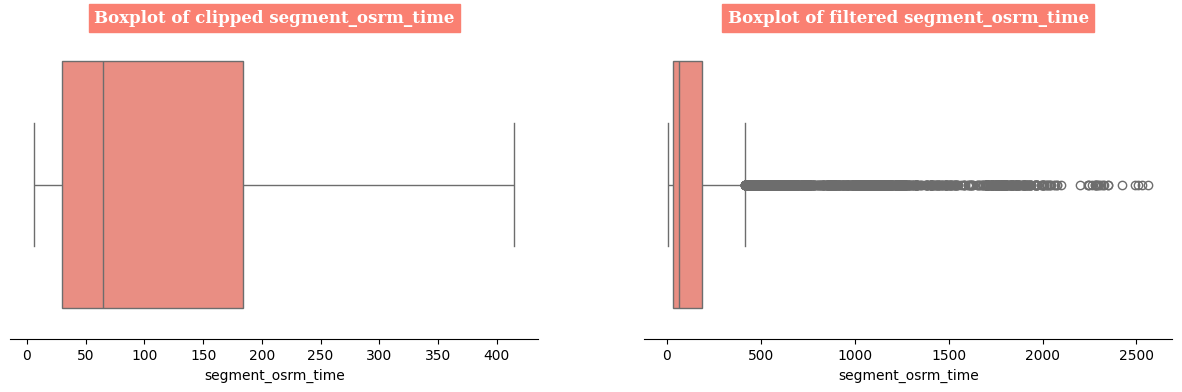

segment_osrm_distance
0                  1320.4733
1                    84.1894
2                  2545.2678
3                    19.8766
4                   146.7919
...                      ...
14782                64.8551
14783                16.0883
14784               104.8866
14785               223.5324
14786                80.5787

[14787 rows x 1 columns]

Clipped data of segment_osrm_distance


segment_osrm_distance
0                 492.533225
1                  84.189400
2                 492.533225
3                  19.876600
4                 146.791900
...                      ...
14782              64.855100
14783              16.088300
14784             104.886600
14785             223.532400
14786              80.578700

[14787 rows x 1 columns]


Filtered data of segment_osrm_distance


segment_osrm_distance
0                  1320.4733
1                    84.1894
2                  2545.2678
3                    19.8766
4                   146.7919
...                      ...
14782                64.8551
14783                16.0883
14784               104.8866
14785               223.5324
14786                80.5787

[14787 rows x 1 columns]

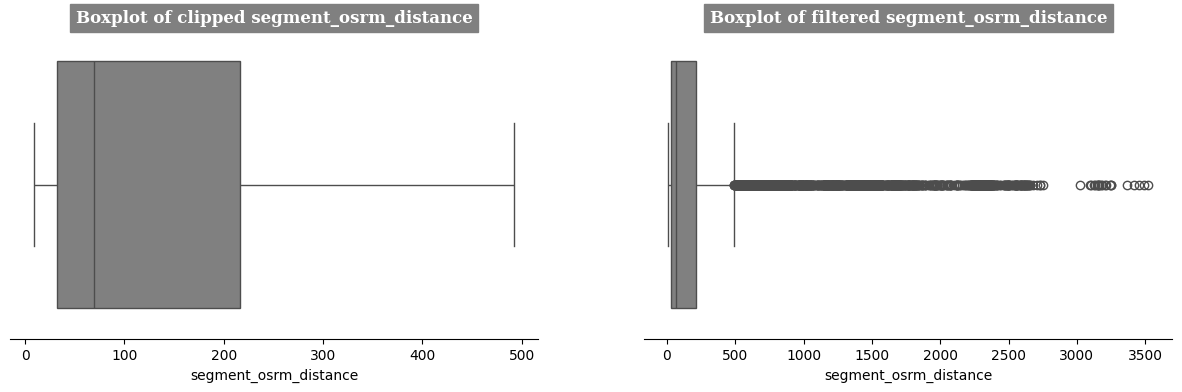

segment_actual_time_sum
0                       1548.0
1                        141.0
2                       3308.0
3                         59.0
4                        340.0
...                        ...
14782                     82.0
14783                     21.0
14784                    281.0
14785                    258.0
14786                    274.0

[14787 rows x 1 columns]

Clipped data of segment_actual_time_sum


segment_actual_time_sum
0                        811.0
1                        141.0
2                        811.0
3                         59.0
4                        340.0
...                        ...
14782                     82.0
14783                     21.0
14784                    281.0
14785                    258.0
14786                    274.0

[14787 rows x 1 columns]


Filtered data of segment_actual_time_sum


segment_actual_time_sum
0                       1548.0
1                        141.0
2                       3308.0
3                         59.0
4                        340.0
...                        ...
14782                     82.0
14783                     21.0
14784                    281.0
14785                    258.0
14786                    274.0

[14787 rows x 1 columns]

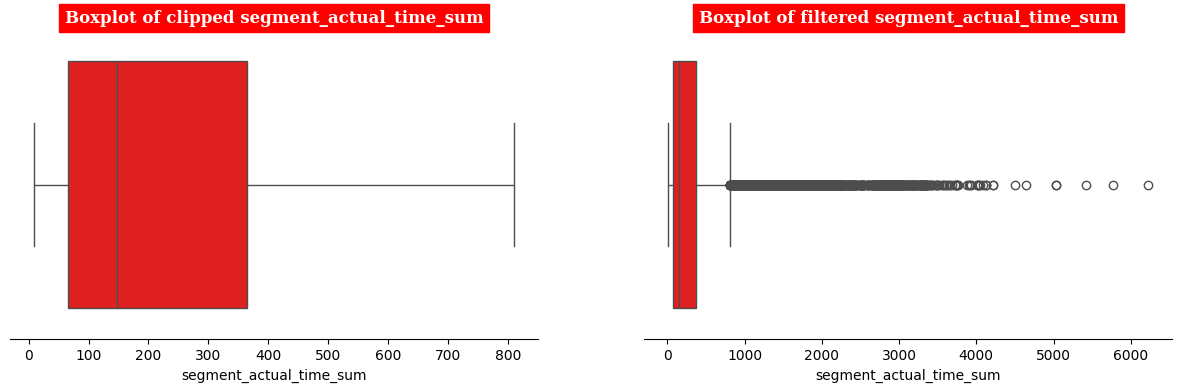

segment_osrm_time_sum
0                     1008.0
1                       65.0
2                     1941.0
3                       16.0
4                      115.0
...                      ...
14782                   62.0
14783                   11.0
14784                   88.0
14785                  221.0
14786                   67.0

[14787 rows x 1 columns]

Clipped data of segment_osrm_time_sum


segment_osrm_time_sum
0                      415.0
1                       65.0
2                      415.0
3                       16.0
4                      115.0
...                      ...
14782                   62.0
14783                   11.0
14784                   88.0
14785                  221.0
14786                   67.0

[14787 rows x 1 columns]


Filtered data of segment_osrm_time_sum


segment_osrm_time_sum
0                     1008.0
1                       65.0
2                     1941.0
3                       16.0
4                      115.0
...                      ...
14782                   62.0
14783                   11.0
14784                   88.0
14785                  221.0
14786                   67.0

[14787 rows x 1 columns]

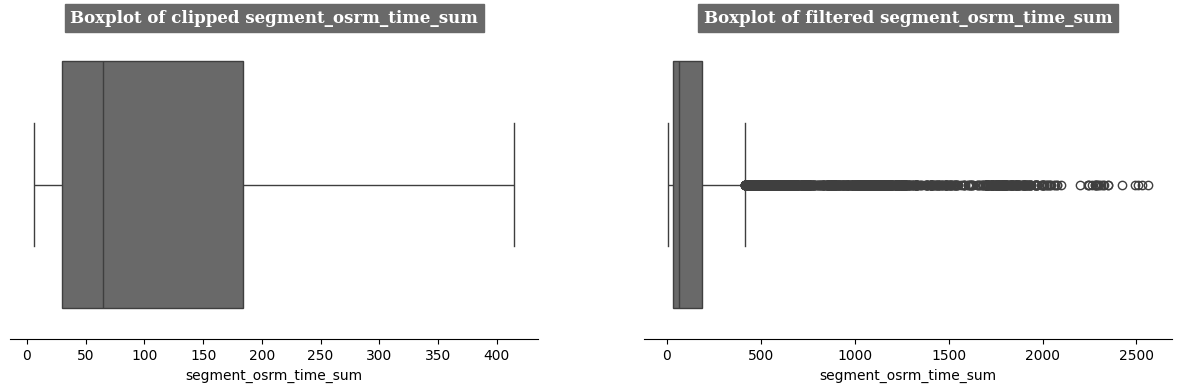

segment_osrm_distance_sum
0                      1320.4733
1                        84.1894
2                      2545.2678
3                        19.8766
4                       146.7919
...                          ...
14782                    64.8551
14783                    16.0883
14784                   104.8866
14785                   223.5324
14786                    80.5787

[14787 rows x 1 columns]

Clipped data of segment_osrm_distance_sum


segment_osrm_distance_sum
0                     492.533225
1                      84.189400
2                     492.533225
3                      19.876600
4                     146.791900
...                          ...
14782                  64.855100
14783                  16.088300
14784                 104.886600
14785                 223.532400
14786                  80.578700

[14787 rows x 1 columns]


Filtered data of segment_osrm_distance_sum


segment_osrm_distance_sum
0                      1320.4733
1                        84.1894
2                      2545.2678
3                        19.8766
4                       146.7919
...                          ...
14782                    64.8551
14783                    16.0883
14784                   104.8866
14785                   223.5324
14786                    80.5787

[14787 rows x 1 columns]

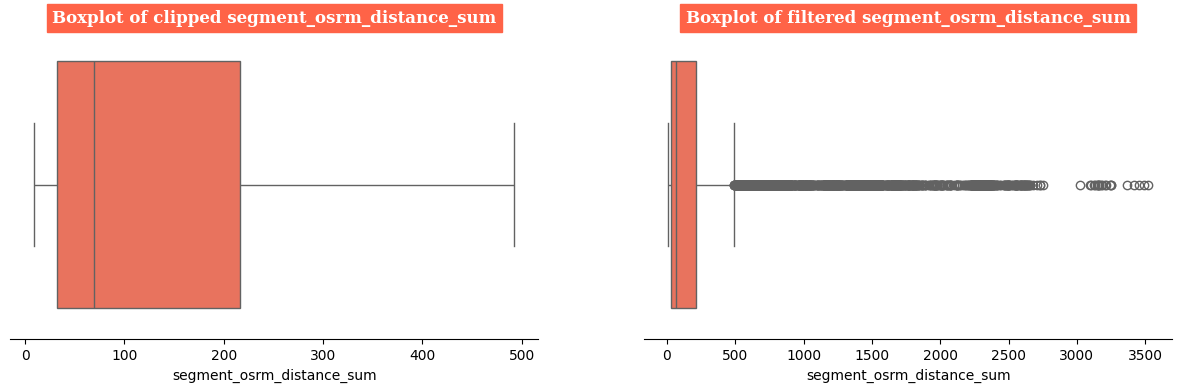

In [102]:
for i, col in enumerate(numerical_columns):

    data = trip_df[col]
    display(data.to_frame())


    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    clipped_data = np.clip(data, lower_bound, upper_bound)
    print(f'Clipped data of {col}')
    display(clipped_data.to_frame())
    print()

    # Plot boxplot of the clipped data
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.boxplot(x=clipped_data, color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=cp[i], color='w')

    filtered_data = data.loc[(data >= lower_bound) | (data <= upper_bound)]
    print(f'Filtered data of {col}')
    display(filtered_data.to_frame())
    print()

    plt.subplot(122)
    sns.boxplot(x=filtered_data, color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=cp[i], color='w')

    plt.show()

**Insights:**

In this analysis, we observe that even after removing outliers, some data points still qualify as outliers. It’s important to note that Q1 and Q3 do not necessarily correspond to the 25th and 75th percentiles, respectively. Consider adjusting Q1 and Q3 to the 10th and 90th percentiles and plotting the results.

Clipping data involves substituting outlier values with predetermined values. For this analysis, I have utilized both clipped and filtered data (with fewer outliers) for further examination.

In [103]:
num_df = numerical_columns.copy()
num_df

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

In [104]:
num_cols

['od_time_diff_hour',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum']

In [105]:
Q1 = np.percentile(num_df[num_cols], 25)
Q3 = np.percentile(num_df[num_cols], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clipped_num_df = np.clip(num_df[num_cols], lower_bound, upper_bound)
display(clipped_num_df)

filtered_num_df = num_df[num_cols][(num_df[num_cols] >= lower_bound) | (num_df[num_cols] <= upper_bound)]
display(filtered_num_df)

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497              543.285287   
1               3.026865              180.000000   
2              65.572709              543.285287   
3               1.674916              100.000000   
4              11.972484              543.285287   
...                  ...                     ...   
14782           4.300482              257.000000   
14783           1.009842               60.000000   
14784           7.035331              421.000000   
14785           5.808548              347.000000   
14786           5.906793              353.000000   

       actual_distance_to_destination  actual_time   osrm_time  osrm_distance  \
0                          543.285287   543.285287  543.285287     543.285287   
1                           73.186911   143.000000   68.000000      85.111000   
2                          543.285287   543.285287  543.285287     543.285287   
3                           17.175274    59.000000   15.000000      19.680000   
4                          127.448500   341.000000  117.000000     146.791800   
...                               ...          ...         ...            ...   
14782                       57.762332    83.000000   62.000000      73.463000   
14783                       15.513784    21.000000   12.000000      16.088200   
14784                       38.684839   282.000000   48.000000      58.903700   
14785                      134.723836   264.000000  179.000000     171.110300   
14786                       66.081533   275.000000   68.000000      80.578700   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0               543.285287         543.285287             543.285287   
1               141.000000          65.000000              84.189400   
2               543.285287         543.285287             543.285287   
3                59.000000          16.000000              19.876600   
4               340.000000         115.000000             146.791900   
...                    ...                ...                    ...   
14782            82.000000          62.000000              64.855100   
14783            21.000000          11.000000              16.088300   
14784           281.000000          88.000000             104.886600   
14785           258.000000         221.000000             223.532400   
14786           274.000000          67.000000              80.578700   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                   543.285287             543.285287   
1                   141.000000              65.000000   
2                   543.285287             543.285287   
3                    59.000000              16.000000   
4                   340.000000             115.000000   
...                        ...                    ...   
14782                82.000000              62.000000   
14783                21.000000              11.000000   
14784               281.000000              88.000000   
14785               258.000000             221.000000   
14786               274.000000              67.000000   

       segment_osrm_distance_sum  
0                     543.285287  
1                      84.189400  
2                     543.285287  
3                      19.876600  
4                     146.791900  
...                          ...  
14782                  64.855100  
14783                  16.088300  
14784                 104.886600  
14785                 223.532400  
14786                  80.578700  

[14787 rows x 12 columns]

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

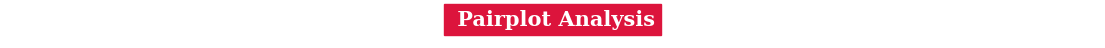

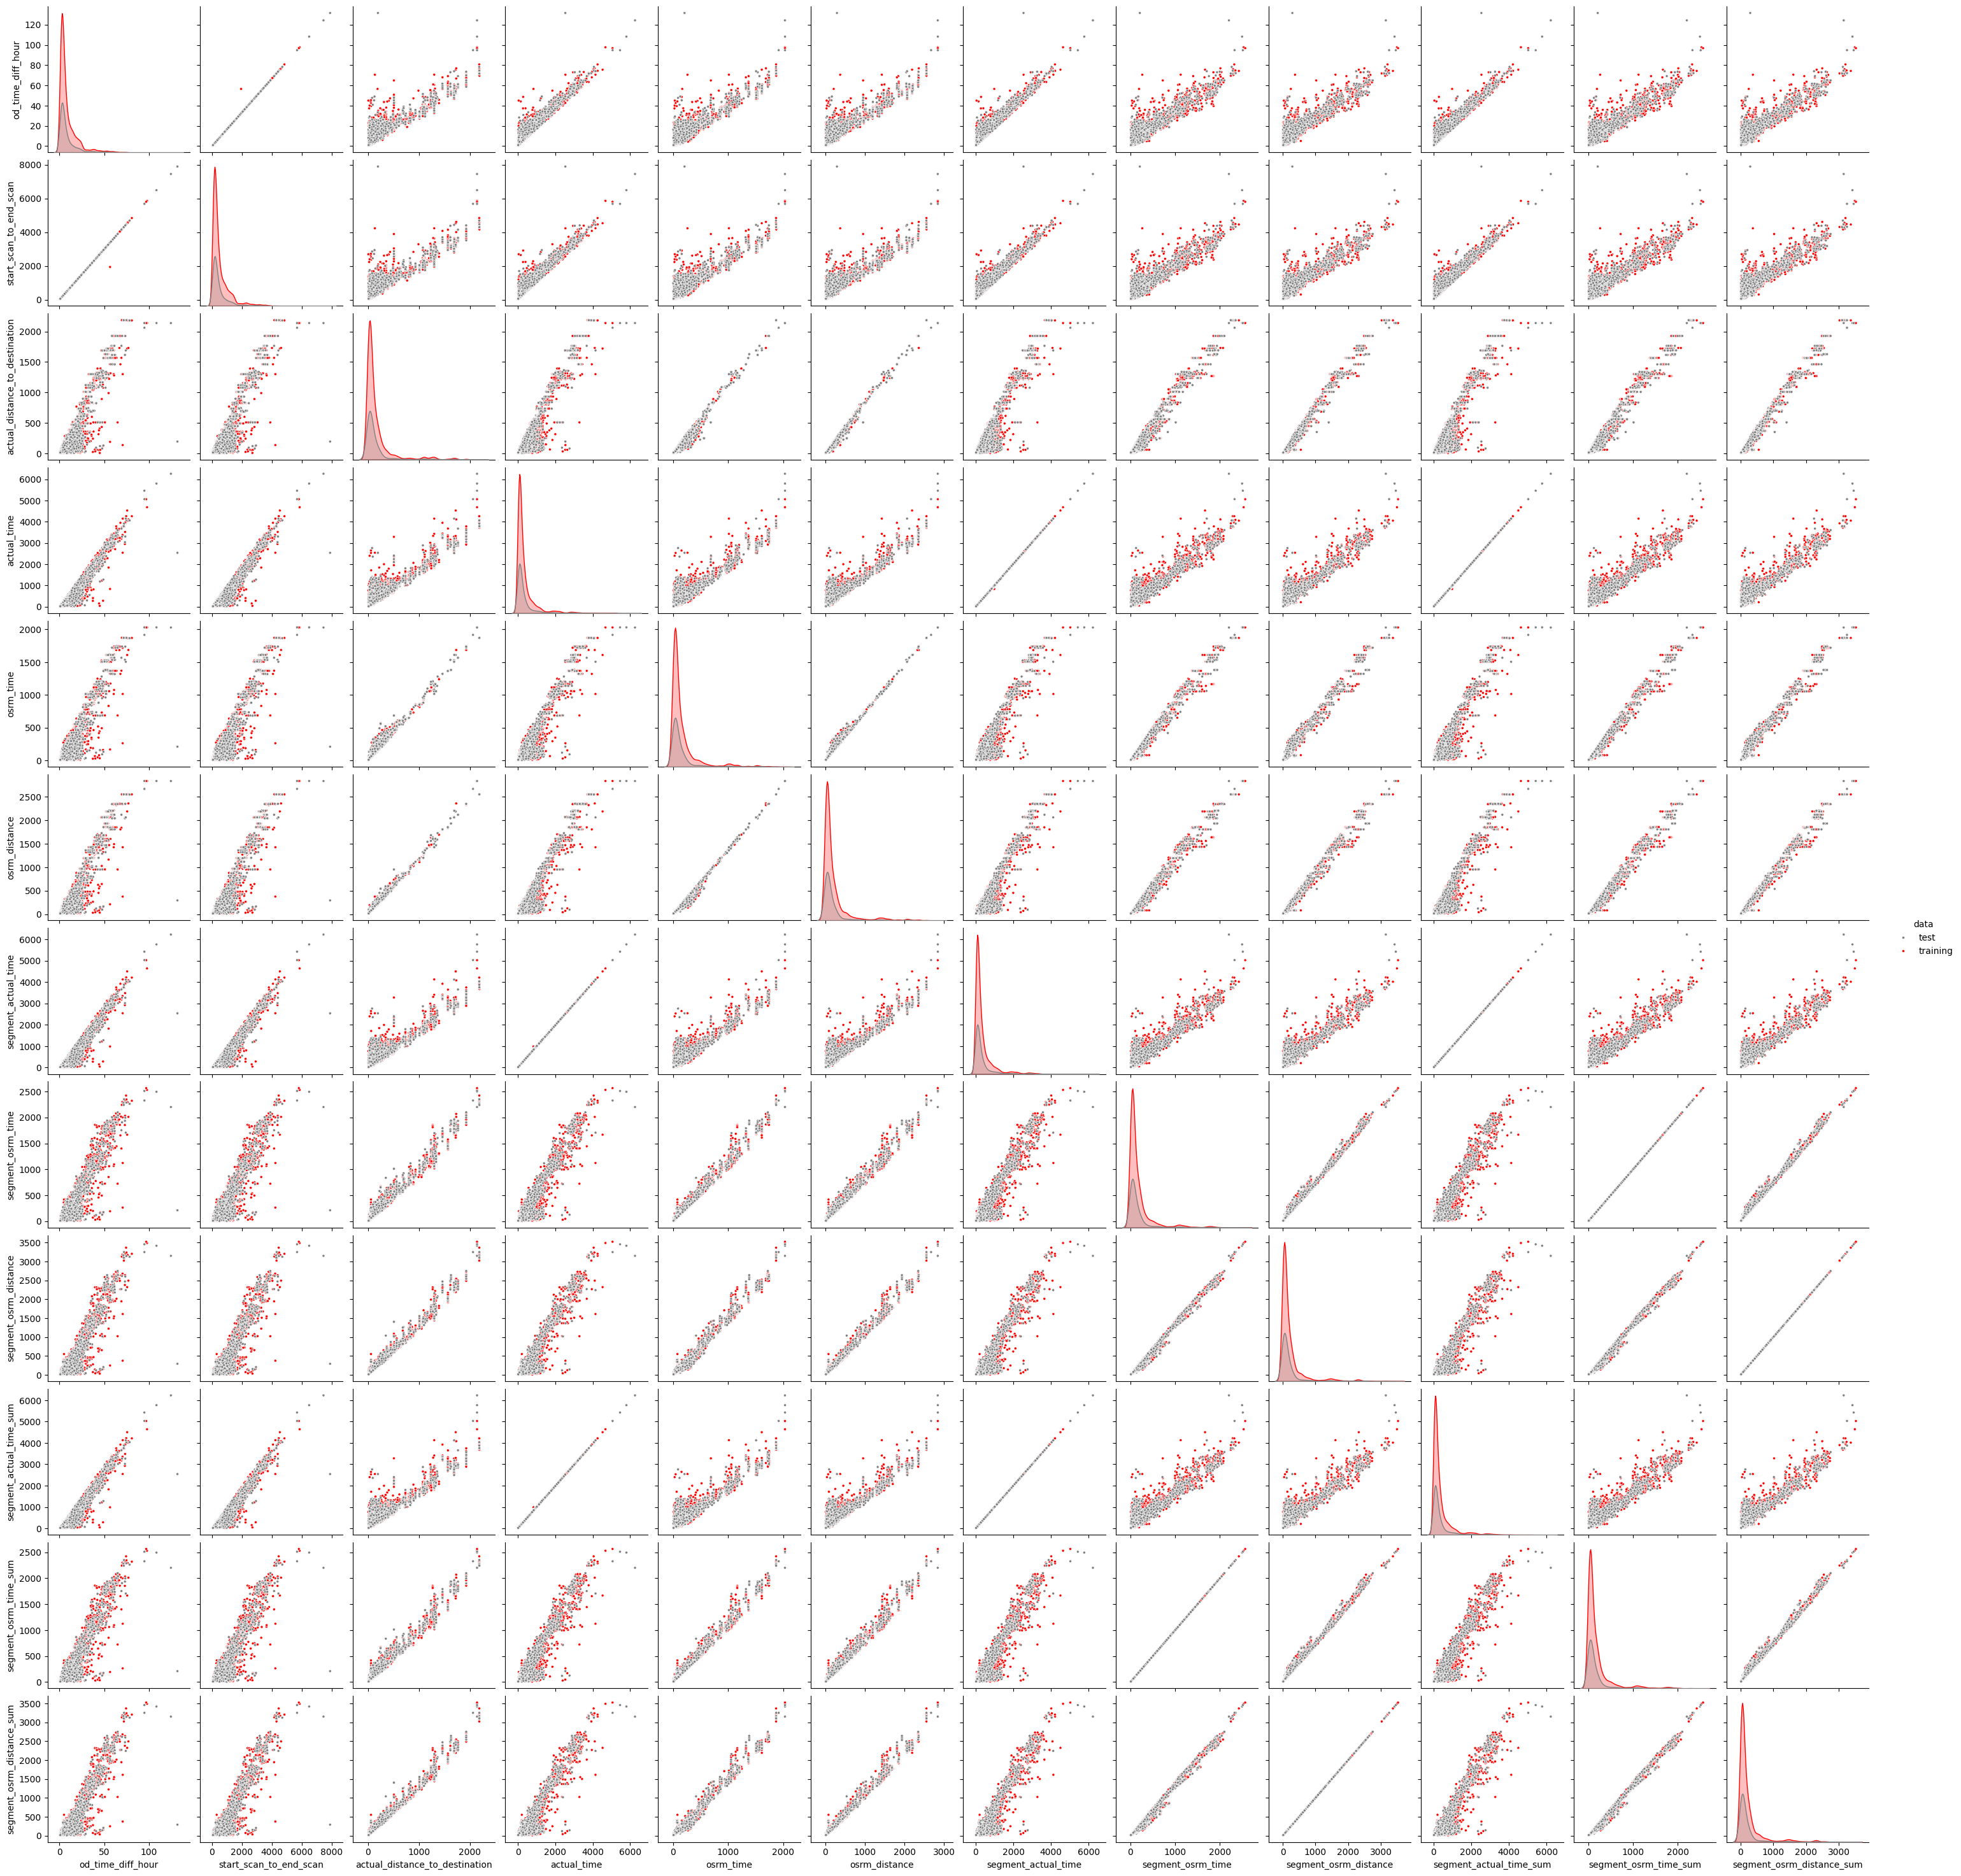

In [106]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.title(f' Pairplot Analysis',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='crimson',color='w')
sns.pairplot(data = trip_df,vars = num_cols,hue='data',markers = '.',palette=cp)
plt.show()

In [107]:
clipped_df_corr = clipped_num_df.corr()
clipped_df_corr

filtered_df_corr = filtered_num_df.corr()
filtered_df_corr

od_time_diff_hour  start_scan_to_end_scan  \
od_time_diff_hour                        1.000000                0.999837   
start_scan_to_end_scan                   0.999837                1.000000   
actual_distance_to_destination           0.918644                0.919159   
actual_time                              0.961223                0.961612   
osrm_time                                0.926973                0.927471   
osrm_distance                            0.924683                0.925205   
segment_actual_time                      0.961288                0.961634   
segment_osrm_time                        0.918921                0.919429   
segment_osrm_distance                    0.919665                0.920191   
segment_actual_time_sum                  0.961288                0.961634   
segment_osrm_time_sum                    0.918921                0.919429   
segment_osrm_distance_sum                0.919665                0.920191   

                                actual_distance_to_destination  actual_time  \
od_time_diff_hour                                     0.918644     0.961223   
start_scan_to_end_scan                                0.919159     0.961612   
actual_distance_to_destination                        1.000000     0.953920   
actual_time                                           0.953920     1.000000   
osrm_time                                             0.993568     0.958781   
osrm_distance                                         0.997268     0.959398   
segment_actual_time                                   0.952987     0.999989   
segment_osrm_time                                     0.987542     0.954044   
segment_osrm_distance                                 0.993068     0.957151   
segment_actual_time_sum                               0.952987     0.999989   
segment_osrm_time_sum                                 0.987542     0.954044   
segment_osrm_distance_sum                             0.993068     0.957151   

                                osrm_time  osrm_distance  segment_actual_time  \
od_time_diff_hour                0.926973       0.924683             0.961288   
start_scan_to_end_scan           0.927471       0.925205             0.961634   
actual_distance_to_destination   0.993568       0.997268             0.952987   
actual_time                      0.958781       0.959398             0.999989   
osrm_time                        1.000000       0.997588             0.957955   
osrm_distance                    0.997588       1.000000             0.958540   
segment_actual_time              0.957955       0.958540             1.000000   
segment_osrm_time                0.993263       0.991802             0.953214   
segment_osrm_distance            0.991624       0.994712             0.956293   
segment_actual_time_sum          0.957955       0.958540             1.000000   
segment_osrm_time_sum            0.993263       0.991802             0.953214   
segment_osrm_distance_sum        0.991624       0.994712             0.956293   

                                segment_osrm_time  segment_osrm_distance  \
od_time_diff_hour                        0.918921               0.919665   
start_scan_to_end_scan                   0.919429               0.920191   
actual_distance_to_destination           0.987542               0.993068   
actual_time                              0.954044               0.957151   
osrm_time                                0.993263               0.991624   
osrm_distance                            0.991802               0.994712   
segment_actual_time                      0.953214               0.956293   
segment_osrm_time                        1.000000               0.996098   
segment_osrm_distance                    0.996098               1.000000   
segment_actual_time_sum                  0.953214               0.956293   
segment_osrm_time_sum                    1.000000               0.996098   
segment_osrm_distance_sum           

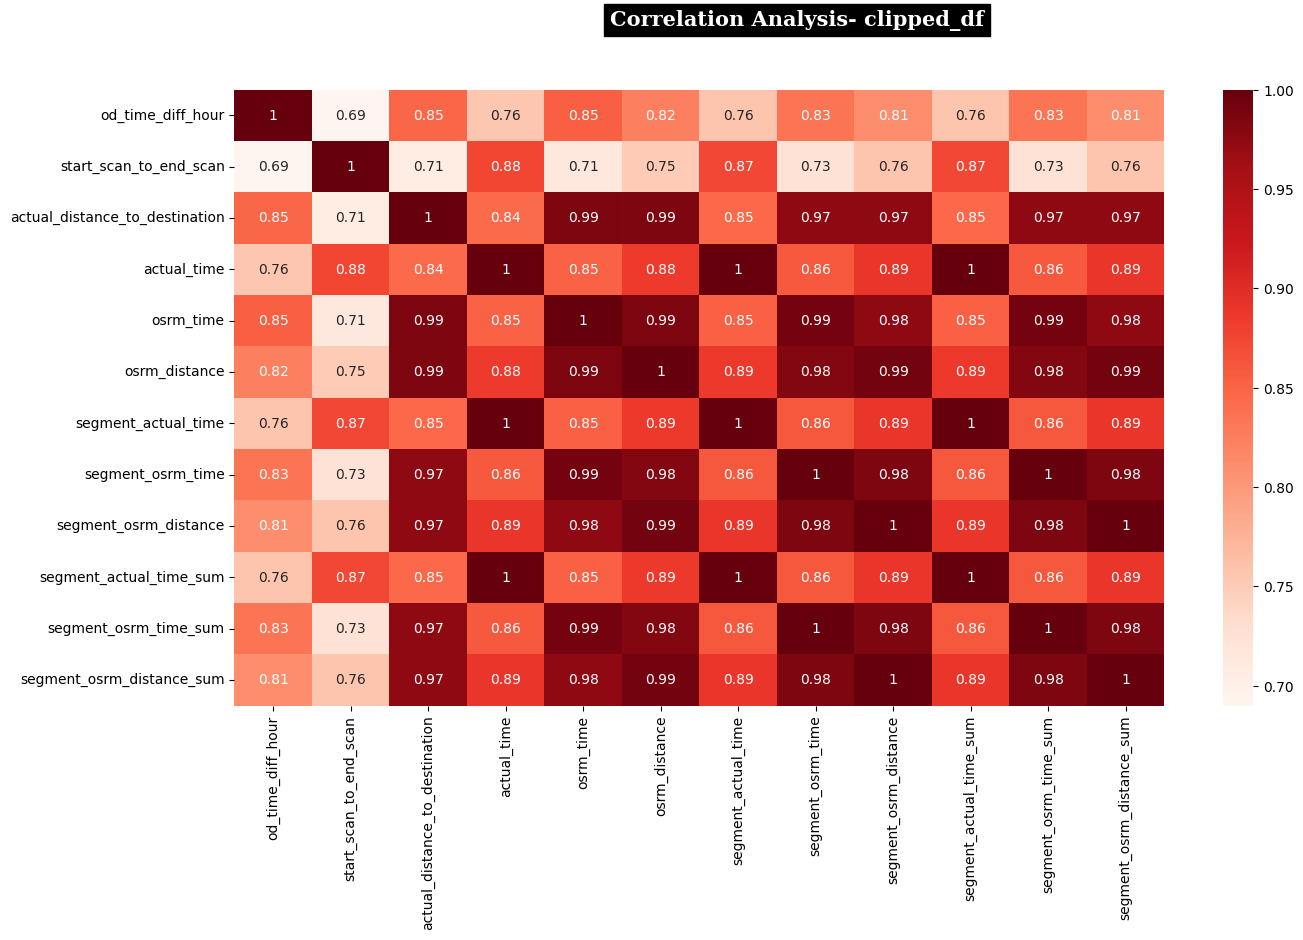

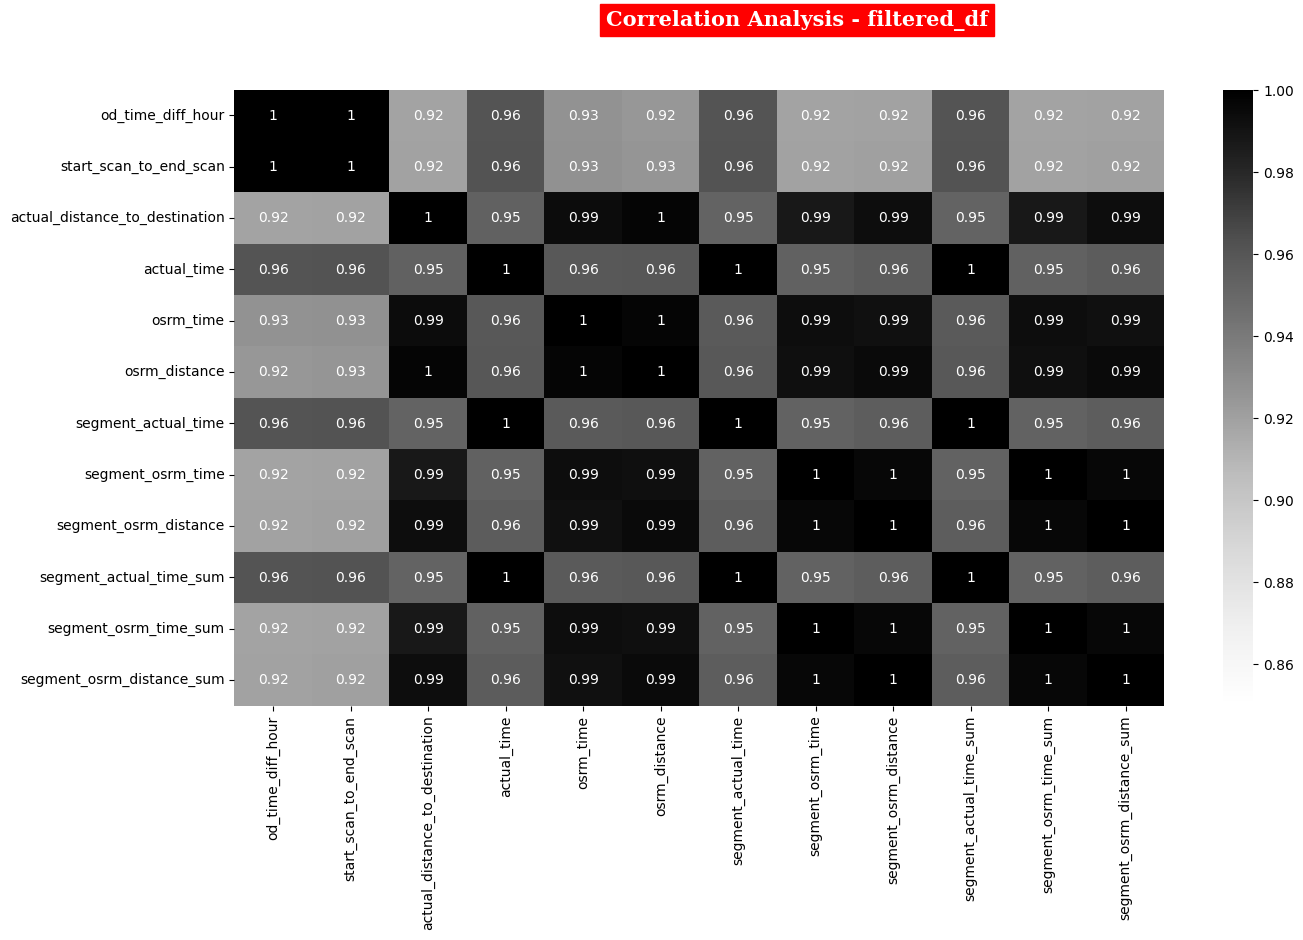

In [108]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis- clipped_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
sns.heatmap(data = clipped_df_corr,vmin=0.69, annot = True, cmap='Reds')
plt.show()

plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis - filtered_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
sns.heatmap(data = filtered_df_corr,vmin=0.85, annot = True, cmap='Greys')
plt.show()

**Insights**

High correlation btw numerical columns

In [109]:
trip_df.skew(numeric_only = True)

od_time_diff_hour                  2.89355
trip_creation_month               2.337439
trip_creation_year                     0.0
trip_creation_day                -0.695241
trip_creation_hour               -0.206092
trip_creation_weekday             0.065904
trip_creation_week                0.181308
start_scan_to_end_scan            2.895337
actual_distance_to_destination    3.562931
actual_time                       3.375178
osrm_time                         3.455256
osrm_distance                     3.553619
segment_actual_time               3.372042
segment_osrm_time                 3.602915
segment_osrm_distance             3.714017
segment_actual_time_sum           3.372042
segment_osrm_time_sum             3.602915
segment_osrm_distance_sum         3.714017
trip_creation_dayofdate          -0.695241
dtype: Float64

Mostly, the data is right Skewed

In [110]:
categorical_cols = ['data','route_type']

In [111]:
# one hot encoding the categorical features
ohe = OneHotEncoder(sparse=False)
encoded_cat_cols = ohe.fit_transform(trip_df[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([trip_df,categorical_encoded_df],axis=1)
encoded_df

data_test  data_training  route_type_Carting  route_type_FTL
0            0.0            1.0                 0.0             1.0
1            0.0            1.0                 1.0             0.0
2            0.0            1.0                 0.0             1.0
3            0.0            1.0                 1.0             0.0
4            0.0            1.0                 0.0             1.0
...          ...            ...                 ...             ...
14782        1.0            0.0                 1.0             0.0
14783        1.0            0.0                 1.0             0.0
14784        1.0            0.0                 1.0             0.0
14785        1.0            0.0                 1.0             0.0
14786        1.0            0.0                 0.0             1.0

[14787 rows x 4 columns]

trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671042288605164  training    Carting   
2      trip-153671043369099517  training        FTL   
3      trip-153671046011330457  training    Carting   
4      trip-153671052974046625  training        FTL   
...                        ...       ...        ...   
14782  trip-153861095625827784      test    Carting   
14783  trip-153861104386292051      test    Carting   
14784  trip-153861106442901555      test    Carting   
14785  trip-153861115439069069      test    Carting   
14786  trip-153861118270144424      test        FTL   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-12 16:39:46.858469   
1     2018-09-12 02:03:09.655591 2018-09-12 02:03:09.655591   
2     2018-09-14 03:40:17.106733 2018-09-14 03:40:17.106733   
3     2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4     2018-09-12 00:02:09.740725 2018-09-12 03:54:43.114421   
...                          ...                        ...   
14782 2018-10-03 23:55:56.258533 2018-10-04 06:41:25.409035   
14783 2018-10-03 23:57:23.863155 2018-10-04 00:57:59.294434   
14784 2018-10-04 02:51:27.075797 2018-10-04 02:51:27.075797   
14785 2018-10-03 23:59:14.390954 2018-10-04 02:29:04.272194   
14786 2018-10-04 03:58:40.726547 2018-10-04 03:58:40.726547   

       od_time_diff_hour         trip_creation_time  trip_creation_month  \
0              37.668497 2018-09-12 00:00:16.535741                    9   
1               3.026865 2018-09-12 00:00:22.886430                    9   
2              65.572709 2018-09-12 00:00:33.691250                    9   
3               1.674916 2018-09-12 00:01:00.113710                    9   
4              11.972484 2018-09-12 00:02:09.740725                    9   
...                  ...                        ...                  ...   
14782           4.300482 2018-10-03 23:55:56.258533                   10   
14783           1.009842 2018-10-03 23:57:23.863155                   10   
14784           7.035331 2018-10-03 23:57:44.429324                   10   
14785           5.808548 2018-10-03 23:59:14.390954                   10   
14786           5.906793 2018-10-03 23:59:42.701692                   10   

       trip_creation_year  trip_creation_day  trip_creation_hour  \
0                    2018                 12                   0   
1                    2018                 12                   0   
2                    2018                 12                   0   
3                    2018                 12                   0   
4                    2018                 12                   0   
...                   ...                ...                 ...   
14782                2018                  3                  23   
14783                2018                  3                  23   
14784                2018                  3                  23   
14785                2018                  3                  23   
14786                2018                  3                  23   

       trip_creation_weekday  trip_creation_week  start_scan_to_end_scan  \
0                          2                  37                  2259.0   
1                          2                  37                   180.0   
2                          2                  37                  3933.0   
3                          2                  37                   100.0   
4                          2                  37                   717.0   
...                      ...                 ...                     ...   
14782                      2                  40                   257.0   
14783                      2                  40                    60.0   
14784                      2                  40                   421.0   
14785                      2                  40                   347.0   
14786                      2         

In [112]:
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(trip_df[num_cols])

# Converting the scaled features back to a dataframe
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=num_cols)
min_max_scaled_df

od_time_diff_hour  start_scan_to_end_scan  \
0               0.284016                0.283937   
1               0.020082                0.019937   
2               0.496617                0.496508   
3               0.009782                0.009778   
4               0.088239                0.088127   
...                  ...                     ...   
14782           0.029786                0.029714   
14783           0.004715                0.004698   
14784           0.050623                0.050540   
14785           0.041276                0.041143   
14786           0.042024                0.041905   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                            0.374613     0.248242   0.350938       0.346972   
1                            0.029476     0.021419   0.030602       0.026859   
2                            0.880999     0.533568   0.855874       0.828325   
3                            0.003753     0.007992   0.004442       0.003747   
4                            0.054395     0.053069   0.054788       0.048647   
...                               ...          ...        ...            ...   
14782                        0.022392     0.011829   0.027641       0.022745   
14783                        0.002990     0.001918   0.002962       0.002478   
14784                        0.013631     0.043638   0.020731       0.017602   
14785                        0.057736     0.040761   0.085390       0.057237   
14786                        0.026213     0.042519   0.030602       0.025258   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 0.247388           0.391712               0.373134   
1                 0.021218           0.023065               0.021373   
2                 0.530301           0.756450               0.721625   
3                 0.008037           0.003909               0.003074   
4                 0.053207           0.042611               0.039185   
...                    ...                ...                    ...   
14782             0.011734           0.021892               0.015872   
14783             0.001929           0.001955               0.001996   
14784             0.043723           0.032056               0.027262   
14785             0.040026           0.084050               0.061020   
14786             0.042598           0.023847               0.020346   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                     0.247388               0.391712   
1                     0.021218               0.023065   
2                     0.530301               0.756450   
3                     0.008037               0.003909   
4                     0.053207               0.042611   
...                        ...                    ...   
14782                 0.011734               0.021892   
14783                 0.001929               0.001955   
14784                 0.043723               0.032056   
14785                 0.040026               0.084050   
14786                 0.042598               0.023847   

       segment_osrm_distance_sum  
0                       0.373134  
1                       0.021373  
2                       0.721625  
3                       0.003074  
4                       0.039185  
...                          ...  
14782                   0.015872  
14783                   0.001996  
14784                   0.027262  
14785                   0.061020  
14786                   0.020346  

[14787 rows x 12 columns]

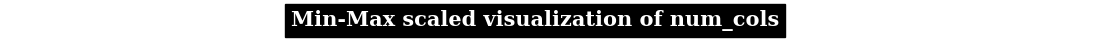

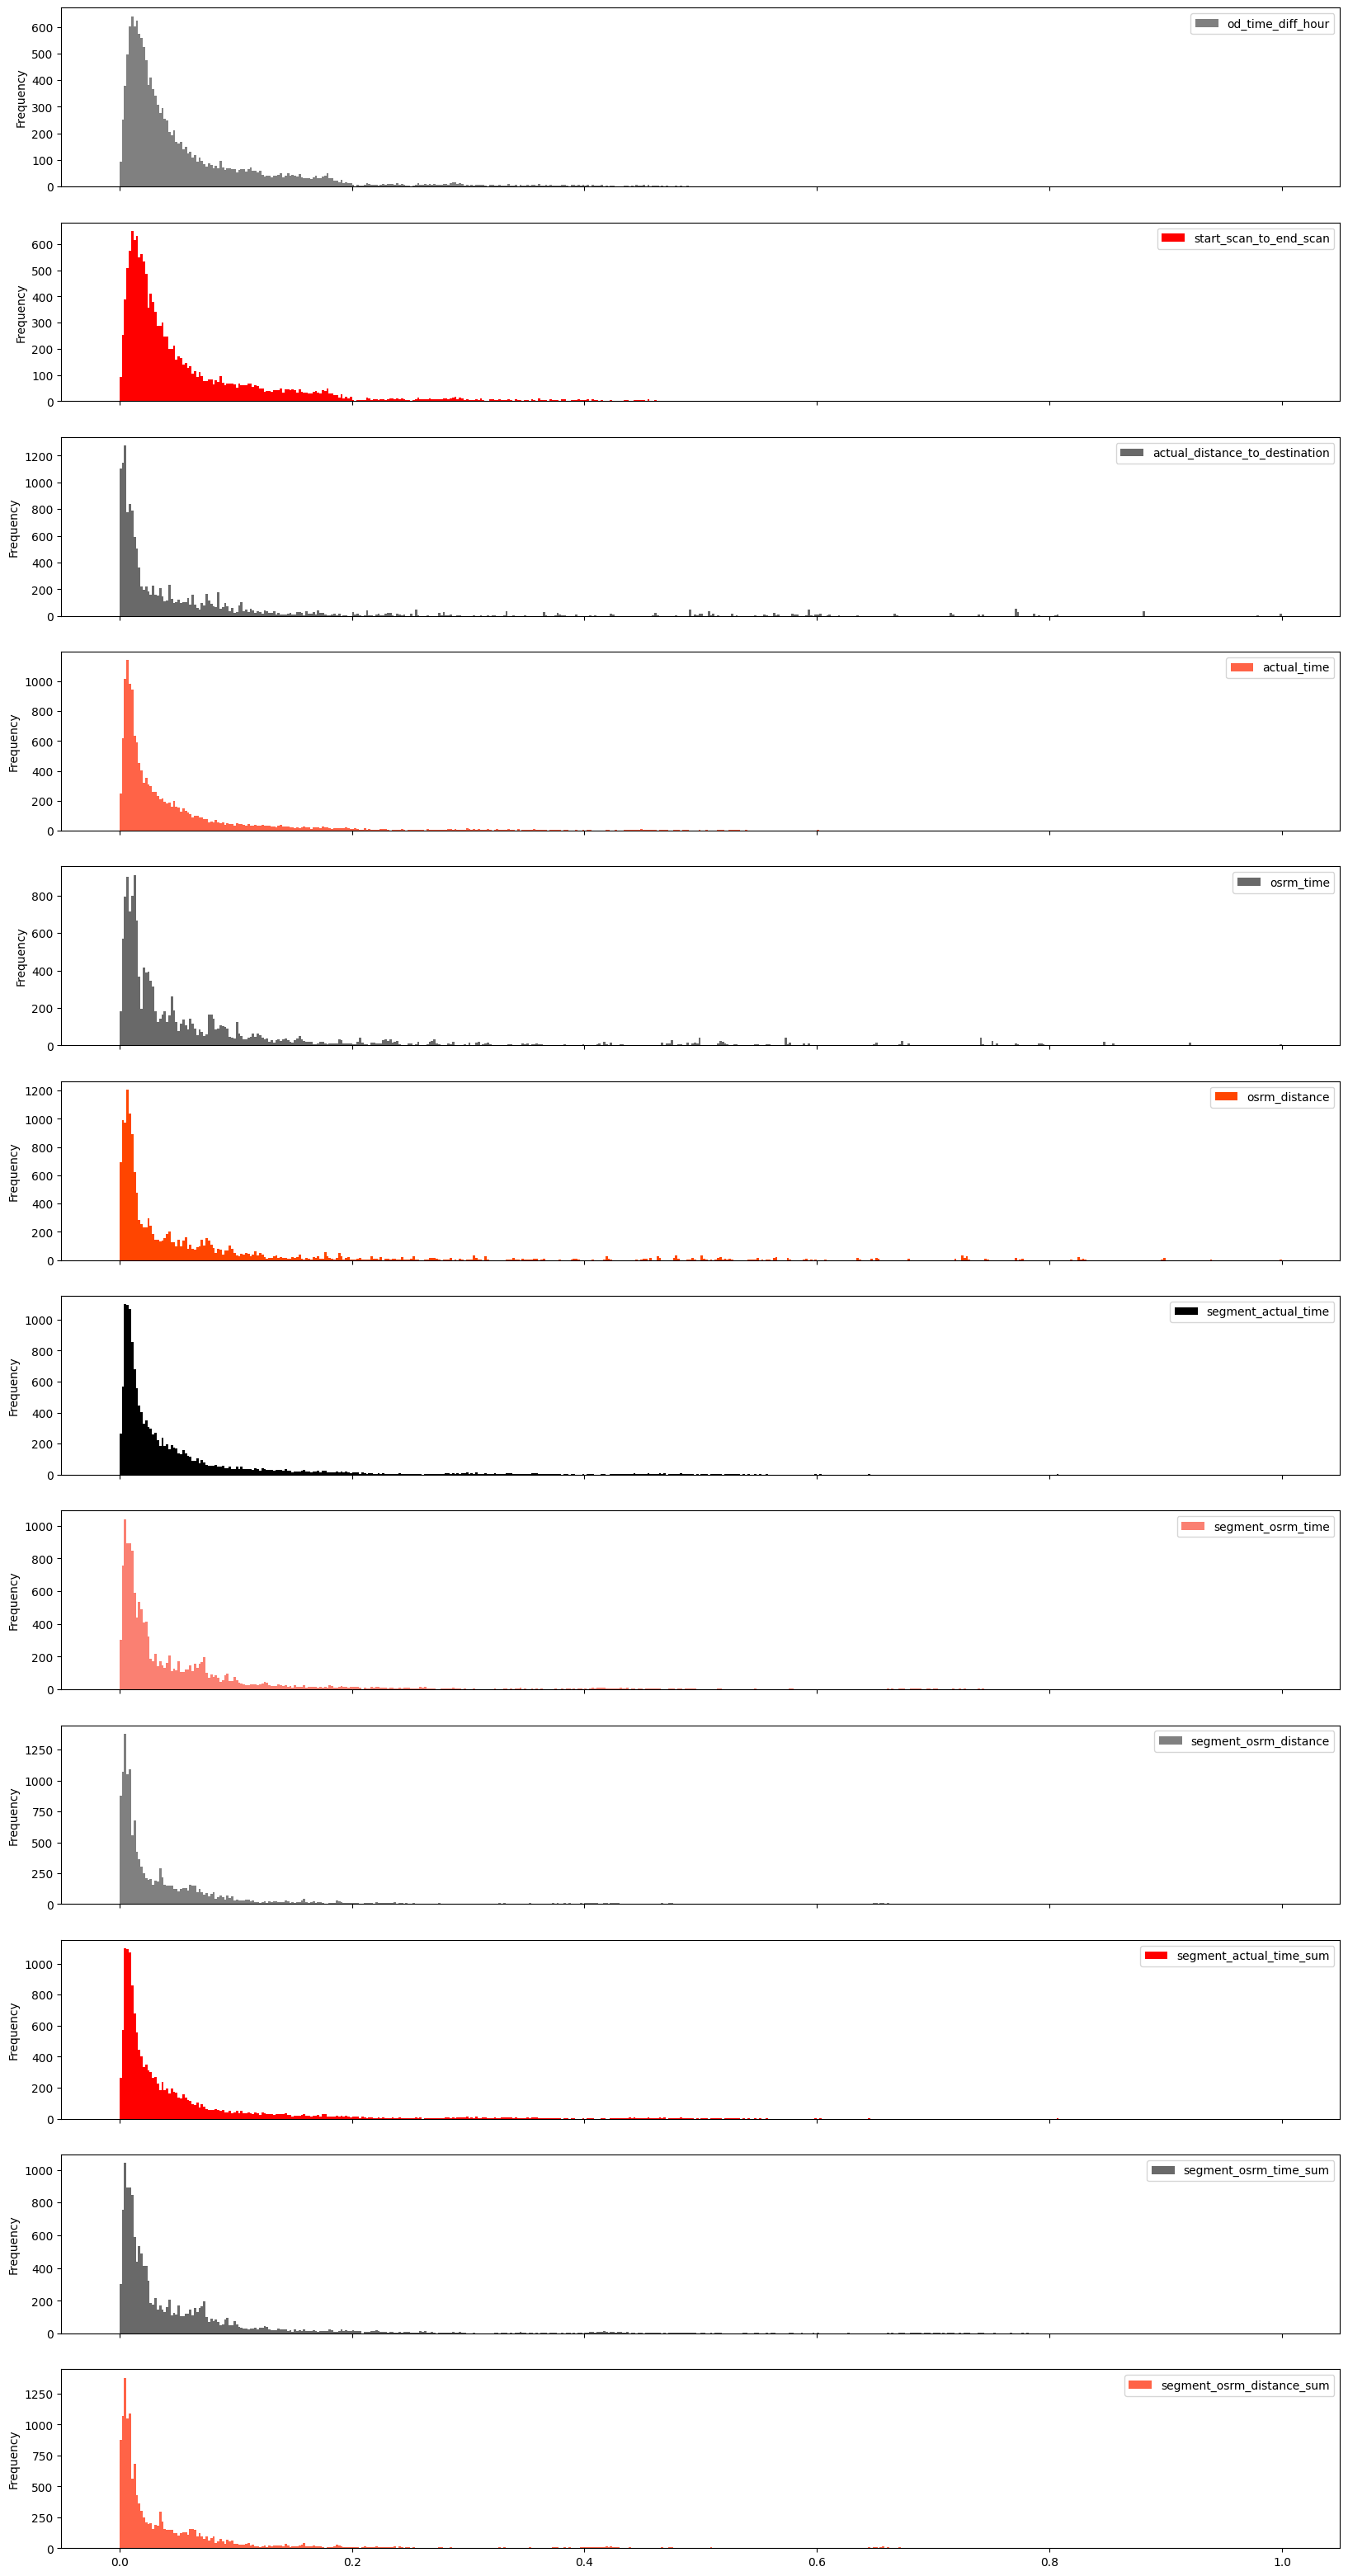

In [113]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Min-Max scaled visualization of num_cols',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
min_max_scaled_df.plot(kind='hist', figsize=(20,40),subplots=True,color=cp,bins=500)
plt.show()

In [114]:
# Just so to know ... cant do this as `data is not gaussian`
# Standardization works only with data which follows normal distribution
# Standardizing the numerical features using StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(trip_df[num_cols])

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns=num_cols)
std_scaled_df

od_time_diff_hour  start_scan_to_end_scan  \
0               2.625886                2.627598   
1              -0.529518               -0.530859   
2               5.167598                5.170772   
3              -0.652664               -0.652397   
4               0.285312                0.284962   
...                  ...                     ...   
14782          -0.413508               -0.413880   
14783          -0.713243               -0.713166   
14784          -0.164399               -0.164728   
14785          -0.276143               -0.277150   
14786          -0.267194               -0.268034   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                            2.162548     2.147277   2.048290       2.125107   
1                           -0.297563    -0.379887  -0.342571      -0.320538   
2                            5.772034     5.326268   5.816936       5.802622   
3                           -0.480911    -0.529486  -0.537818      -0.497115   
4                           -0.119943    -0.027259  -0.162059      -0.154082   
...                               ...          ...        ...            ...   
14782                       -0.348054    -0.486744  -0.364674      -0.351972   
14783                       -0.486350    -0.597162  -0.548870      -0.506808   
14784                       -0.410502    -0.132335  -0.416249      -0.391263   
14785                       -0.096128    -0.164392   0.066344      -0.088455   
14786                       -0.320822    -0.144802  -0.342571      -0.332769   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 2.147833           2.629714               2.633597   
1                -0.381163          -0.367090              -0.332307   
2                 5.311326           5.594737               5.571936   
3                -0.528553          -0.522809              -0.486596   
4                -0.023473          -0.208192              -0.182120   
...                    ...                ...                    ...   
14782            -0.487212          -0.376623              -0.378690   
14783            -0.596856          -0.538699              -0.495684   
14784            -0.129522          -0.293997              -0.282653   
14785            -0.170863           0.128670               0.001984   
14786            -0.142104          -0.360734              -0.340969   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                     2.147833               2.629714   
1                    -0.381163              -0.367090   
2                     5.311326               5.594737   
3                    -0.528553              -0.522809   
4                    -0.023473              -0.208192   
...                        ...                    ...   
14782                -0.487212              -0.376623   
14783                -0.596856              -0.538699   
14784                -0.129522              -0.293997   
14785                -0.170863               0.128670   
14786                -0.142104              -0.360734   

       segment_osrm_distance_sum  
0                       2.633597  
1                      -0.332307  
2                       5.571936  
3                      -0.486596  
4                      -0.182120  
...                          ...  
14782                  -0.378690  
14783                  -0.495684  
14784                  -0.282653  
14785                   0.001984  
14786                  -0.340969  

[14787 rows x 12 columns]

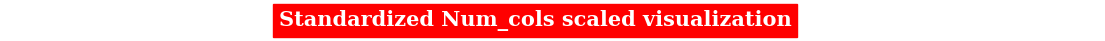

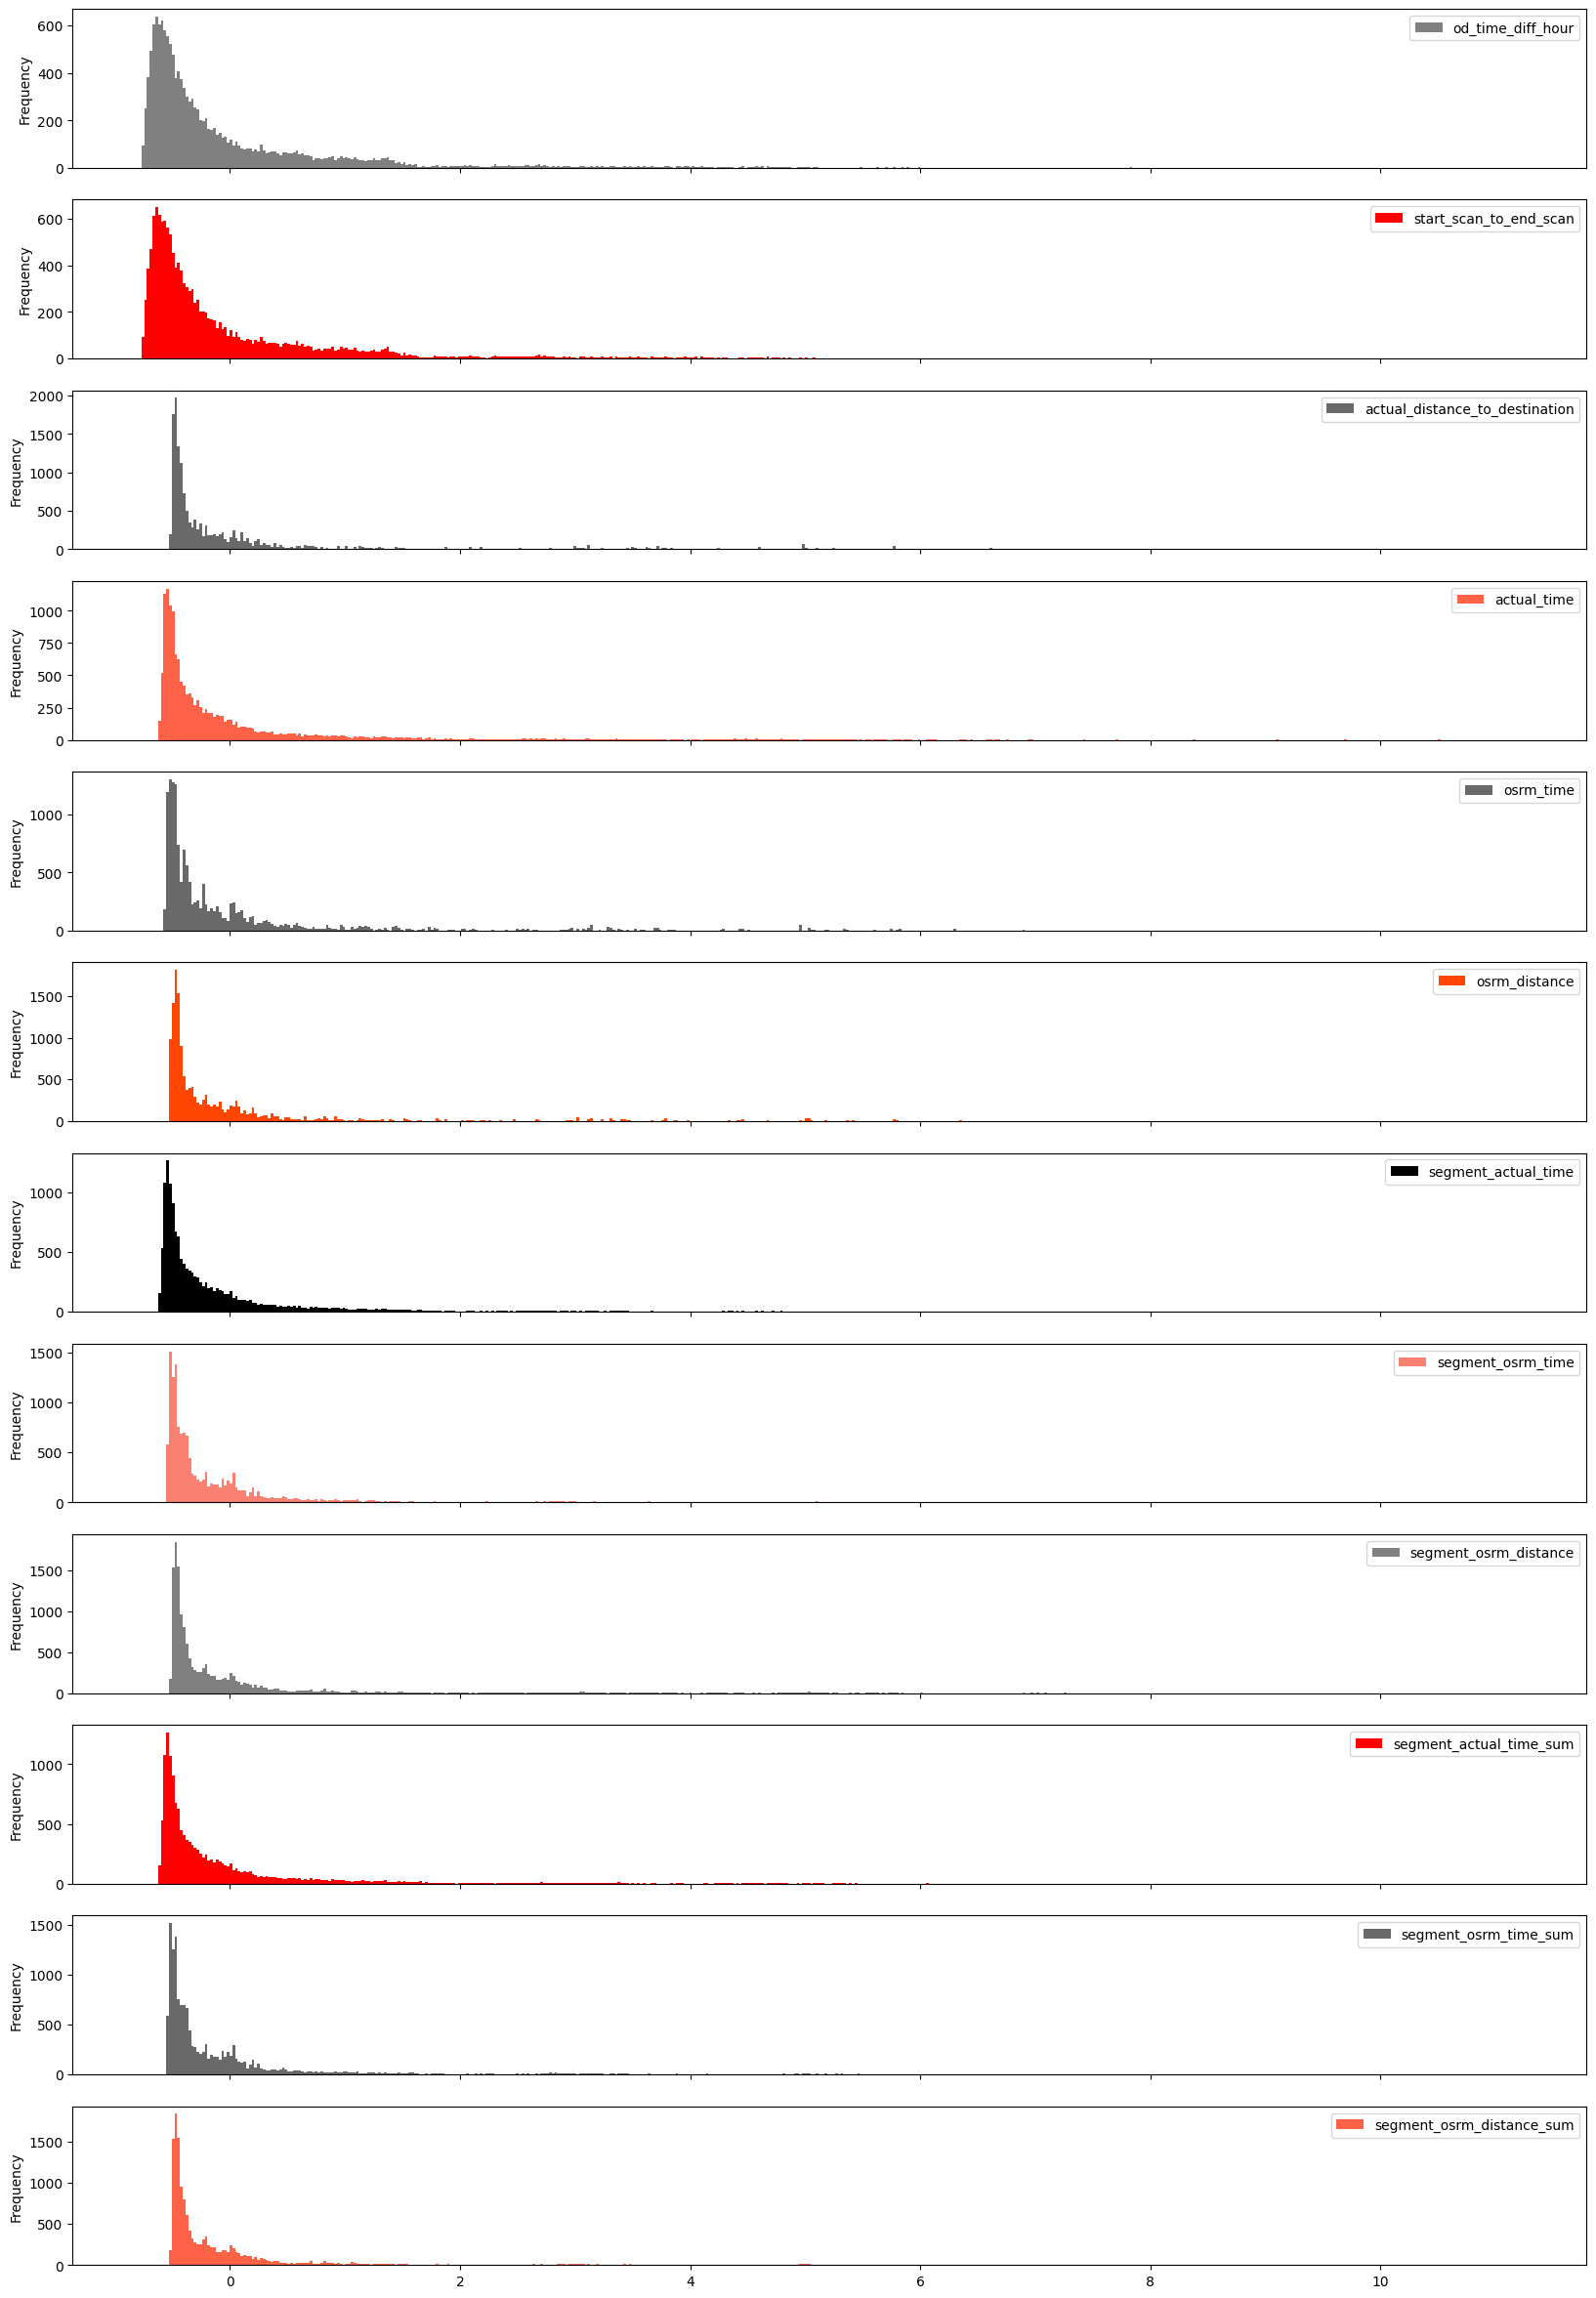

In [115]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Standardized Num_cols scaled visualization',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
std_scaled_df.plot(kind='hist', figsize=(20,30),subplots=True,color=cp,bins=500)
plt.show()

Hypothesis Testing:

Conduct hypothesis testing and visual analysis between the following pairs:

Actual Time aggregated value vs. OSRM Time aggregated value.
Actual Time aggregated value vs. Segment Actual Time aggregated value.
OSRM Distance aggregated value vs. Segment OSRM Distance aggregated value.
OSRM Time aggregated value vs. Segment OSRM Time aggregated value.
Note: Aggregated values are obtained by merging rows based on trip_uuid.

Assumptions for T-Test:

Sample size is less than 30.
Population variance is unknown.
Population mean and standard deviation are finite.
The means of the two populations being compared should follow normal distributions.
For Student's original t-test definition, the two populations should have the same variance. However, if sample sizes are equal, Student's t-test is robust to unequal variances.
🔖STEP-1: Set Up Null Hypothesis

Null Hypothesis (Ho): There is no significant difference in the mean values between column1 and column2.
Alternate Hypothesis (Ha): There is a significant difference in the mean values between column1 and column2.
🔖STEP-2: Check Basic Assumptions for the Hypothesis

Distribution Check: Use QQ Plot and Probability Plot.
Confirmation Tests: Apply Shapiro-Wilk Test and Anderson-Darling Test.
Homogeneity of Variances: Use Levene's Test.
Normality Checks: Assess normality of data distribution.
🔖STEP-3: Define Test Statistics and Distribution Under Ho

Independent Variables:

If data follows a normal distribution, use ttest_ind.
If not, use the Mann-Whitney U test (Non-Parametric test).
Dependent Variables (Paired T-Test):

If data follows a normal distribution, use ttest_rel.
If not, use the Wilcoxon Signed-Rank Test (Non-Parametric test).
🔖STEP-4: Decide on the Type of Test

Perform a two-tailed t-test.

🔖STEP-5: Compute the P-Value and Set Alpha Value

Compute the t-statistic using the ttest function from scipy.stats.
Set alpha at 0.05 (i.e., confidence level = 95%).
🔖STEP-6: Compare P-Value and Alpha

If p-value < alpha: Reject Ho.
If p-value > alpha: Accept Ho.

In [116]:
class Normality_check:
    def __init__(self, name, col):
        self.name = name
        self.col = col

    def shapiro_and_anderson(self):
        print(f"Performing SHAPIRO & ANDERSON-DARLING TEST for {self.name} column")
        print()

        # Shapiro-Wilk Test
        print('Shapiro-Wilk Test')
        shapiro_stat, p_val = shapiro(self.col)
        if p_val < 0.05:
            print(f'{self.name} - Data is not Gaussian')
        else:
            print(f'{self.name} - Data is Gaussian')
        print()

        # Using Anderson-Darling Test
        print("Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test")
        result = anderson(self.col)
        if result.statistic > result.critical_values[2]:
            print(f"{self.name} - Data does not follow a normal distribution.")
        else:
            print(f"{self.name} - Data follows a normal distribution.")
        print()
        print('-'*50)

    def boxcox_transformation(self):
        print(f'Performing BOXCOX transformation on {self.name} column')
        transformed_data, best_lambda = boxcox(self.col)
        self.col = transformed_data  # Update column data with transformed data
        self.shapiro_and_anderson()  # Calling shapiro_and_anderson method after transformation


# normality_check = NormalCheck(name, col)
# normality_check.boxcox_transformation()

In [117]:
def levene_test(name1,name2,col1,col2):

    levene_stat, p_value = levene(col1,col2)

    print(f'Performing Levene Test for {name1} & {name2}')

    if p_value < 0.05:
        print('Does not have Homogenous (different) Variance')
    else:
        print('Have Homogenous (similar) variance')
    print()
    print('-'*50)
    print()
    return ""

In [118]:
## MannWhitney u Rank test
### Test statistics : Mann-Whitney U rank test for two independent samples

def mannwhitneyu_test(name1,name2,col1,col2):

    print(f'Performing Non-parametric Test - MannWhitneyU for {name1} & {name2}')
    test_stat, p_value = mannwhitneyu(col1,col2)

    if p_value < 0.05:
        print("Reject Null Hypothesis")
        print(f'There is a significant difference in the Mean values of {name1} and {name2}')
    else:
        print("Failed to Reject Null Hypothesis - Accept Ho")
        print(f'There is NO significant difference in the Mean values of {name1} and {name2}')

    print()
    print('-'*50)
    print()

    return ""

In [119]:
def normality_plots(name1,name2,name3,name4,col1,col2,col3,col4):

    plt.figure(figsize = (20,10))
    plt.suptitle("Normality check - Histplot & QQ(prob)plot",fontsize=16,fontweight="bold",backgroundcolor=cp[5],color='w')

    plt.subplot(241)
    sns.histplot(col1, element = 'step', color =cp[1], kde = True, label = name1)
    plt.title(f'Histplot - {name1}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')
    plt.legend()

    plt.subplot(242)
    sns.histplot(col3,element = 'step', color = cp[2], kde = True, label = name3 )
    plt.title(f'Histplot - {name3}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')
    plt.legend()

    plt.subplot(243)
    probplot(col1, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name1}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')

    plt.subplot(244)
    probplot(col3, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name3}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')

    plt.subplot(245)
    sns.histplot(col2, element = 'step', color =cp[1], kde = True, label = name2 )
    plt.title(f'Histplot - {name2}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')
    plt.legend()

    plt.subplot(246)
    sns.histplot(col4,element = 'step', color = cp[2], kde = True, label = name4)
    plt.title(f'Histplot - {name4}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')
    plt.legend()

    plt.subplot(247)
    probplot(col2, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name2}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')

    plt.subplot(248)
    probplot(col4, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name4}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')

    sns.despine()
    plt.show()

Hypothesis Testing between Actual Time and OSRM Time Aggregated Values:

In [120]:
clipped_num_df.sample(3)

od_time_diff_hour  start_scan_to_end_scan  \
915            0.982634                    58.0   
4904           4.512964                   270.0   
9118           1.365435                    81.0   

      actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
915                         9.694263         26.0       12.0        14.8944   
4904                       48.615317        115.0       61.0        65.6073   
9118                       32.772513         50.0       26.0        35.7081   

      segment_actual_time  segment_osrm_time  segment_osrm_distance  \
915                  26.0               12.0                14.8944   
4904                112.0               68.0                73.5502   
9118                 48.0               32.0                45.8339   

      segment_actual_time_sum  segment_osrm_time_sum  \
915                      26.0                   12.0   
4904                    112.0                   68.0   
9118                     48.0                   32.0   

      segment_osrm_distance_sum  
915                     14.8944  
4904                    73.5502  
9118                    45.8339

In [121]:
clipped_num_df[['actual_time','osrm_time']].describe().T

count        mean         std  min   25%    50%    75%  \
actual_time  14787.0  224.212575  185.922836  9.0  67.0  148.0  367.0   
osrm_time    14787.0  128.190911  150.301265  6.0  29.0   60.0  168.0   

                    max  
actual_time  543.285287  
osrm_time    543.285287

In [122]:
filtered_num_df[['actual_time','osrm_time']].describe().T

count        mean         std  min   25%    50%    75%     max
actual_time  14787.0  356.306012  561.517936  9.0  67.0  148.0  367.0  6265.0
osrm_time    14787.0  160.990938  271.459495  6.0  29.0   60.0  168.0  2032.0

In [123]:
actual_time = clipped_num_df['actual_time']
osrm_time = clipped_num_df['osrm_time']
fil_actual_time = filtered_num_df['actual_time']
fil_osrm_time = filtered_num_df['osrm_time']


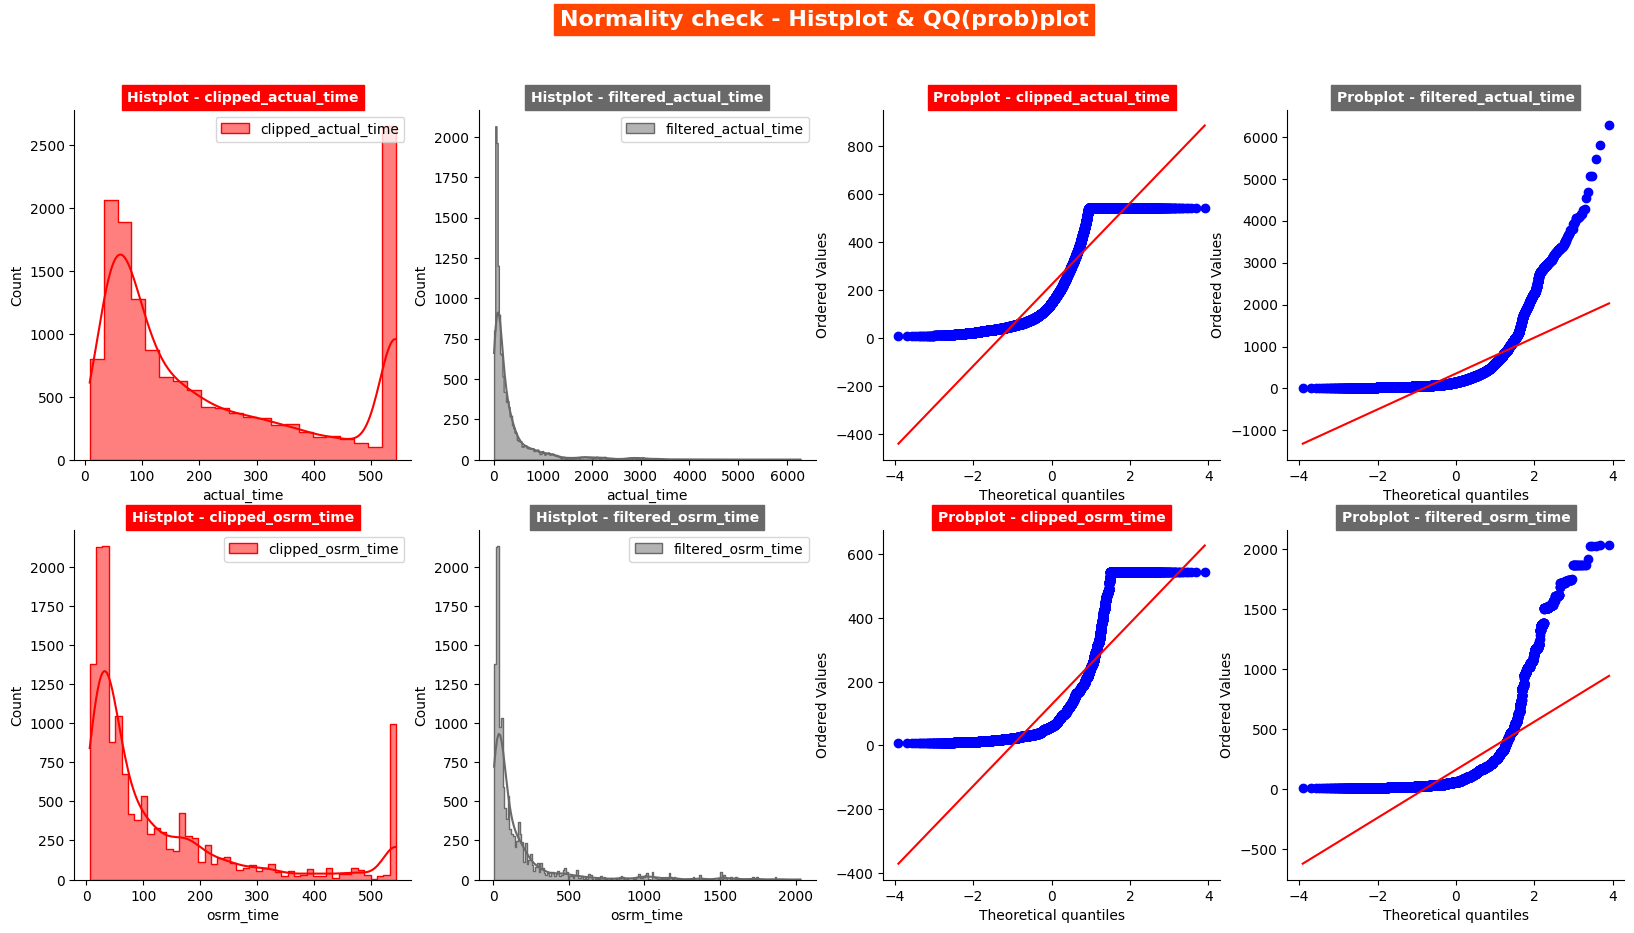

In [124]:
normality_plots('clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time',actual_time,osrm_time,fil_actual_time,fil_osrm_time)

In [125]:
col_names= ['clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time']
cols = [actual_time,osrm_time,fil_actual_time,fil_osrm_time]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_actual_time column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_time column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution.

----------------

**Wilcoxon signed rank test:**

In [126]:
## with clipped data

# H0 : aggregated actual time is same as aggregated osrm time
# Ha : aggregated actual time is more than the aggregated osrm time

alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(actual_time,osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")

Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


In [127]:
## with filtered data

alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(fil_actual_time,fil_osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")

Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


In [128]:
### MannWhitney u Rank test

test_cols = [('clipped_actual_time','clipped_osrm_time',actual_time,osrm_time),
       ('filtered_actual_time','filtered_osrm_time',fil_actual_time,fil_osrm_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_actual_time & clipped_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_actual_time and clipped_osrm_time

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_actual_time & filtered_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_actual_time and filtered_osrm_time

--------------------------------------------------



# **Insights**
It is confirmed that There is a significant difference in the Mean values of Aggregated actual_time and Aggregated osrm_time through MannwhitneyU test.

Further, it is found that The Aggregated Actual_time is More than the Aggregated OSRM_time through Wilcoxon signed Rank test.

In [129]:
clipped_num_df.sample()

od_time_diff_hour  start_scan_to_end_scan  \
12941           5.433459                   325.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
12941                      114.080158        281.0      154.0       197.8849   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
12941                281.0              196.0               243.6855   

       segment_actual_time_sum  segment_osrm_time_sum  \
12941                    281.0                  196.0   

       segment_osrm_distance_sum  
12941                   243.6855

In [130]:
clipped_num_df[['actual_time','segment_actual_time']].describe().T

count        mean         std  min   25%    50%    75%  \
actual_time          14787.0  224.212575  185.922836  9.0  67.0  148.0  367.0   
segment_actual_time  14787.0  222.904641  185.796999  9.0  66.0  147.0  364.0   

                            max  
actual_time          543.285287  
segment_actual_time  543.285287

In [131]:
clipped_actual_time = clipped_num_df['actual_time']
clipped_segmented_actual_time = clipped_num_df['segment_actual_time']
filtered_actual_time = filtered_num_df['actual_time']
filtered_segmented_actual_time = filtered_num_df['segment_actual_time']

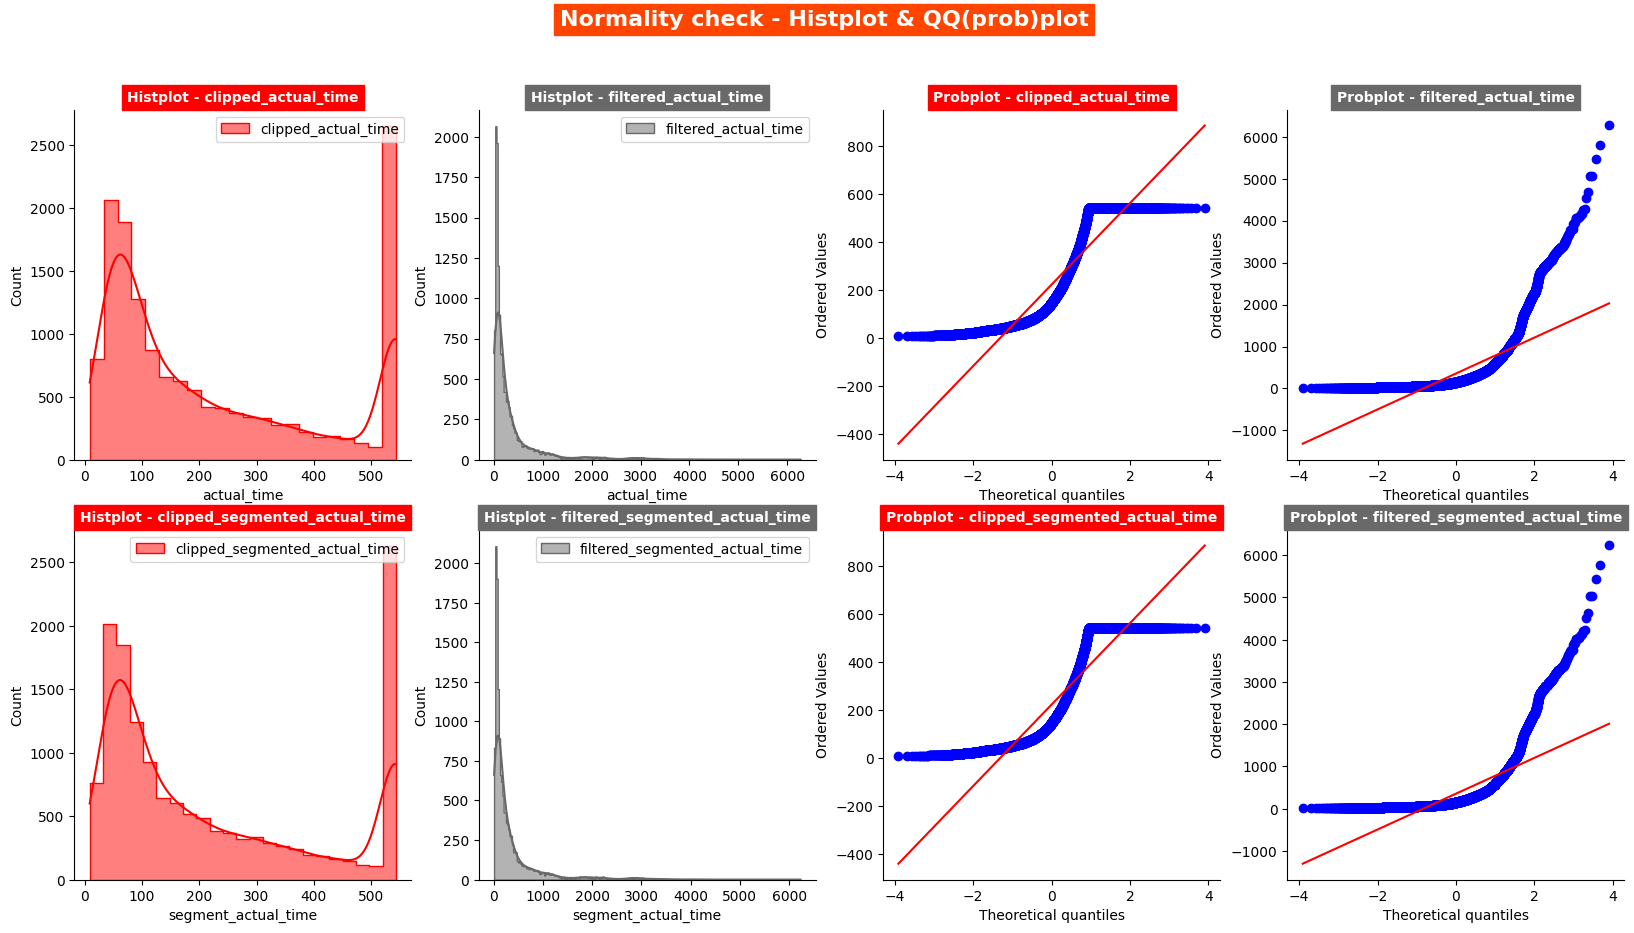

In [132]:
normality_plots("clipped_actual_time","clipped_segmented_actual_time","filtered_actual_time","filtered_segmented_actual_time",
                clipped_actual_time,clipped_segmented_actual_time,filtered_actual_time,filtered_segmented_actual_time)

In [133]:
col_names= ["clipped_actual_time","clipped_segmented_actual_time","filtered_actual_time","filtered_segmented_actual_time"]
cols = [clipped_actual_time,clipped_segmented_actual_time,filtered_actual_time,filtered_segmented_actual_time]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_actual_time column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_segmented_actual_time column

Shapiro-Wilk Test
clipped_segmented_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_segmented_actual_time - Data does not follow a no

In [134]:
levene_test("clipped_actual_time","clipped_segmented_actual_time",clipped_actual_time,clipped_segmented_actual_time),
levene_test("filtered_actual_time","filtered_segmented_actual_time",filtered_actual_time,filtered_segmented_actual_time)

Performing Levene Test for clipped_actual_time & clipped_segmented_actual_time
Have Homogenous (similar) variance

--------------------------------------------------

Performing Levene Test for filtered_actual_time & filtered_segmented_actual_time
Have Homogenous (similar) variance

--------------------------------------------------



''

In [135]:
### MannWhitney u Rank test

test_cols = [("clipped_actual_time","clipped_segmented_actual_time",clipped_actual_time,clipped_segmented_actual_time),
       ("filtered_actual_time","filtered_segmented_actual_time",filtered_actual_time,filtered_segmented_actual_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_actual_time & clipped_segmented_actual_time
Failed to Reject Null Hypothesis - Accept Ho
There is NO significant difference in the Mean values of clipped_actual_time and clipped_segmented_actual_time

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_actual_time & filtered_segmented_actual_time
Failed to Reject Null Hypothesis - Accept Ho
There is NO significant difference in the Mean values of filtered_actual_time and filtered_segmented_actual_time

--------------------------------------------------



## **Insights**

Although the data is not normally distributed, it exhibits similar variance, as confirmed by Levene's test.

The Mann-Whitney U test confirms that there is no significant difference in the mean values between the aggregated actual time and the segmented actual time.

**OSRM distance aggregated value and segment OSRM distance aggregated value.**

In [136]:
clipped_num_df[['osrm_distance','segment_osrm_distance']].describe().T

count        mean         std     min       25%  \
osrm_distance          14787.0  144.551530  162.880432  9.0729  30.75690   
segment_osrm_distance  14787.0  150.959152  165.473077  9.0729  32.57885   

                           50%       75%         max  
osrm_distance          65.3028  206.6442  543.285287  
segment_osrm_distance  69.7842  216.5606  543.285287

In [137]:
filtered_num_df[['osrm_distance','segment_osrm_distance']].describe().T

count        mean         std     min       25%  \
osrm_distance          14787.0  203.887411  370.565564  9.0729  30.75690   
segment_osrm_distance  14787.0  222.705466  416.846279  9.0729  32.57885   

                           50%       75%        max  
osrm_distance          65.3028  206.6442  2840.0810  
segment_osrm_distance  69.7842  216.5606  3523.6324

In [138]:
clipped_osrm_distance = clipped_num_df['osrm_distance']
clipped_segmented_osrm_distance = clipped_num_df['segment_osrm_distance']
filtered_osrm_distance = filtered_num_df['osrm_distance']
filtered_segmented_osrm_distance = filtered_num_df['segment_osrm_distance']

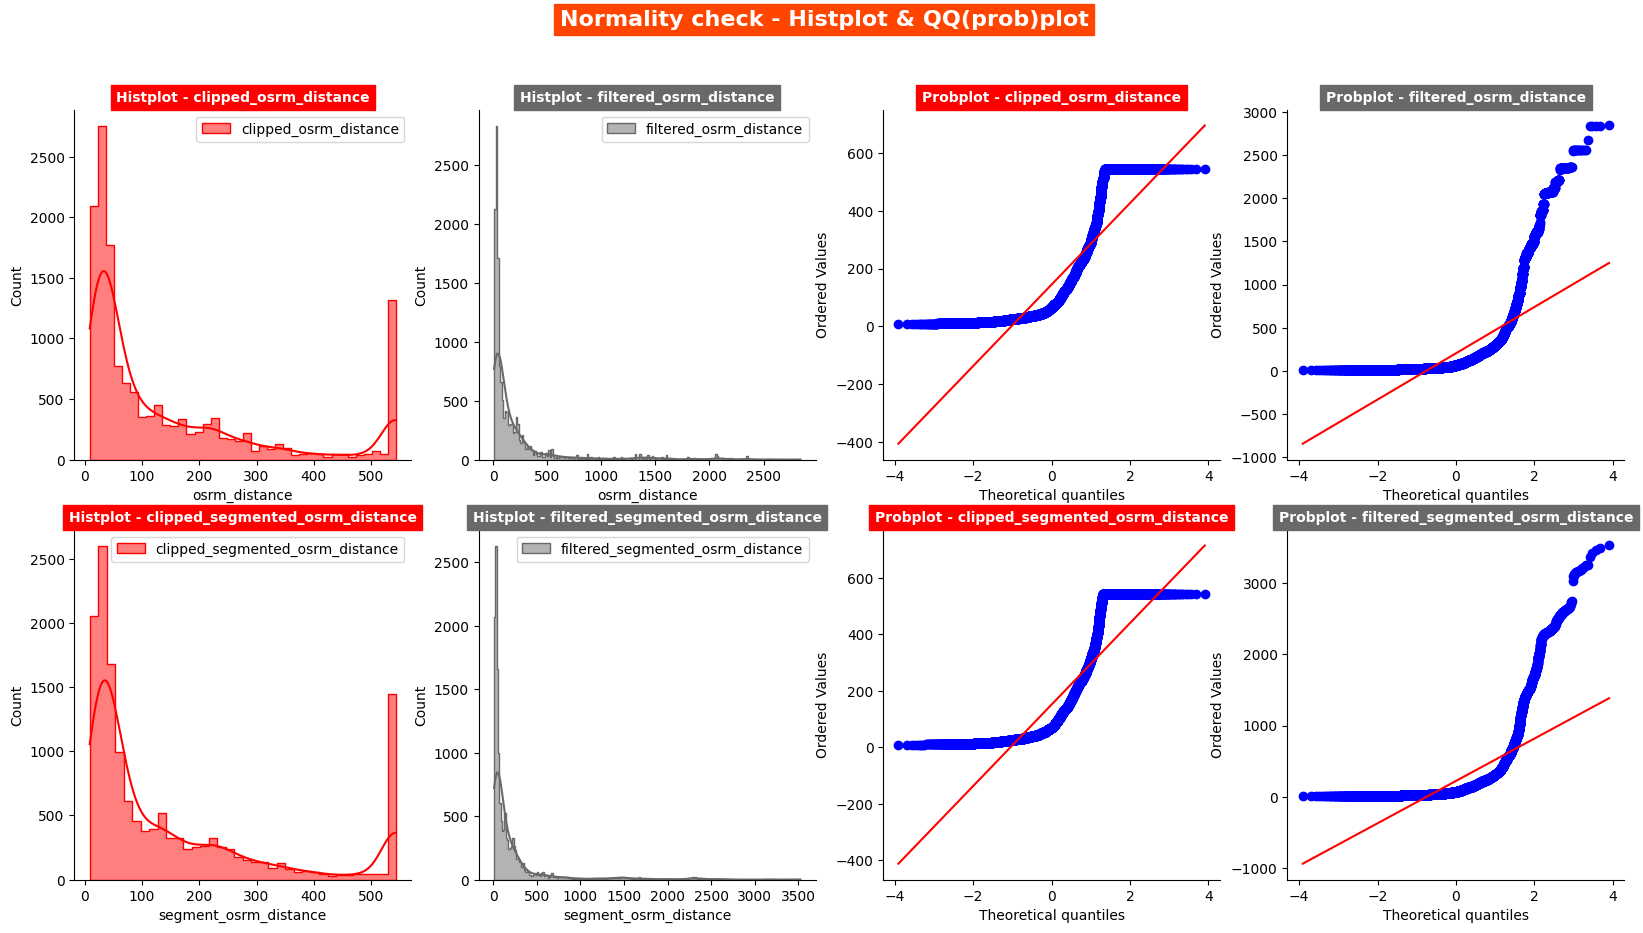

In [139]:
normality_plots("clipped_osrm_distance","clipped_segmented_osrm_distance","filtered_osrm_distance","filtered_segmented_osrm_distance",
                clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance)

In [140]:
col_names= ["clipped_osrm_distance","clipped_segmented_osrm_distance","filtered_osrm_distance","filtered_segmented_osrm_distance"]
cols = [clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_distance column

Shapiro-Wilk Test
clipped_osrm_distance - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_distance - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_osrm_distance column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_distance column

Shapiro-Wilk Test
clipped_osrm_distance - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_distance - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_segmented_osrm_distance column

Shapiro-Wilk Test
clipped_segmented_osrm_distance - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_segmented_osrm_distance - Data 

In [141]:
levene_test("clipped_osrm_distance","clipped_segmented_osrm_distance",clipped_osrm_distance,clipped_segmented_osrm_distance),
levene_test("filtered_osrm_distance","filtered_segmented_osrm_distance",filtered_osrm_distance,filtered_segmented_osrm_distance)

Performing Levene Test for clipped_osrm_distance & clipped_segmented_osrm_distance
Does not have Homogenous (different) Variance

--------------------------------------------------

Performing Levene Test for filtered_osrm_distance & filtered_segmented_osrm_distance
Does not have Homogenous (different) Variance

--------------------------------------------------



''

In [142]:
### MannWhitney u Rank test

test_cols = [("clipped_osrm_distance","clipped_segmented_osrm_distance",clipped_osrm_distance,clipped_segmented_osrm_distance),
       ("filtered_osrm_distance","filtered_segmented_osrm_distance",filtered_osrm_distance,filtered_segmented_osrm_distance)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_osrm_distance & clipped_segmented_osrm_distance
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_osrm_distance and clipped_segmented_osrm_distance

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_osrm_distance & filtered_segmented_osrm_distance
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_osrm_distance and filtered_segmented_osrm_distance

--------------------------------------------------



# **Insights:**

The Mann-Whitney U test confirms that there is a significant difference in the mean values between the OSRM distance and the segmented OSRM distance aggregated values.

**OSRM time aggregated value and segment OSRM time aggregated value.**

In [143]:
clipped_num_df[['osrm_time','segment_osrm_time']].describe().T

count        mean         std  min   25%   50%    75%  \
osrm_time          14787.0  128.190911  150.301265  6.0  29.0  60.0  168.0   
segment_osrm_time  14787.0  136.843817  155.422252  6.0  30.0  65.0  184.0   

                          max  
osrm_time          543.285287  
segment_osrm_time  543.285287

In [144]:
clipped_osrm_time = clipped_num_df['osrm_time']
clipped_segmented_osrm_time = clipped_num_df['segment_osrm_time']
filtered_osrm_time = filtered_num_df['osrm_time']
filtered_segmented_osrm_time = filtered_num_df['segment_osrm_time']

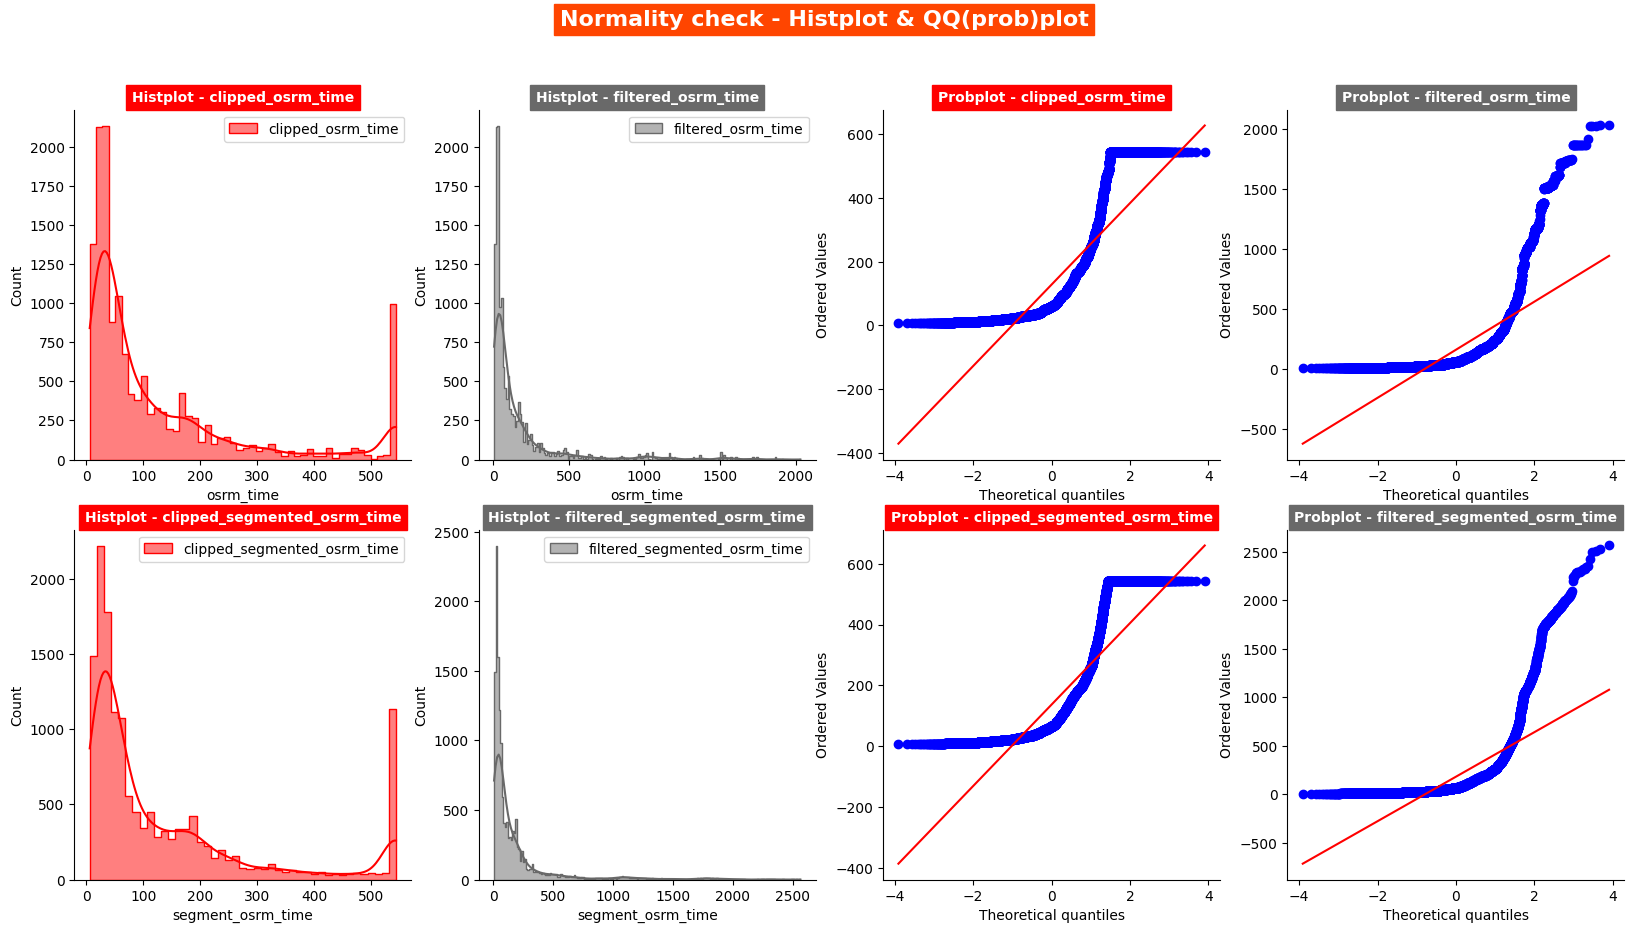

In [145]:
normality_plots("clipped_osrm_time","clipped_segmented_osrm_time","filtered_osrm_time","filtered_segmented_osrm_time",
                clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time)

In [146]:
col_names= ["clipped_osrm_time","clipped_segmented_osrm_time","filtered_osrm_time","filtered_segmented_osrm_time"]
cols = [clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_time column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_osrm_time column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_time column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_segmented_osrm_time column

Shapiro-Wilk Test
clipped_segmented_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_segmented_osrm_time - Data does not follow a normal distribution.



In [149]:
levene_test("clipped_osrm_time","clipped_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time),
levene_test("filtered_osrm_time","filtered_segmented_osrm_time",filtered_osrm_time,filtered_segmented_osrm_time)

Performing Levene Test for clipped_osrm_time & clipped_segmented_osrm_time
Does not have Homogenous (different) Variance

--------------------------------------------------

Performing Levene Test for filtered_osrm_time & filtered_segmented_osrm_time
Does not have Homogenous (different) Variance

--------------------------------------------------



''

In [150]:
### MannWhitney u Rank test

test_cols = [("clipped_osrm_time","clipped_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time),
       ("filtered_osrm_time","filtered_segmented_osrm_time",filtered_osrm_time,filtered_segmented_osrm_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_osrm_time & clipped_segmented_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_osrm_time and clipped_segmented_osrm_time

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_osrm_time & filtered_segmented_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_osrm_time and filtered_segmented_osrm_time

--------------------------------------------------



# **Insights:**

The Mann-Whitney U test confirms that there is a significant difference in the mean values between the aggregated OSRM time and the segmented OSRM time.

In [152]:
# To find the busiest corridor, we'll look at the most common combinations of source and destination states
corridor_counts = trip_df.groupby(['source_state', 'destination_state']).size().reset_index(name='count')
busiest_corridor = corridor_counts.sort_values(by='count', ascending=False).head(1)

# Average distance and time taken for the busiest corridor
busiest_corridor_details = busiest_corridor.merge(trip_df, on=['source_state', 'destination_state'])
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_time_diff_hour'].mean()

print("Busiest corridor:  ")
display(busiest_corridor)
print("Average distance:  ",average_distance)
print("Average time (in hours):  ",average_time)

Busiest corridor:  


source_state destination_state  count
85  Maharashtra       Maharashtra   2458

Average distance:   74.85284867694604
Average time (in hours):   5.346577921457034


# **Business Insights**
**Data Overview:**

The data spans from '2018-09-12' to '2018-10-08' (26 days).
88% of trips occurred in October, with the remainder in November.
The data is heavily right-skewed.
Most features are strongly positively correlated with each other, which aligns with expectations.
Trips are less frequent at the start and end of the month compared to the middle, though the variance is minor.
Notably, there are no trips recorded from the 4th to the 11th day of the month.
A majority of orders occur in the middle of the month, indicating higher customer activity during this period.

**Route Type:**

Analysis shows a higher proportion of shipments use Full Truck Load (FTL) rather than carting, which impacts delivery efficiency and speed.
Geographical Focus:

**States:** Haryana, Maharashtra, and Karnataka are prominent source states, reflecting high demand or significant business activities in these regions.
Source Cities: Gurgaon, Bangalore, and Bhiwandi are the busiest source cities, highlighting their importance in business operations.
Destination Cities: Gurgaon, Bangalore, and Hyderabad are the busiest destination cities, indicating their role in business activities or population movement.

**Busiest Corridor:** The Mumbai-Maharashtra and Bangalore-Karnataka corridor has the highest number of trips.

**Average Metrics:**

Average Distance: 74.85 km
Average Time: 5.35 hours
Delivery Time & Distance Accuracy:

**OSRM Time vs. Actual Time:** The mean estimated delivery time is lower than the actual delivery time, suggesting that OSRM's time estimates are often optimistic.
**OSRM Distance vs. Actual Distance: **The mean OSRM distance is greater than the actual distance, indicating that OSRM might overestimate distances, which could affect route planning and fuel efficiency.

**Segment-wise Analysis:**

**Time Analysis:** The mean values of actual time and segment actual time are consistent, showing reliable time measurements across different segments.
Distance Analysis: The mean segment OSRM distance is greater than the mean OSRM distance, suggesting that OSRM may provide more conservative distance estimates for individual segments.

**Next Steps:**

Investigate the absence of trips from the 4th to the 11th of the month to understand and address the cause.
Promote and enhance the use of the FTL route handling system to increase its usage percentage

# **Business Recommendations**

**Route Optimization:**

Given that Karnataka is a key state route, optimizing the transportation network within Karnataka could enhance efficiency and alleviate congestion. Implement route optimization algorithms and real-time traffic monitoring to improve the system.

Focus on strategies specific to Gurgaon and Bangalore, the busiest source and destination cities, to manage high traffic volumes effectively.

**Operational Efficiency:**

With the OSRM time estimates being lower than actual delivery times, adjust customer expectations to reflect more realistic delivery times.

Since OSRM distance estimates are higher than actual distances, revise distance estimations to improve logistics planning.

Utilize the discrepancy between segment OSRM distances and actual distances to refine route planning and optimize logistics for individual segments.

Adopt advanced demand forecasting techniques to predict peak travel times and adjust services accordingly, enhancing resource allocation and minimizing peak-hour congestion.

**Customer Satisfaction:**

Enhancing the accuracy of delivery time and distance estimates will likely improve customer satisfaction.

Prioritize FTL shipments for faster delivery times, which can boost customer satisfaction by meeting or exceeding expectations for timely deliveries.
Profile customers from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh to understand why these states contribute significantly to orders and improve their buying and delivery experiences.

**Cost Optimization:**

Analyzing differences between estimated and actual times and distances can inform cost optimization strategies.
Adjust logistics planning based on accurate measurements to better allocate resources and potentially reduce operational costs.

**Strategic Decision-Making:**

The preference for FTL over carting is a strategic choice that impacts logistics management. Understand the reasons behind this preference and evaluate its effects to guide future decisions and adapt to business needs.

**Collaboration with Stakeholders:**

Partner with government authorities, transportation companies, and local communities to develop and implement strategies for optimizing transportation in busy corridors and cities.